## Default of Credit Card Clients
## Decision tree type analysis

In [1]:
from joblib import Memory #cache purpose
pwd = "./default/"
cache_dir = pwd + 'cache_dir'
mem = Memory(cache_dir)
output_path = './output/split_55'


import pandas as pd
import numpy as np
import os
try:
    _=os.listdir(output_path)
except:
    os.mkdir(output_path)
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
df_original = pd.read_excel("./input/default of credit card clients.xls",header=1) #rename mal-nomers
df_original =df_original.rename({
                                'PAY_0' : 'PAY_1',
                                'default payment next month':'default'},axis=1)
BILL = [column for column in df_original.columns if 'BILL' in column]
PAY = [column for column in df_original.columns if 'PAY_AMT' in column]                            
rename_dict = {}
for column in BILL+PAY:
    rename_dict[column]=column[:-1]+'_'+column[-1]
df_original = df_original.rename(rename_dict, axis=1)
BILL = [column for column in df_original.columns if 'BILL' in column] #columns with BILL_AMT_n
PAY = [column for column in df_original.columns if 'PAY_AMT' in column]                            
df = df_original.copy()
N_labels = [column for column in df_original.columns if column !='default']
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index , test_index in split.split(df,df.iloc[:,[2,-1]]):
    df_train, label_train= df[N_labels].loc[train_index],df.default[train_index]
    df_test, label_test= df[N_labels].loc[test_index], df.default[test_index]
    
def to_csv(arr,train_or_test='train',name=None):   #to_csv
    df = pd.DataFrame(arr)
    if type(name)==str:
        df.to_csv(f'{output_path}/{name}_{train_or_test}.csv', index = False )
    else:
        df.to_csv(f'{output_path}/{train_or_test}.csv', index = False )

In [2]:
# for train_index , test_index in split.split(df_train,pd.concat([df_train.SEX,label_train],axis=1)):
#     X_train, y_train= df_train.iloc[train_index],label_train.iloc[train_index]
#     X_val, y_val = df_train.iloc[test_index], label_train.iloc[test_index]
#X_train ,y_train= df_train.iloc[:150,:] ,label_train.iloc[:150]
X_train ,y_train= df_train,label_train
#X,y= df_train.iloc[:300,:] ,label_train.iloc[:300]

In [3]:
from pyts.transformation import BagOfPatterns as BOP
from mods_defaults import ElementaryExtractor,BasicTransformer,MyMulPyts, NonTsPass #for pickle (cache)purpose
my_basic = BasicTransformer()
t_df = my_basic.fit_transform(X_train)
print(t_df.columns)
D_PAY = ['PAY_'+str(i) for i in range(1,7)]
L_PAY = [column for column in t_df.columns if 'log_PAY' in column]
L_BILL = [column for column in t_df.columns if 'log_BILL' in column]
L_USAGE =  [column for column in t_df.columns if 'log_USAGE' in column]
L_DIFF =  [column for column in t_df.columns if 'log_DIFF' in column]
print(len(L_PAY))

Index(['log_LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'log_BILL_AMT_1',
       'log_BILL_AMT_2', 'log_BILL_AMT_3', 'log_BILL_AMT_4', 'log_BILL_AMT_5',
       'log_BILL_AMT_6', 'log_PAY_AMT_1', 'log_PAY_AMT_2', 'log_PAY_AMT_3',
       'log_PAY_AMT_4', 'log_PAY_AMT_5', 'log_PAY_AMT_6', 'log_USAGE_1',
       'log_USAGE_2', 'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5',
       'log_DIFF_1', 'log_DIFF_2', 'log_DIFF_3', 'log_DIFF_4', 'log_DIFF_5'],
      dtype='object')
6


In [4]:
my_basic = BasicTransformer(scale="")
t_df = my_basic.fit_transform(X_train)
D_PAY = ['PAY_'+str(i) for i in range(1,7)]
USAGE =  [column for column in t_df.columns if 'USAGE' in column]
DIFF =  [column for column in t_df.columns if 'DIFF' in column]
len(USAGE+DIFF)

10

In [5]:
from sklearn.pipeline import Pipeline
# SVCs
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# pipeline
from sklearn.pipeline import make_union
# evaluation modules
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
def my_score(y_train,y_pred):
    accuracy = accuracy_score(y_train,y_pred)
    print(f'accuracy : {accuracy}')
    pre_score = precision_score(y_train,y_pred)
    print(f'precision : {pre_score}')
    rec_score = recall_score(y_train,y_pred)
    print(f'recall : {rec_score}')
    f_score = f1_score(y_train,y_pred)
    print(f'f1_score: {f_score}')

    return [round(accuracy,4), round(pre_score,4), round(rec_score ,4), round(f_score,4)]



In [6]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=55)
for train_index , test_index in split.split(df_train,pd.concat([df_train.SEX,label_train],axis=1)):
    X_train, y_train= df_train.iloc[train_index],label_train.iloc[train_index]
    X_val, y_val = df_train.iloc[test_index], label_train.iloc[test_index]

In [7]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=None):
    if ax is None:
        plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
        plt.plot(thresholds, recalls[:-1], 'g-',label="recall")
        plt.xlabel("thresholds")
        plt.legend(loc="upper left")
        plt.ylim([0,1])
    else:
        ax.plot(thresholds, precisions[:-1], 'b--', label="Precision")
        ax.plot(thresholds, recalls[:-1], 'g-',label="recall")
        ax.set_xlabel("thresholds")
        ax.legend(loc="upper left")
        ax.set_ylim([0,1])


In [8]:
length_5_bop =MyMulPyts(estimator=BOP(window_size=3,
                                    word_size=3,
                                    n_bins=3,
                                    sparse=False,
                                    strategy='uniform'),
                          channel_list=[L_USAGE,L_DIFF] )
length_6_bop =MyMulPyts( estimator=BOP(window_size=3,
                                        word_size=3,
                                        sparse=False,
                                        n_bins=3,
                                        strategy='uniform'),
                          channel_list=[D_PAY,])
my_elementary_trans_6 = ElementaryExtractor([D_PAY,])
my_elementary_trans_5 = ElementaryExtractor([L_USAGE,L_DIFF])


extractors = [NonTsPass(),length_5_bop,length_6_bop,my_elementary_trans_5,my_elementary_trans_6]
#extractors = [my_elementary_trans_5,my_elementary_trans_6]
extractor = make_union(*extractors)
extractor

FeatureUnion(transformer_list=[('nontspass', NonTsPass()),
                               ('mymulpyts-1',
                                MyMulPyts(channel_list=[['log_USAGE_1',
                                                         'log_USAGE_2',
                                                         'log_USAGE_3',
                                                         'log_USAGE_4',
                                                         'log_USAGE_5'],
                                                        ['log_DIFF_1',
                                                         'log_DIFF_2',
                                                         'log_DIFF_3',
                                                         'log_DIFF_4',
                                                         'log_DIFF_5']],
                                          estimator=BagOfPatterns(n_bins=3,
                                                                  sparse=False,
                                                                  strategy='uniform',
                                                                  window_size=3,
                                                                  word_size=3))),
                               ('mymulpyts-2',
                                MyMul...
                                                                  strategy='uniform',
                                                                  window_size=3,
                                                                  word_size=3))),
                               ('elementaryextractor-1',
                                ElementaryExtractor(channel_list=[['log_USAGE_1',
                                                                   'log_USAGE_2',
                                                                   'log_USAGE_3',
                                                                   'log_USAGE_4',
                                                                   'log_USAGE_5'],
                                                                  ['log_DIFF_1',
                                                                   'log_DIFF_2',
                                                                   'log_DIFF_3',
                                                                   'log_DIFF_4',
                                                                   'log_DIFF_5']])),
                               ('elementaryextractor-2',
                                ElementaryExtractor(channel_list=[['PAY_1',
                                                                   'PAY_2',
                                                                   'PAY_3',
                                                                   'PAY_4',
                                                                   'PAY_5',
                                                                   'PAY_6']]))])

In [9]:
#  pipe = Pipeline([('base',BasicTransformer()),
#                 ('extractor',extractor),
#                 ('scaler',StandardScaler()),
#                 ('estimator',LinearSVC(max_iter = 10000,random_state=42))
#                 ],memory = cache_dir)
# pipe.fit(X_train,y_train)
# y_pred = pipe.predict(X_train)
# cf_matrix =confusion_matrix(y_train,y_pred)
# print(cf_matrix)
# my_score(y_train,y_pred)

In [10]:
y_train_preds = []
y_val_preds = []
y_val_scores= []
results_df_columns = []
evals_df_columns = [] 

In [11]:
case_name ='t_series,non_regul'
print(case_name)
my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=200,random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    y_train_preds.append(train_pred)
    y_val_preds.append(val_pred)
    y_val_scores.append(score_val)
    #results.append({'train':train_pred,'val':val_pred,'score':score_val})


t_series,non_regul


In [12]:

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [13]:
manuel_ch =['log_LIMIT_BAL', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
     'log_USAGE_1',
       'log_USAGE_2', 'log_USAGE_3', 'log_USAGE_4', 'log_USAGE_5',
       'log_DIFF_0', 'log_DIFF_1', 'log_DIFF_2', 'log_DIFF_3', 'log_DIFF_4']

raw,non_regul
Tree
[[3575  805]
 [ 731  514]]

train scores
accuracy : 0.9996444444444444
precision : 1.0
recall : 0.9983922829581994
f1_score: 0.999195494770716

Val scores
accuracy : 0.7269333333333333
precision : 0.38968915845337376
recall : 0.41285140562248995
f1_score: 0.40093603744149764


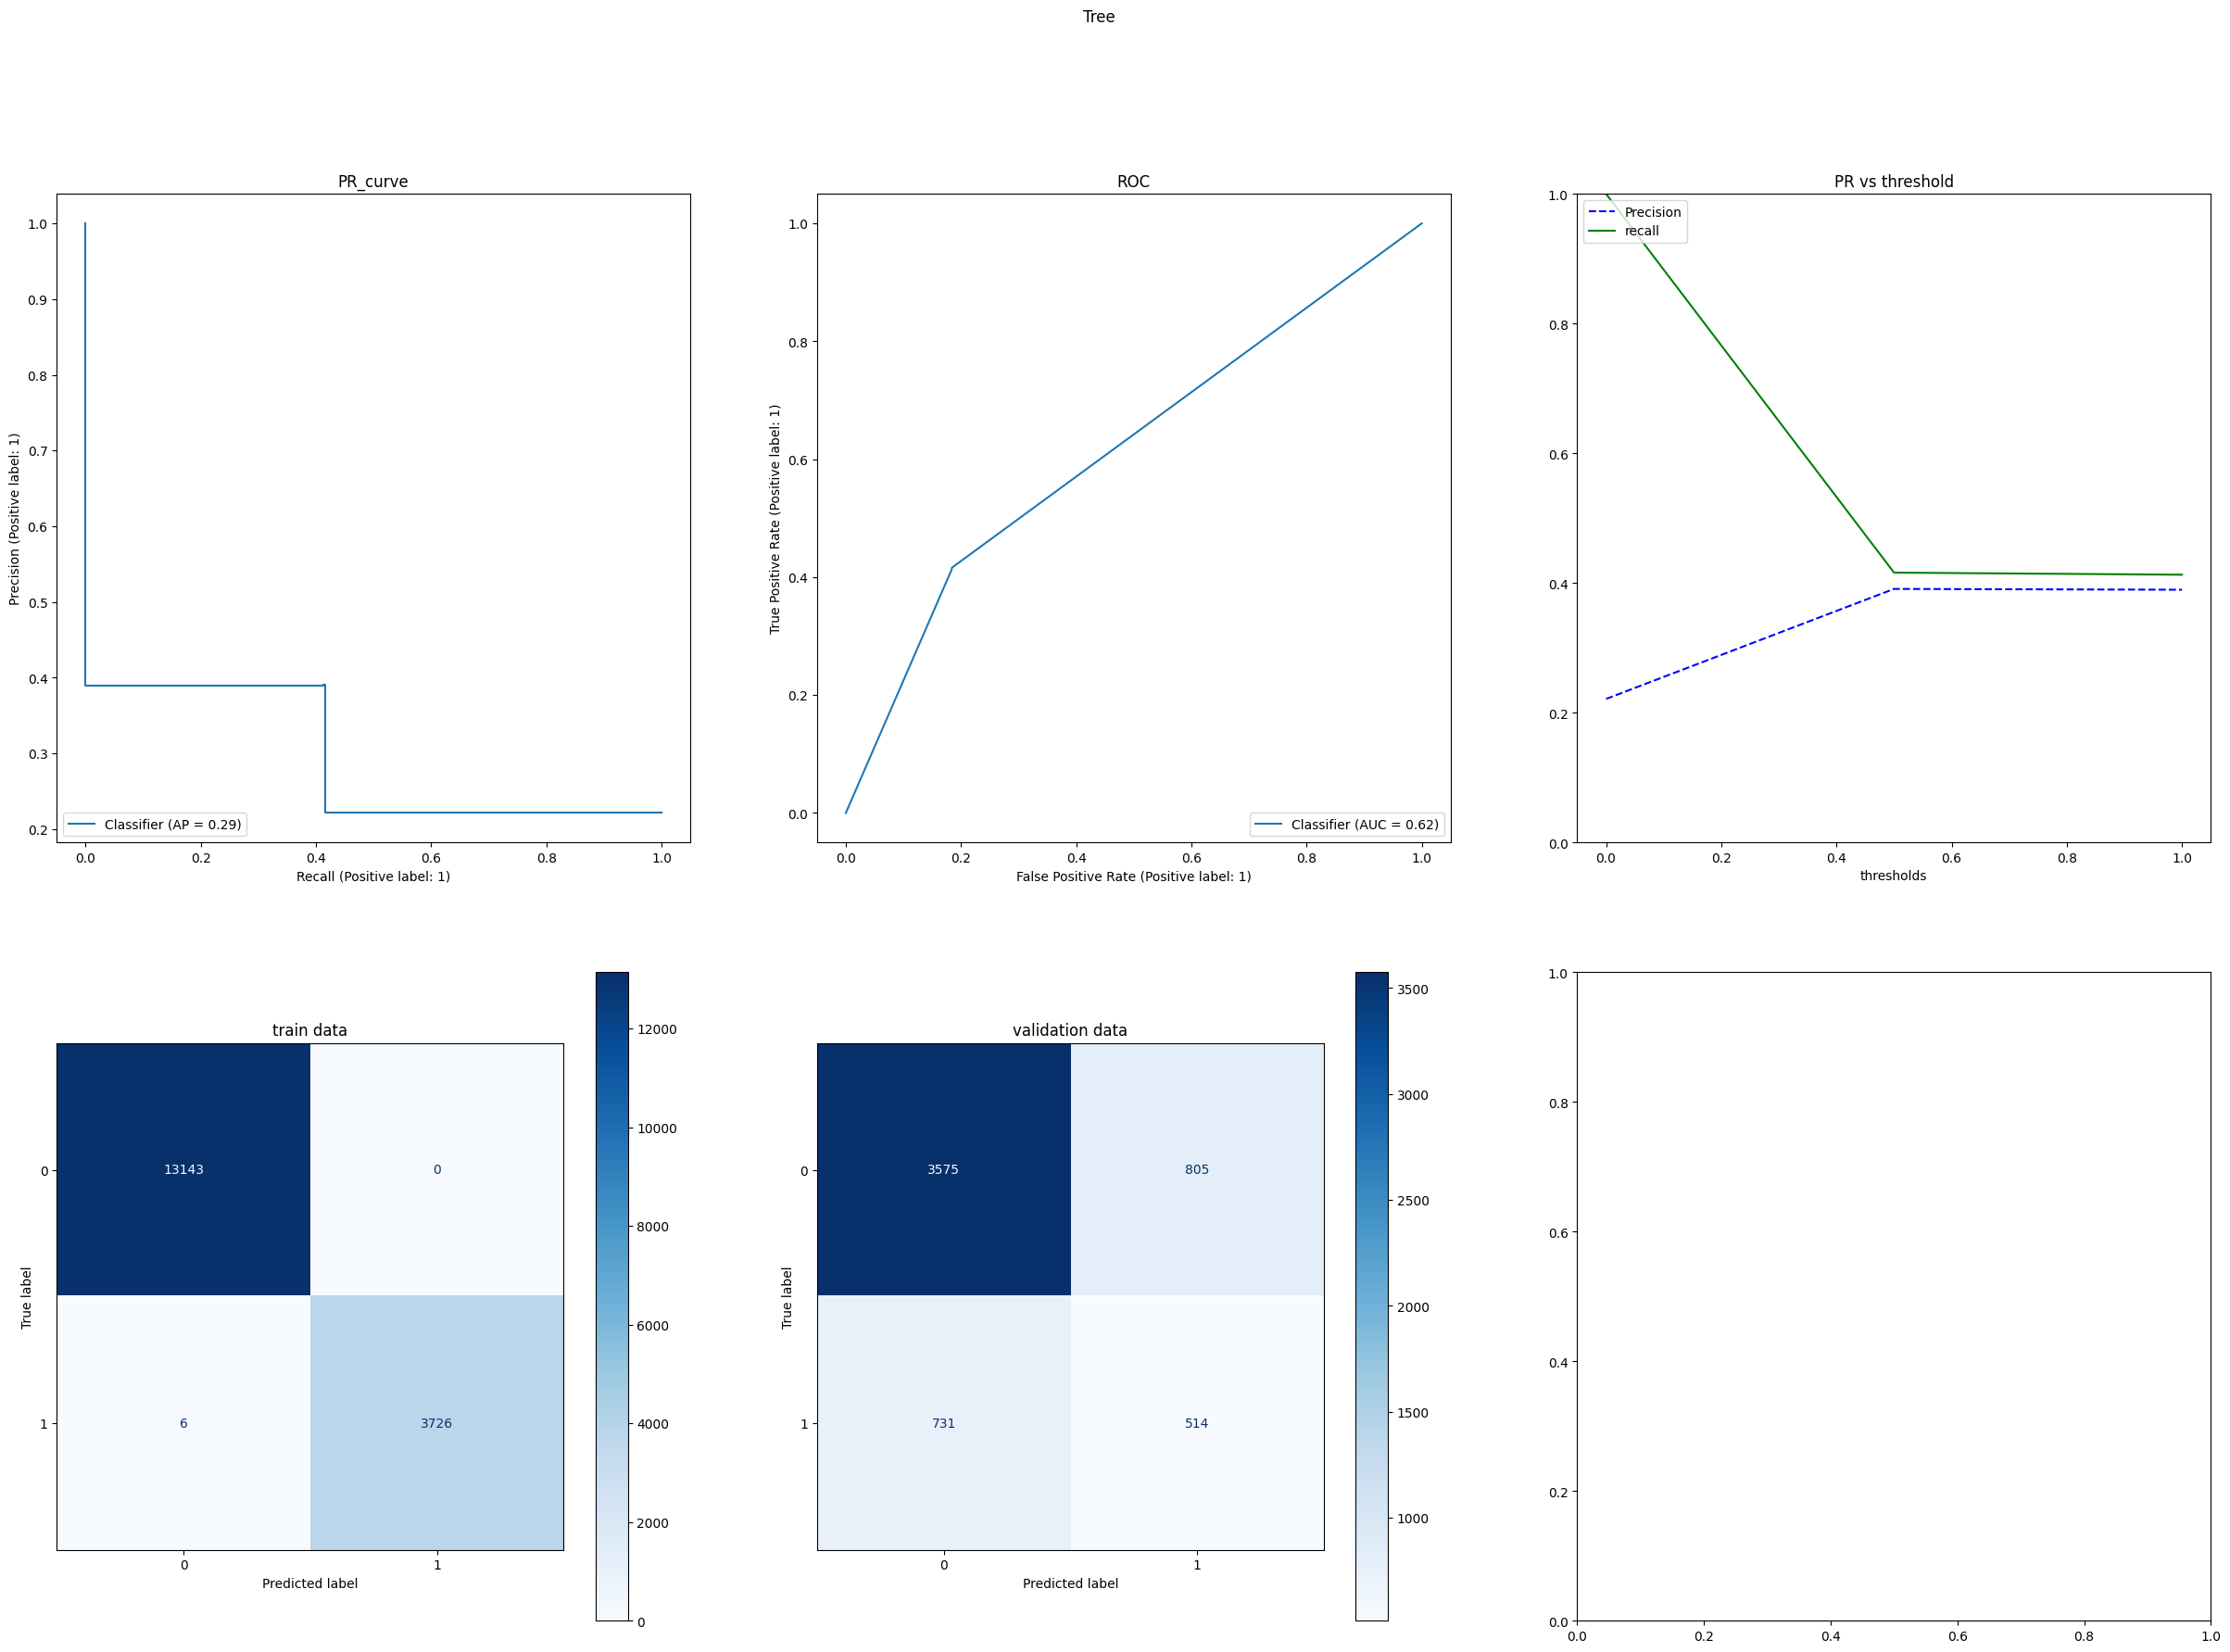

Forest
[[4118  262]
 [ 779  466]]

train scores
accuracy : 0.9996444444444444
precision : 0.9994638069705094
recall : 0.9989281886387996
f1_score: 0.9991959260251944

Val scores
accuracy : 0.8149333333333333
precision : 0.6401098901098901
recall : 0.3742971887550201
f1_score: 0.47237709072478457


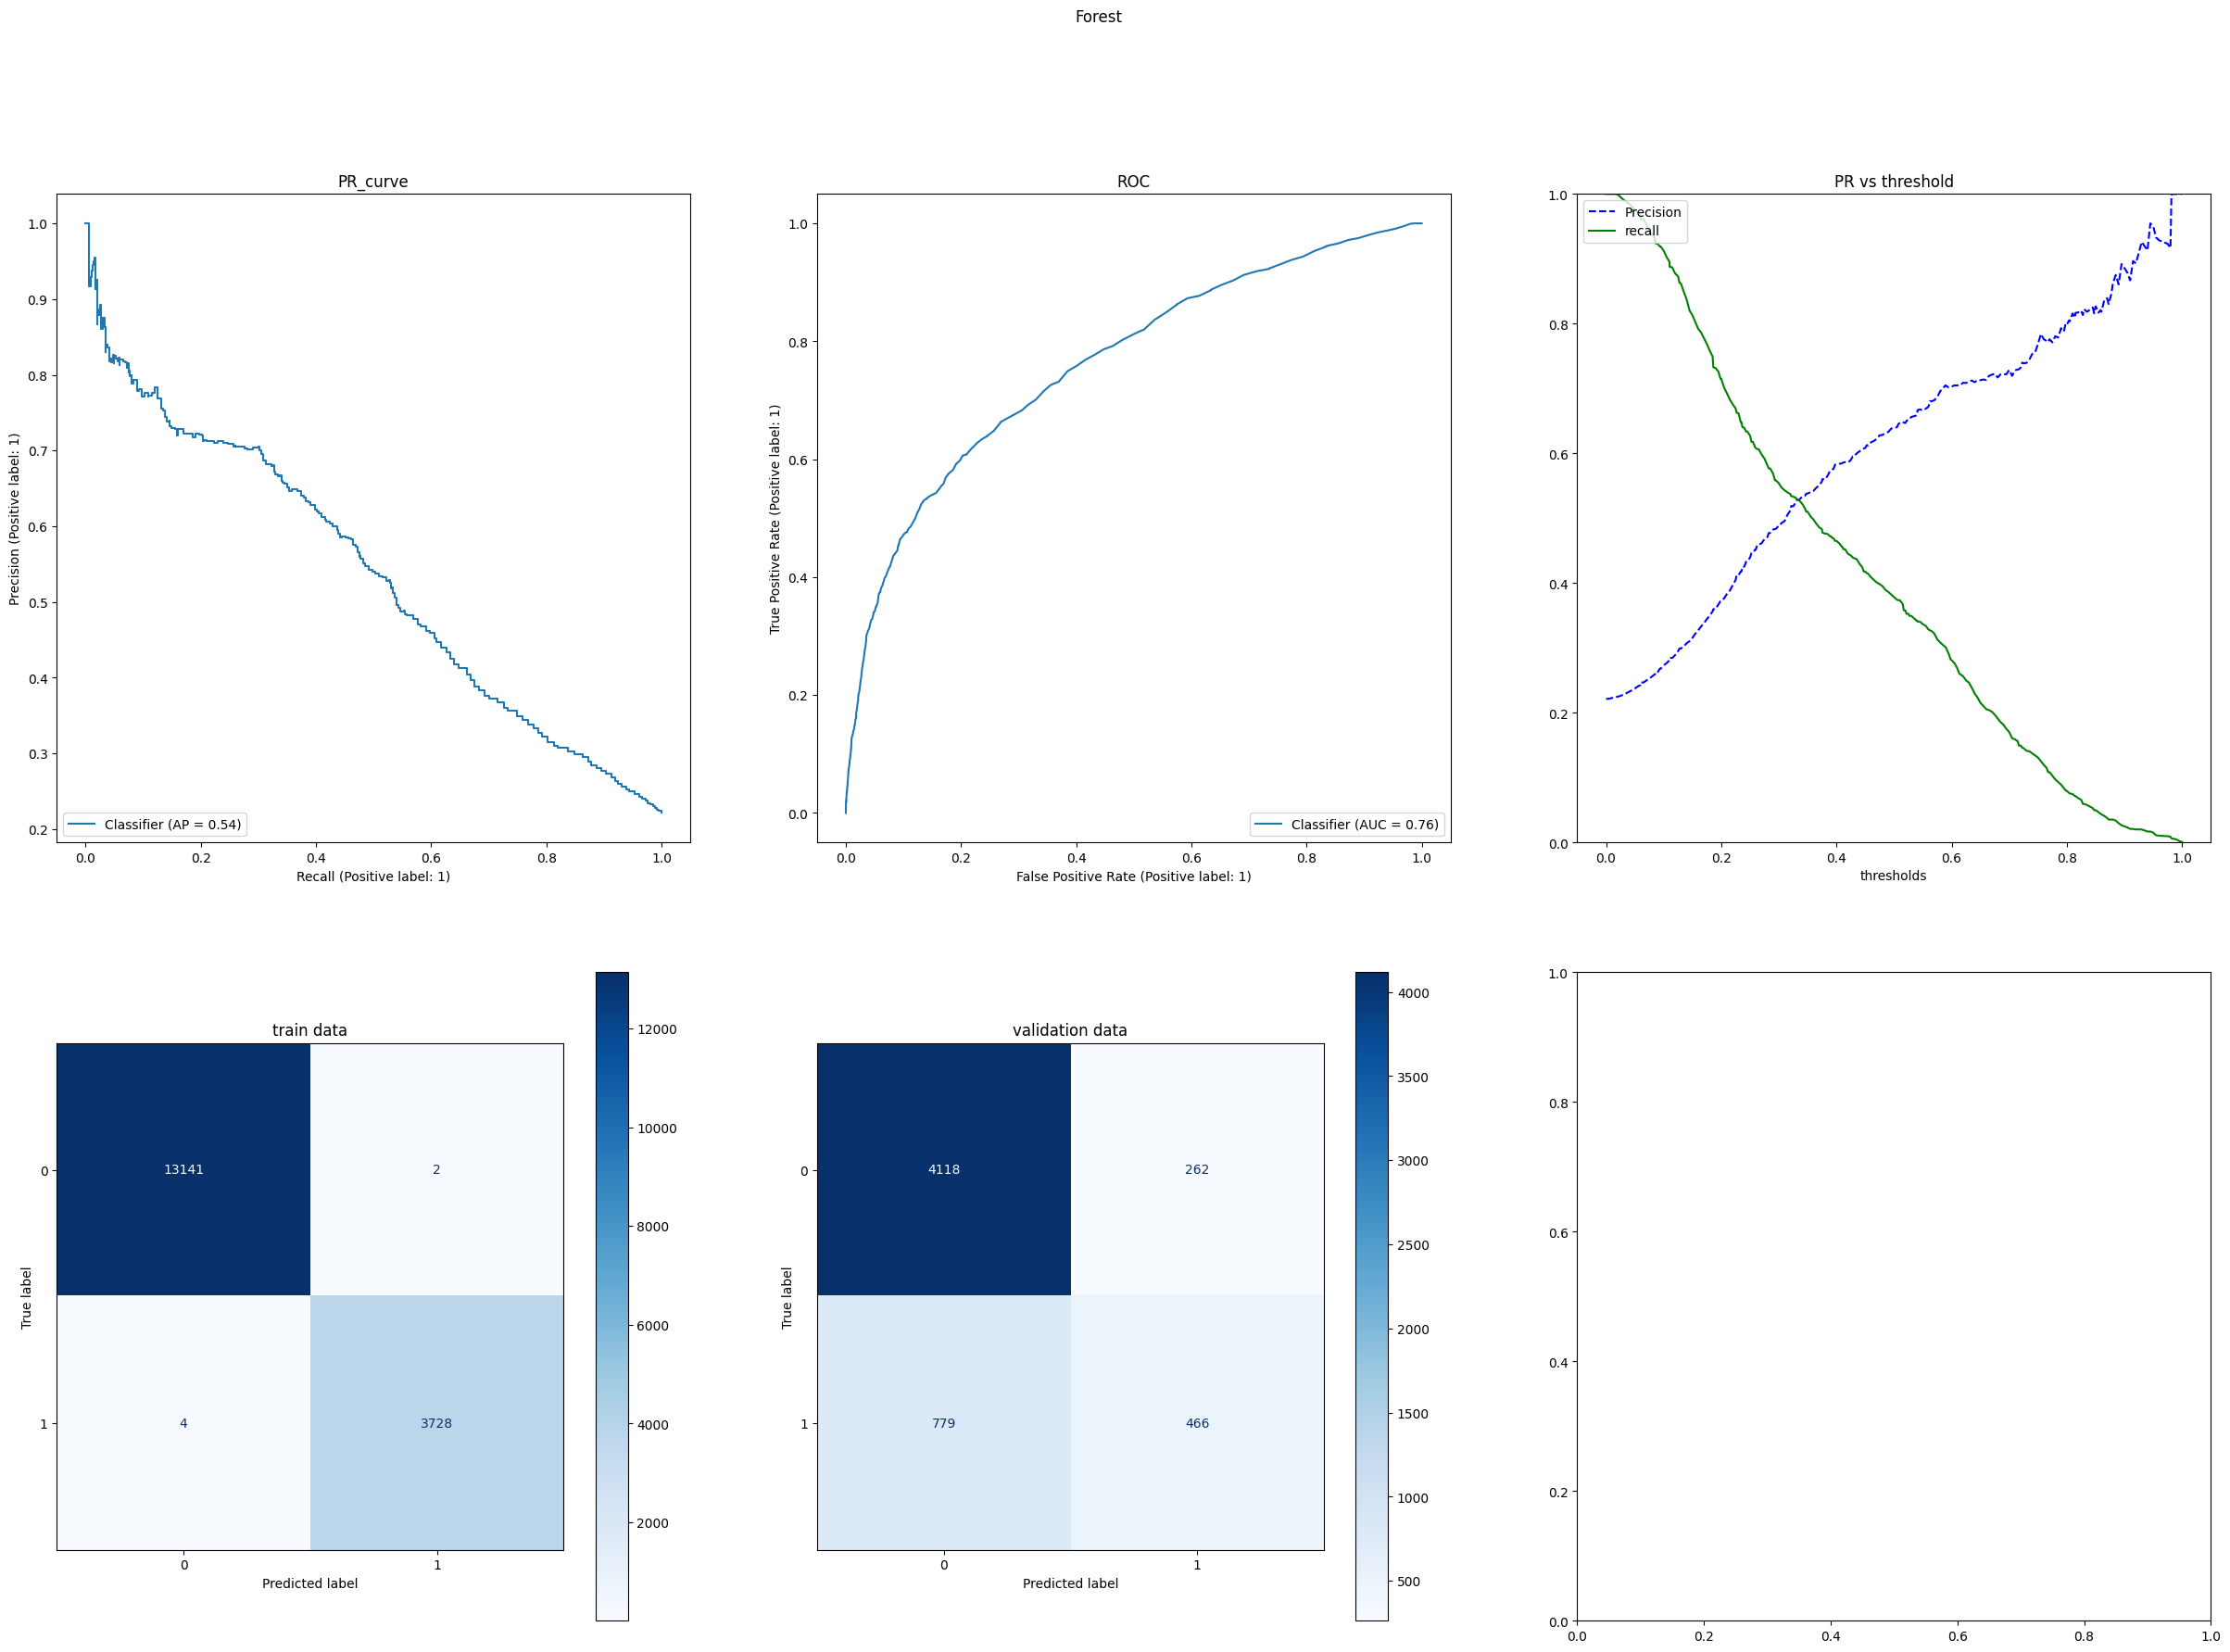

Ada
[[4180  200]
 [ 814  431]]

train scores
accuracy : 0.8205629629629629
precision : 0.6959910913140311
recall : 0.334941050375134
f1_score: 0.45224312590448623

Val scores
accuracy : 0.8197333333333333
precision : 0.6830427892234548
recall : 0.3461847389558233
f1_score: 0.4594882729211087


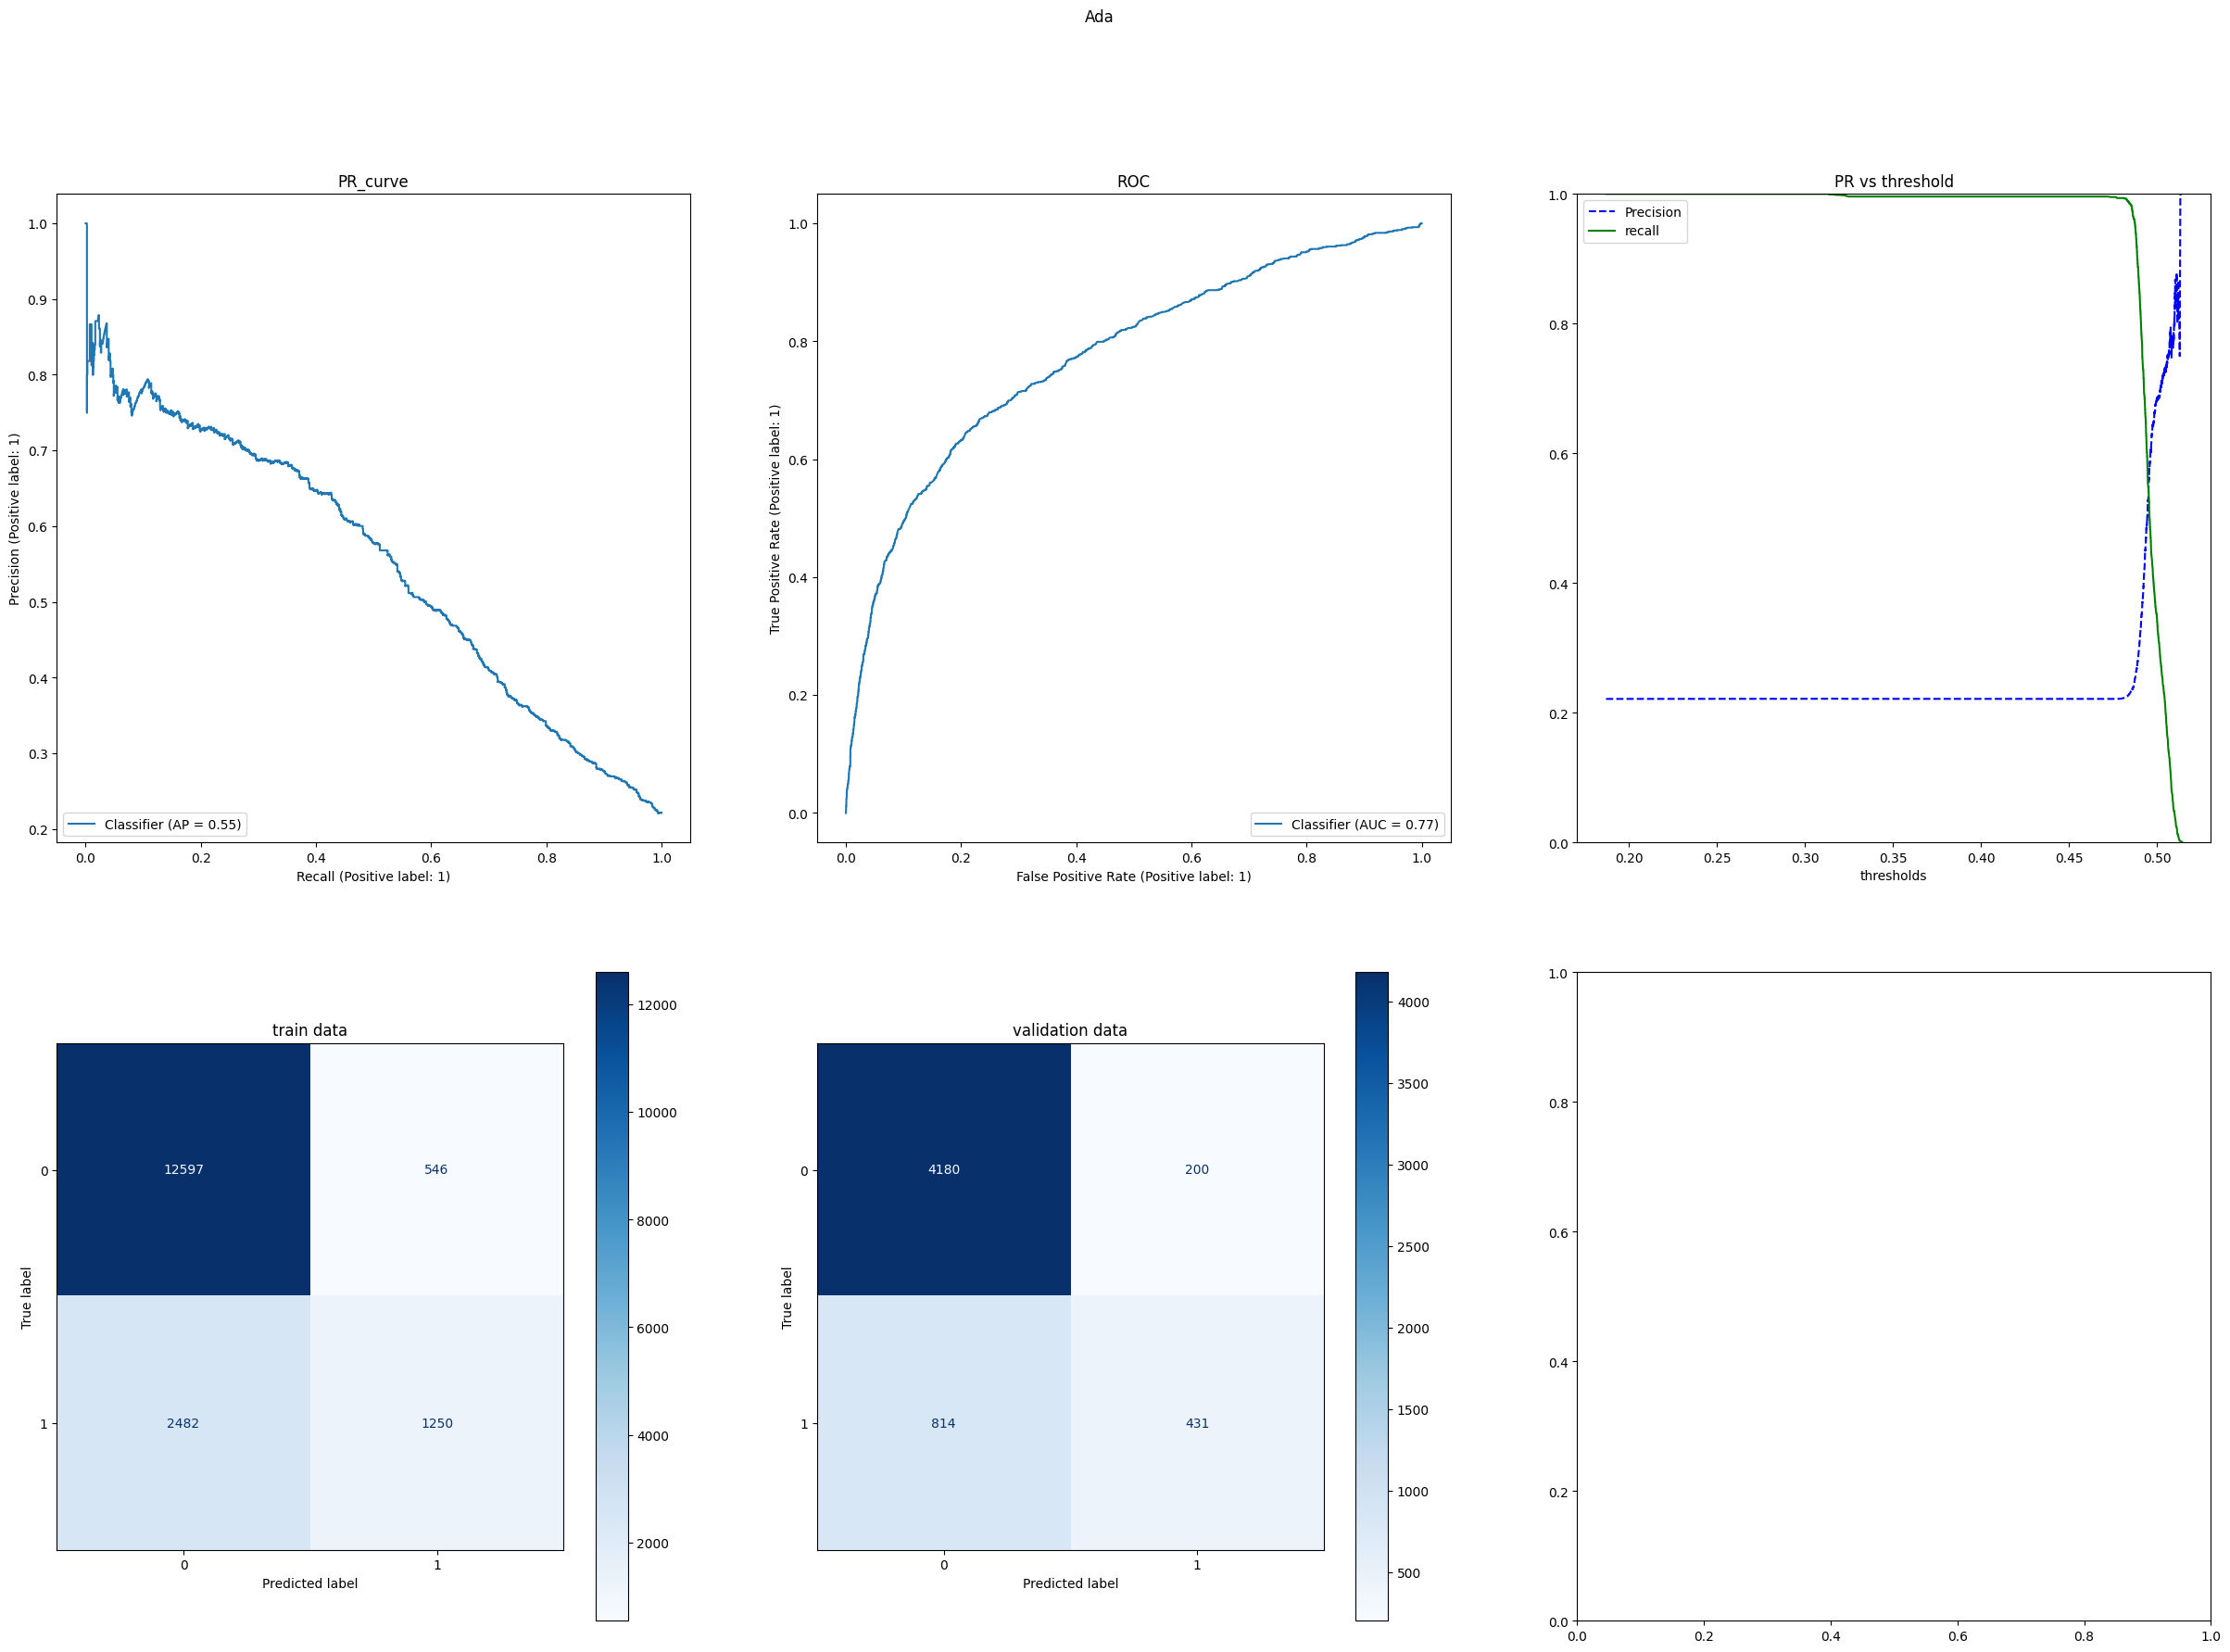

GdBoost
[[4171  209]
 [ 779  466]]

train scores
accuracy : 0.8288
precision : 0.7123425692695214
recall : 0.37888531618435156
f1_score: 0.49466503410879836

Val scores
accuracy : 0.8243555555555555
precision : 0.6903703703703704
recall : 0.3742971887550201
f1_score: 0.4854166666666668


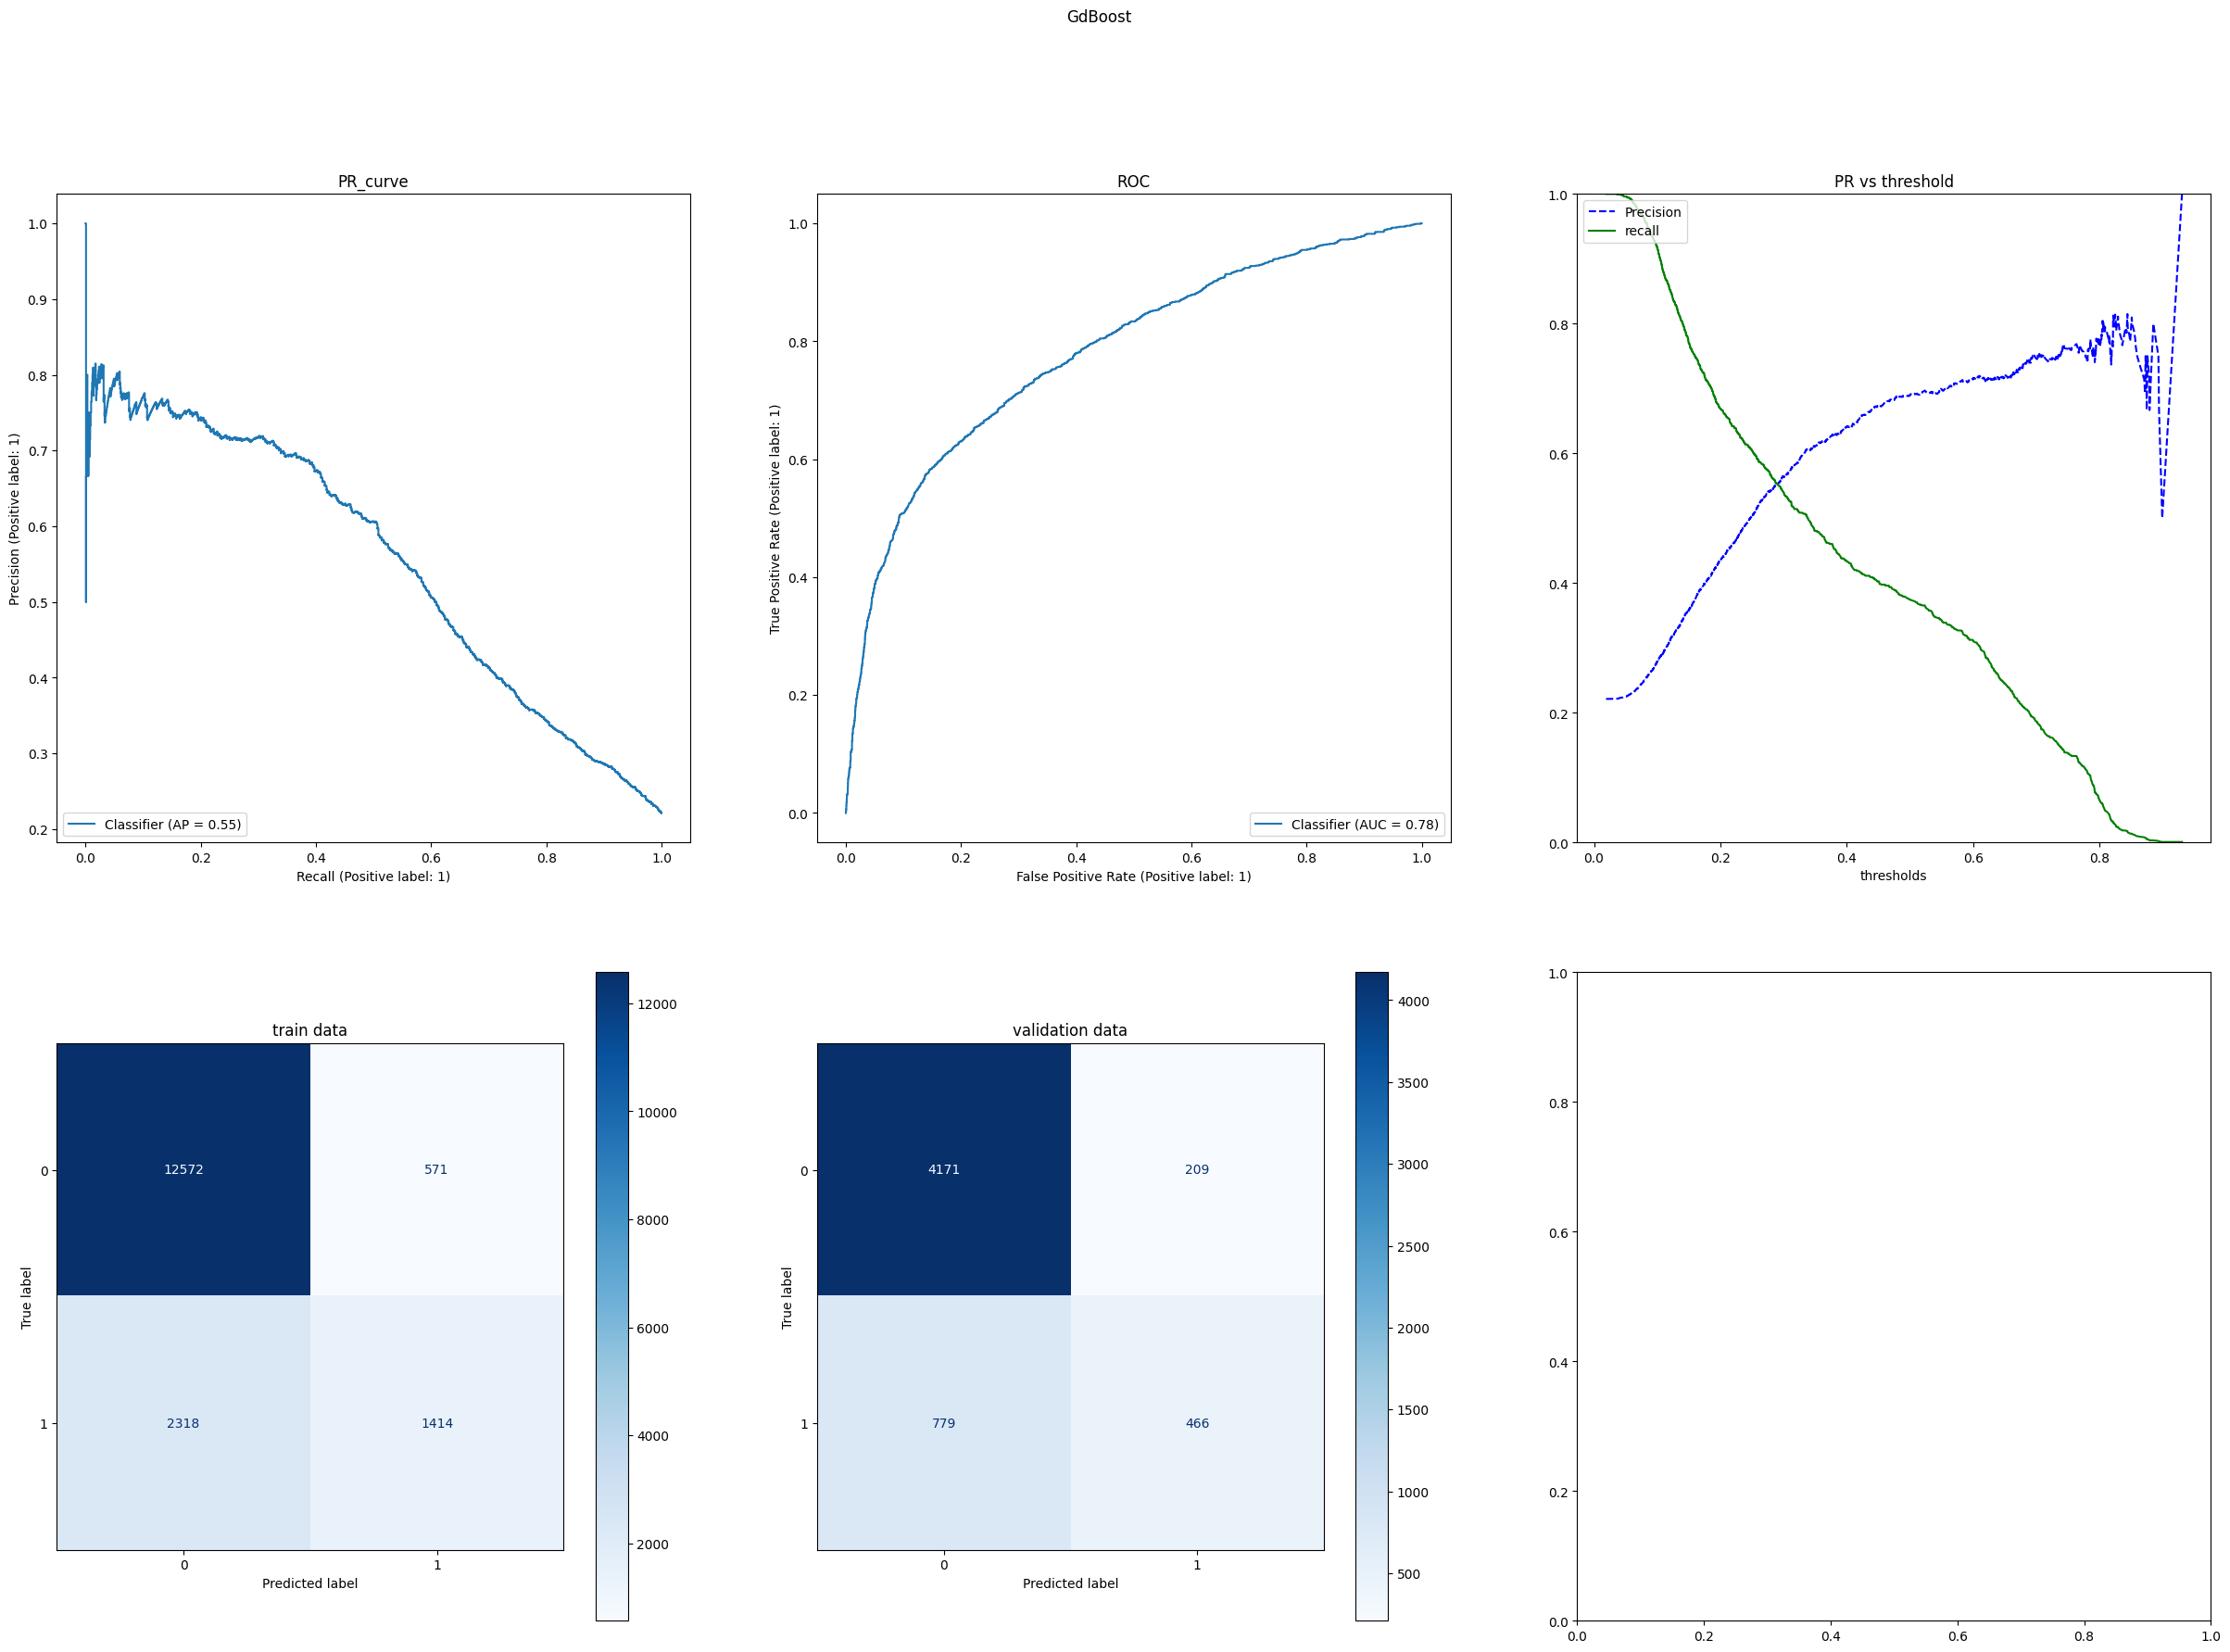

In [14]:
case_name ='raw,non_regul'
print(case_name)

my_base_transform = BasicTransformer(manuel=manuel_ch)
clfs = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=200,random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [15]:
case_name = 't_series,reg'
print(case_name)


t_series,reg


Tree
[[4137  243]
 [ 778  467]]

train scores
accuracy : 0.8278518518518518
precision : 0.7023984336759667
recall : 0.3845123258306538
f1_score: 0.4969696969696969

Val scores
accuracy : 0.8184888888888889
precision : 0.6577464788732394
recall : 0.3751004016064257
f1_score: 0.4777493606138108


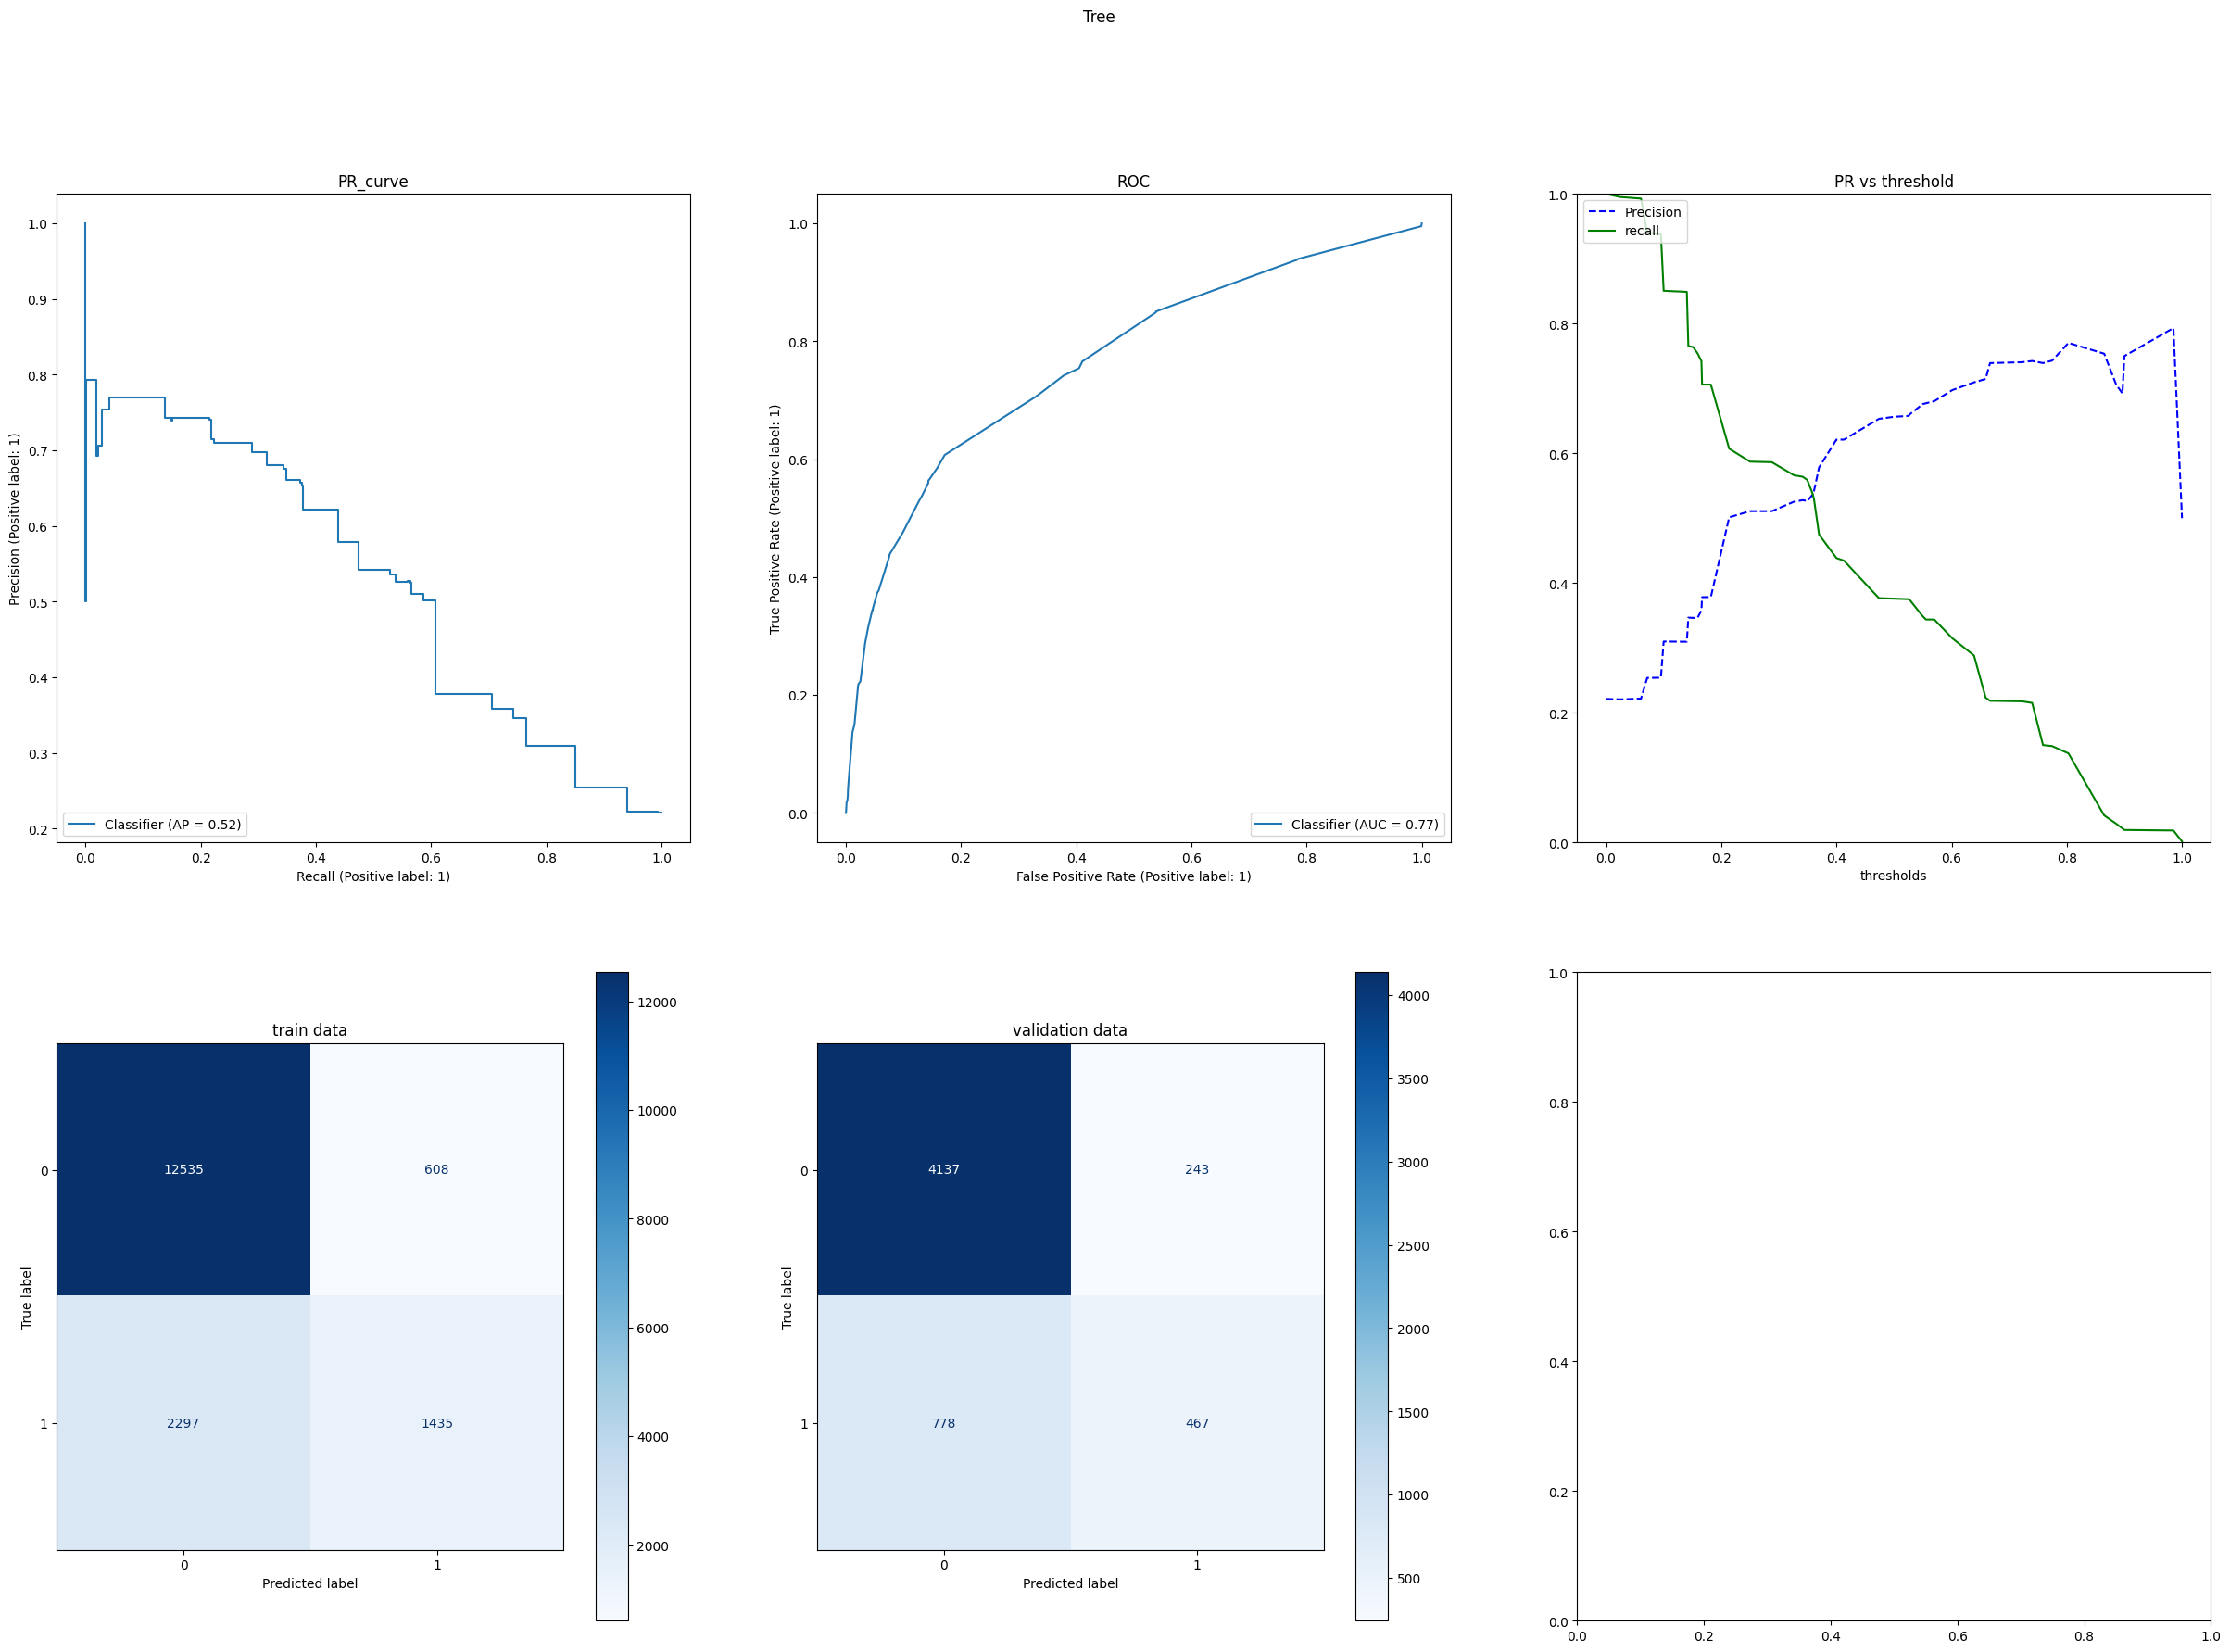

Forest
[[4200  180]
 [ 861  384]]

train scores
accuracy : 0.8199111111111111
precision : 0.718336483931947
recall : 0.3054662379421222
f1_score: 0.42865200225606315

Val scores
accuracy : 0.8149333333333333
precision : 0.6808510638297872
recall : 0.30843373493975906
f1_score: 0.42454394693200664


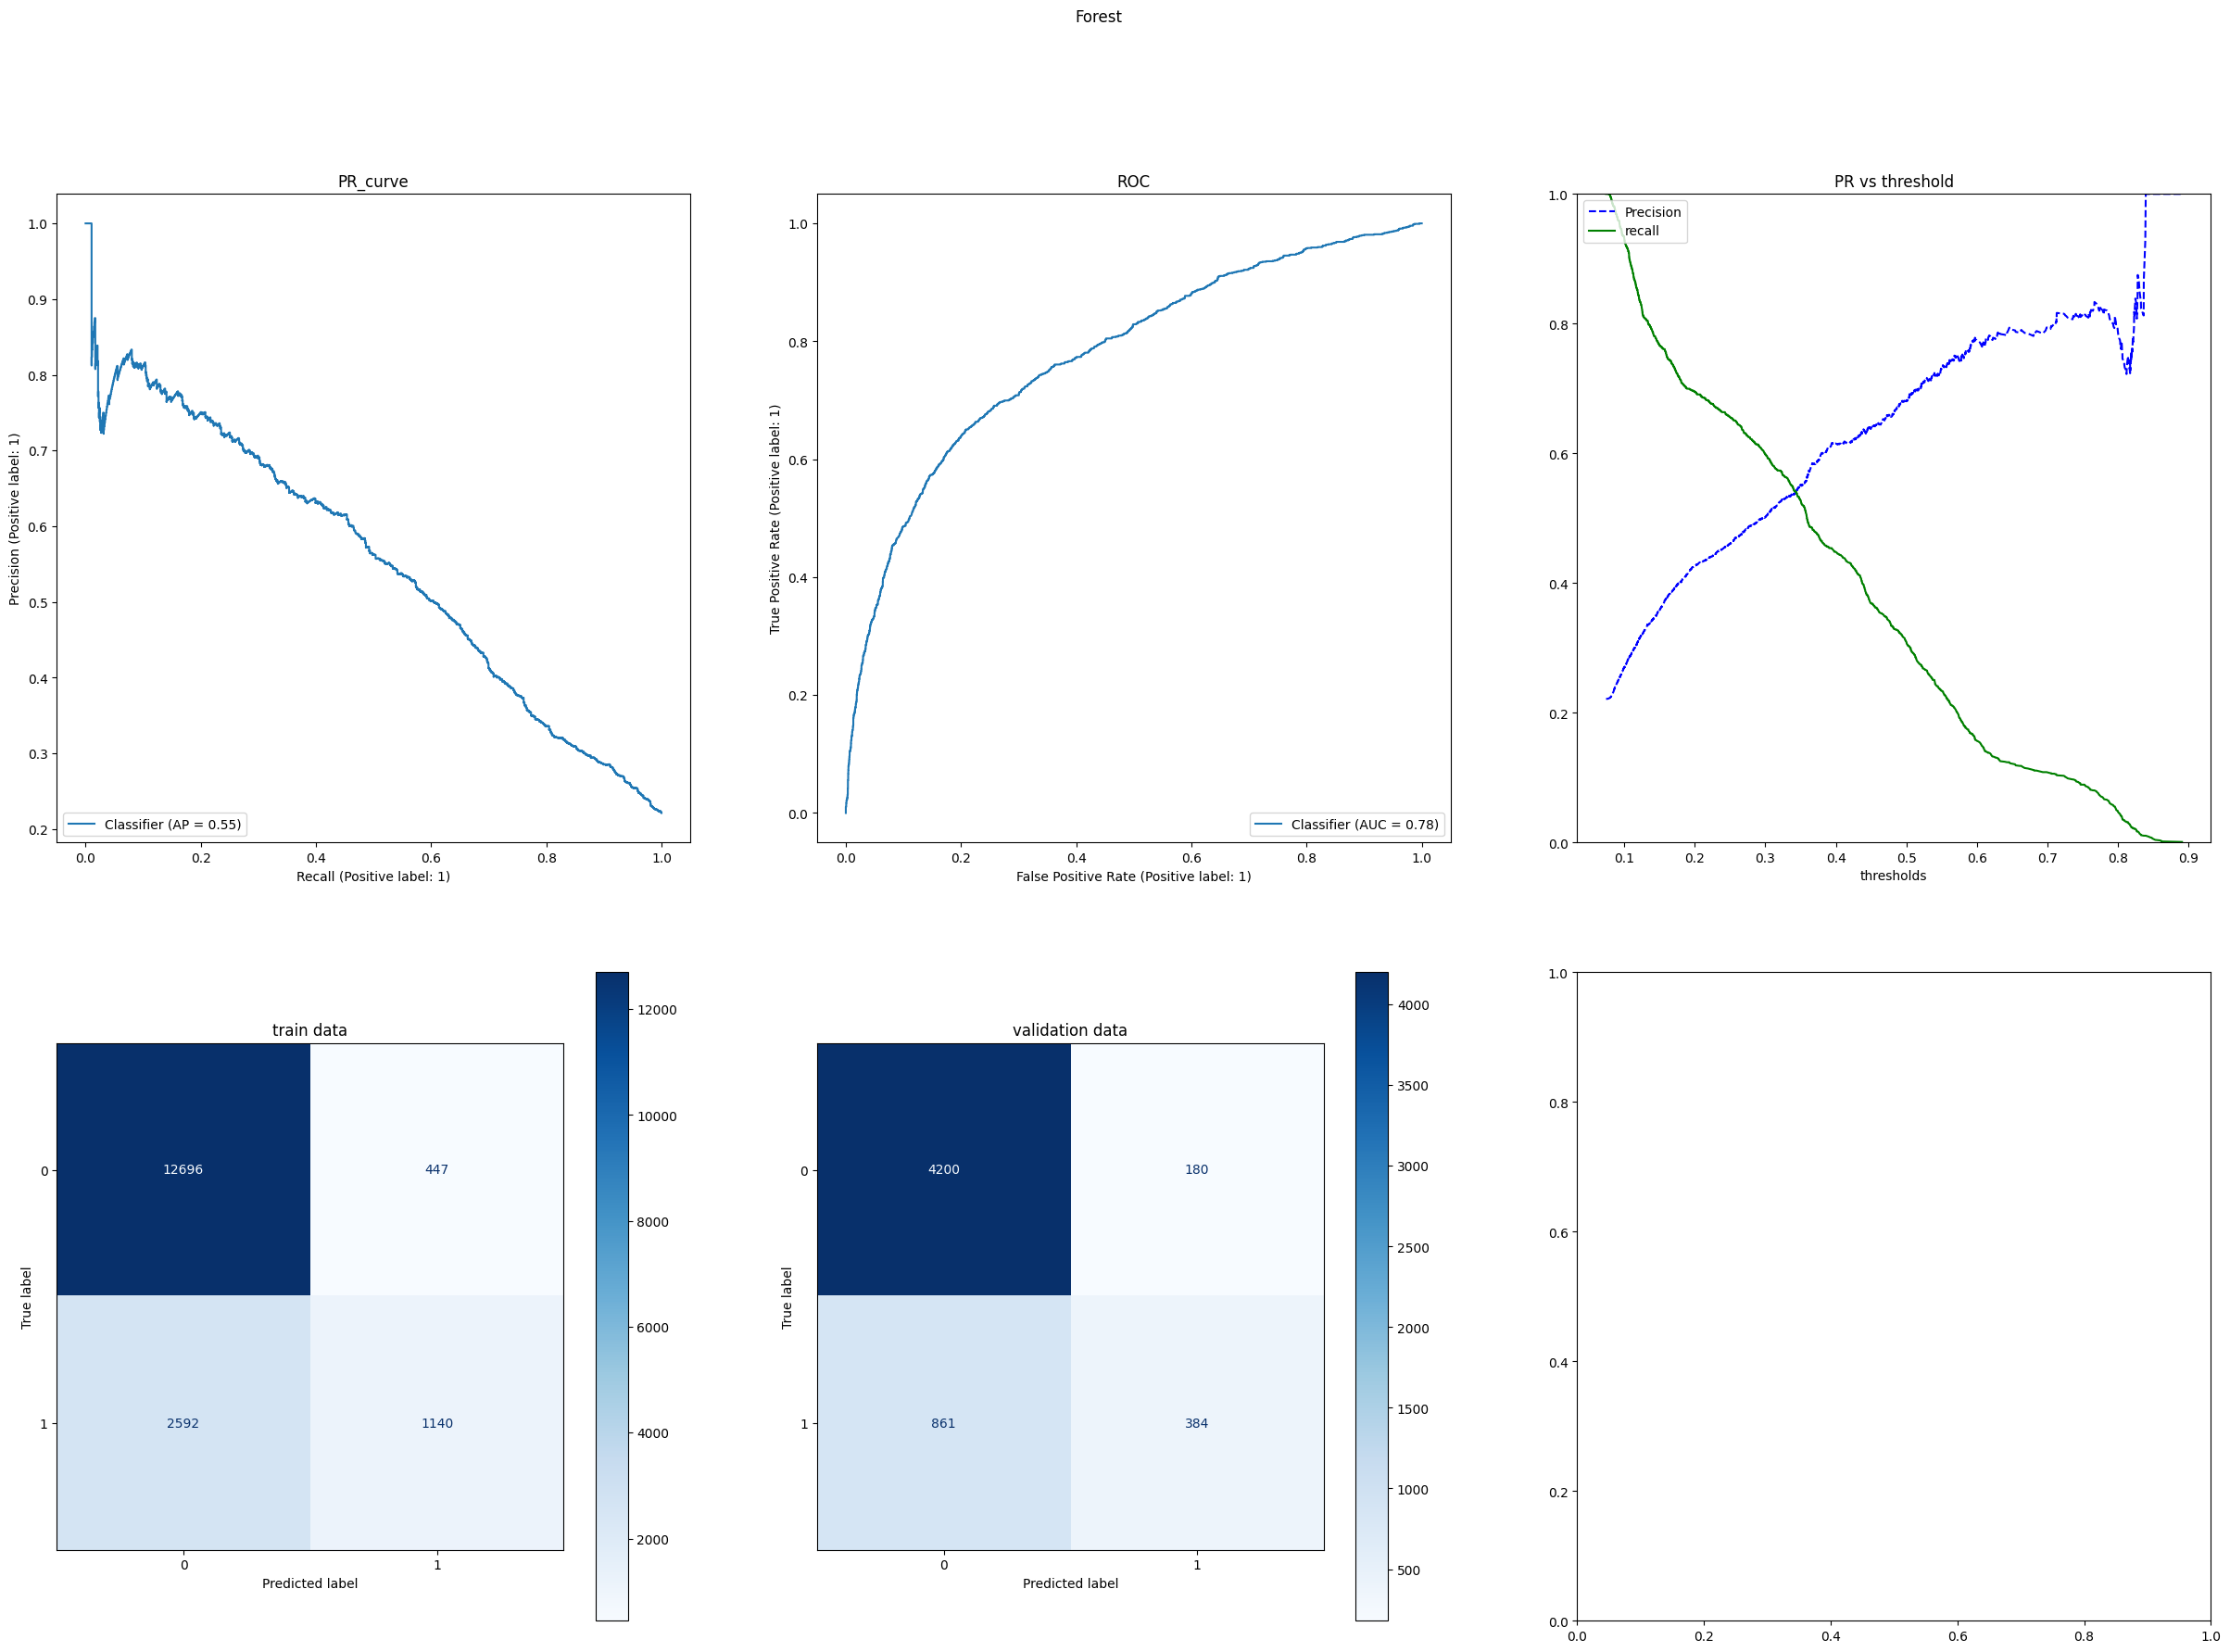

Ada
[[4187  193]
 [ 868  377]]

train scores
accuracy : 0.8096
precision : 0.6612802983219391
recall : 0.28510182207931406
f1_score: 0.39842726081258195

Val scores
accuracy : 0.8113777777777778
precision : 0.6614035087719298
recall : 0.3028112449799197
f1_score: 0.41542699724517906


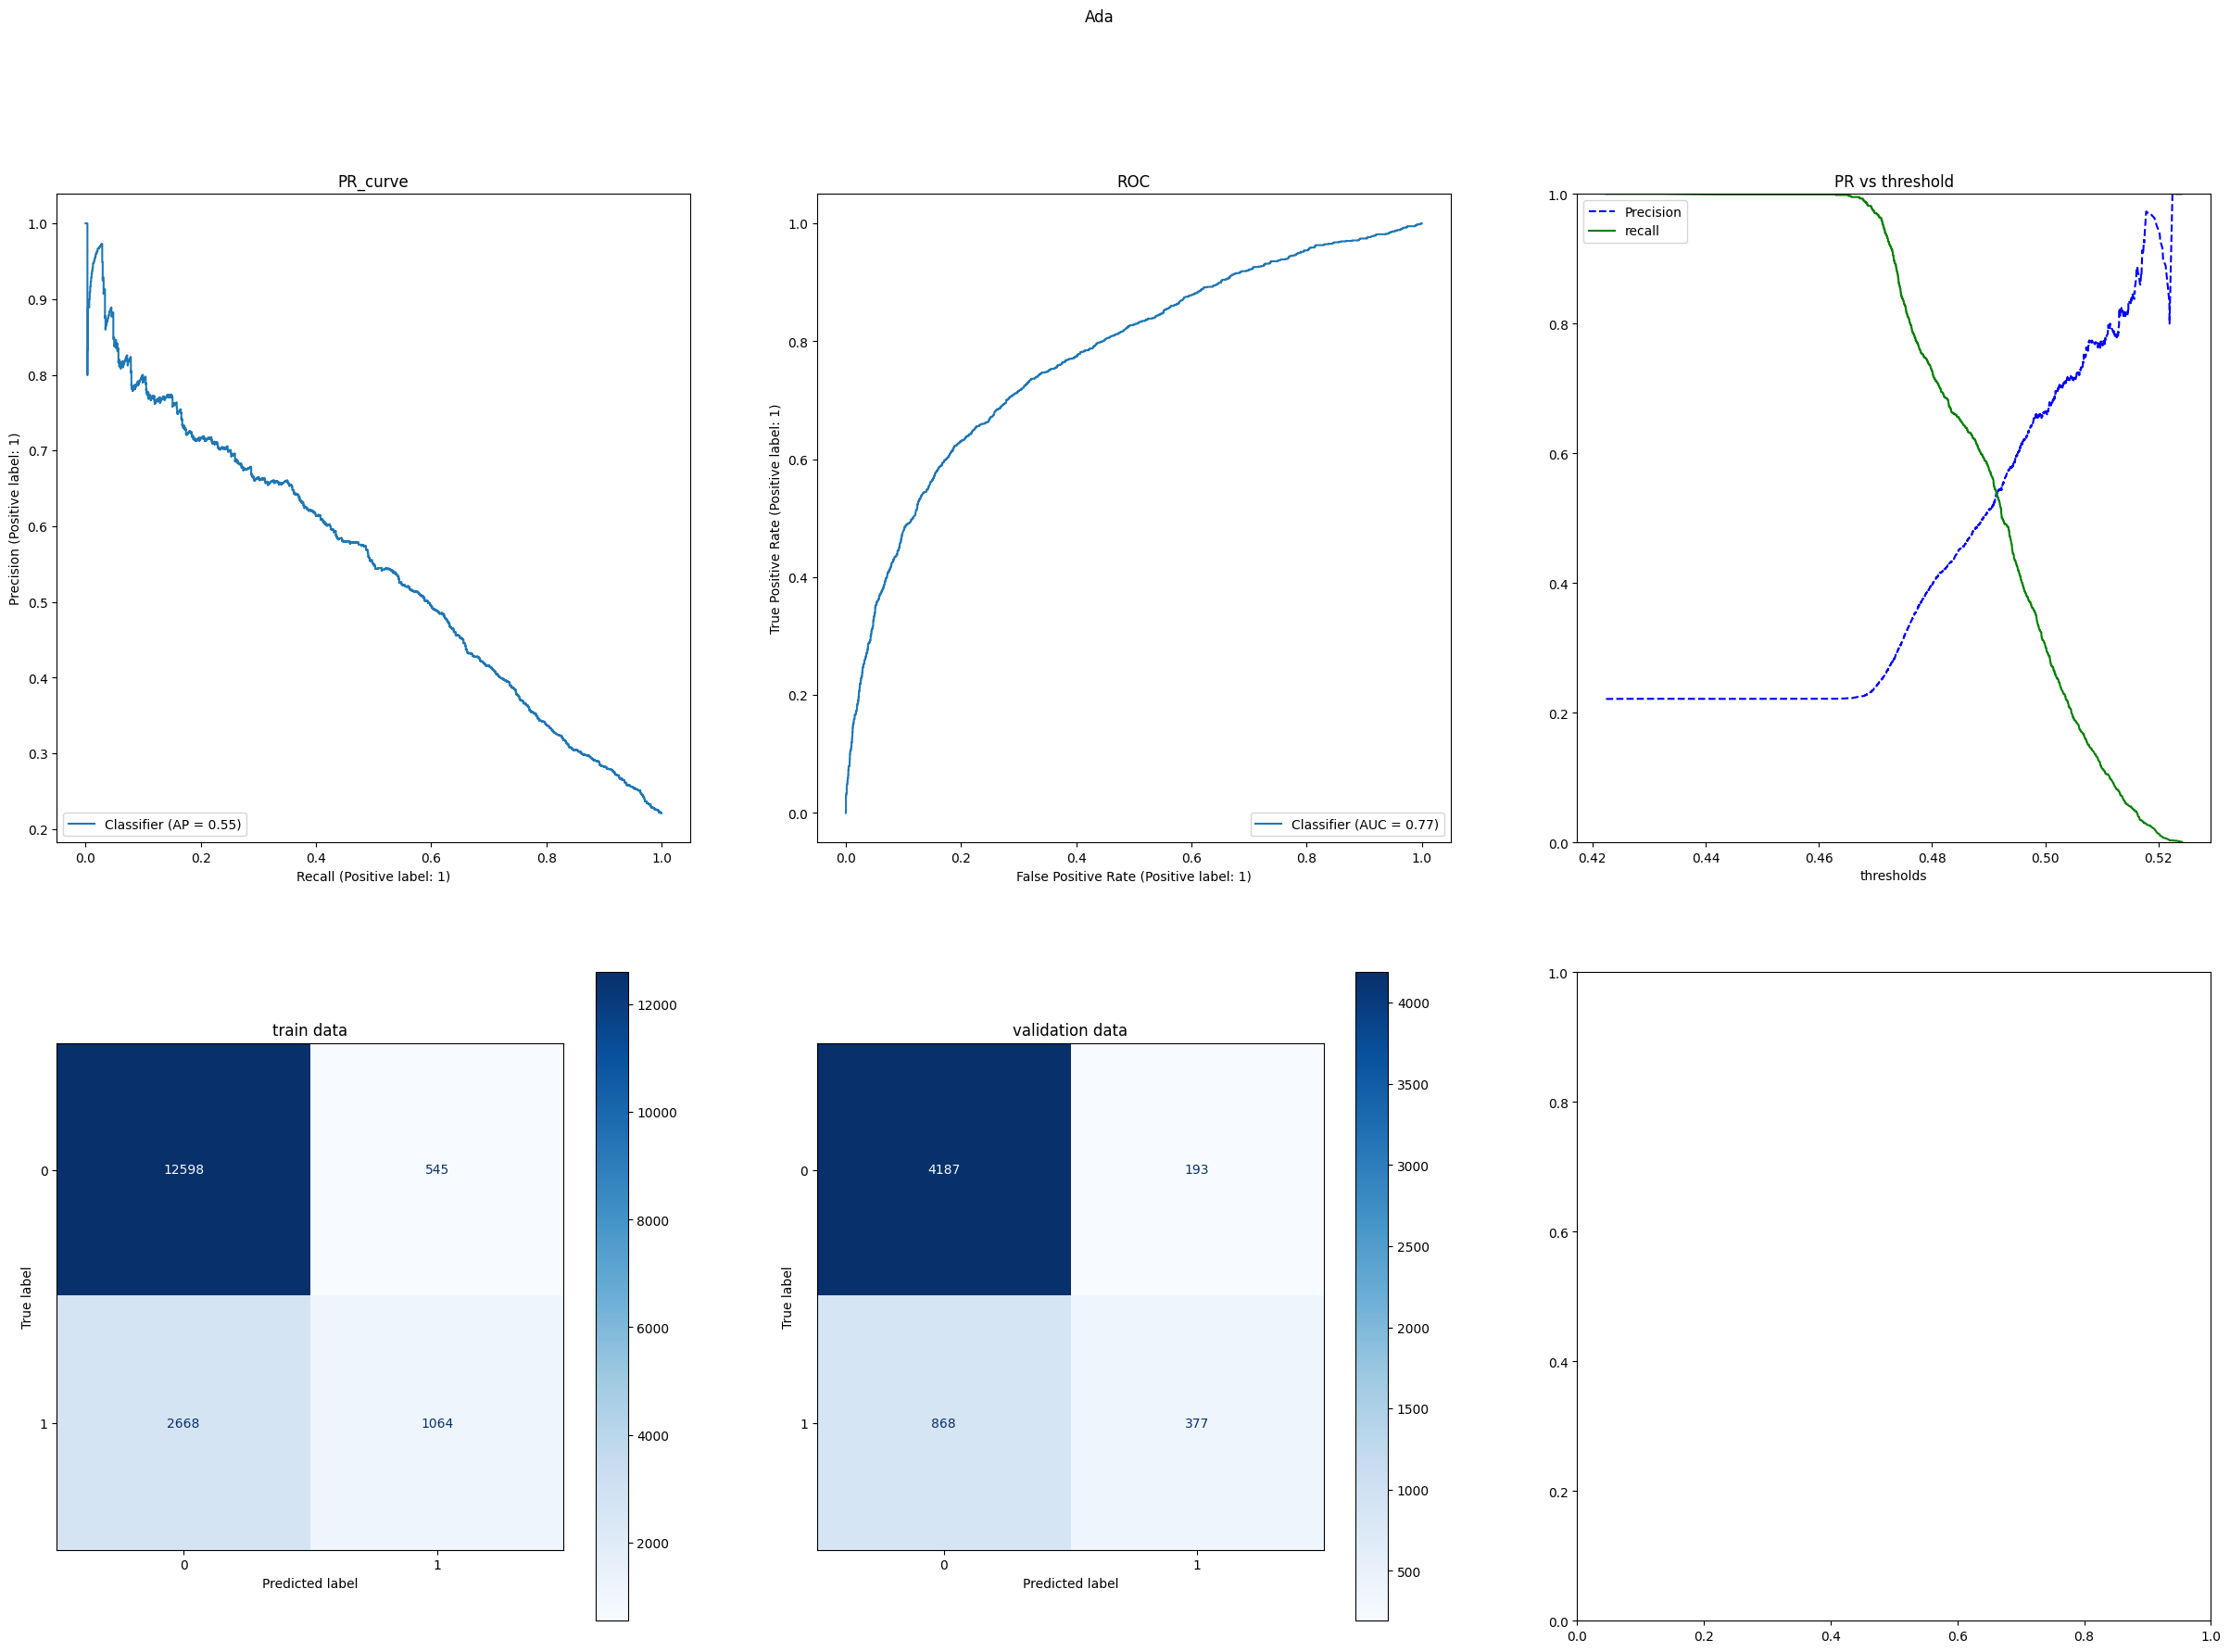

GdBoost
[[4216  164]
 [ 893  352]]

train scores
accuracy : 0.8077037037037037
precision : 0.6781272860277981
recall : 0.24839228295819935
f1_score: 0.3636007060207884

Val scores
accuracy : 0.8120888888888889
precision : 0.6821705426356589
recall : 0.2827309236947791
f1_score: 0.3997728563316297


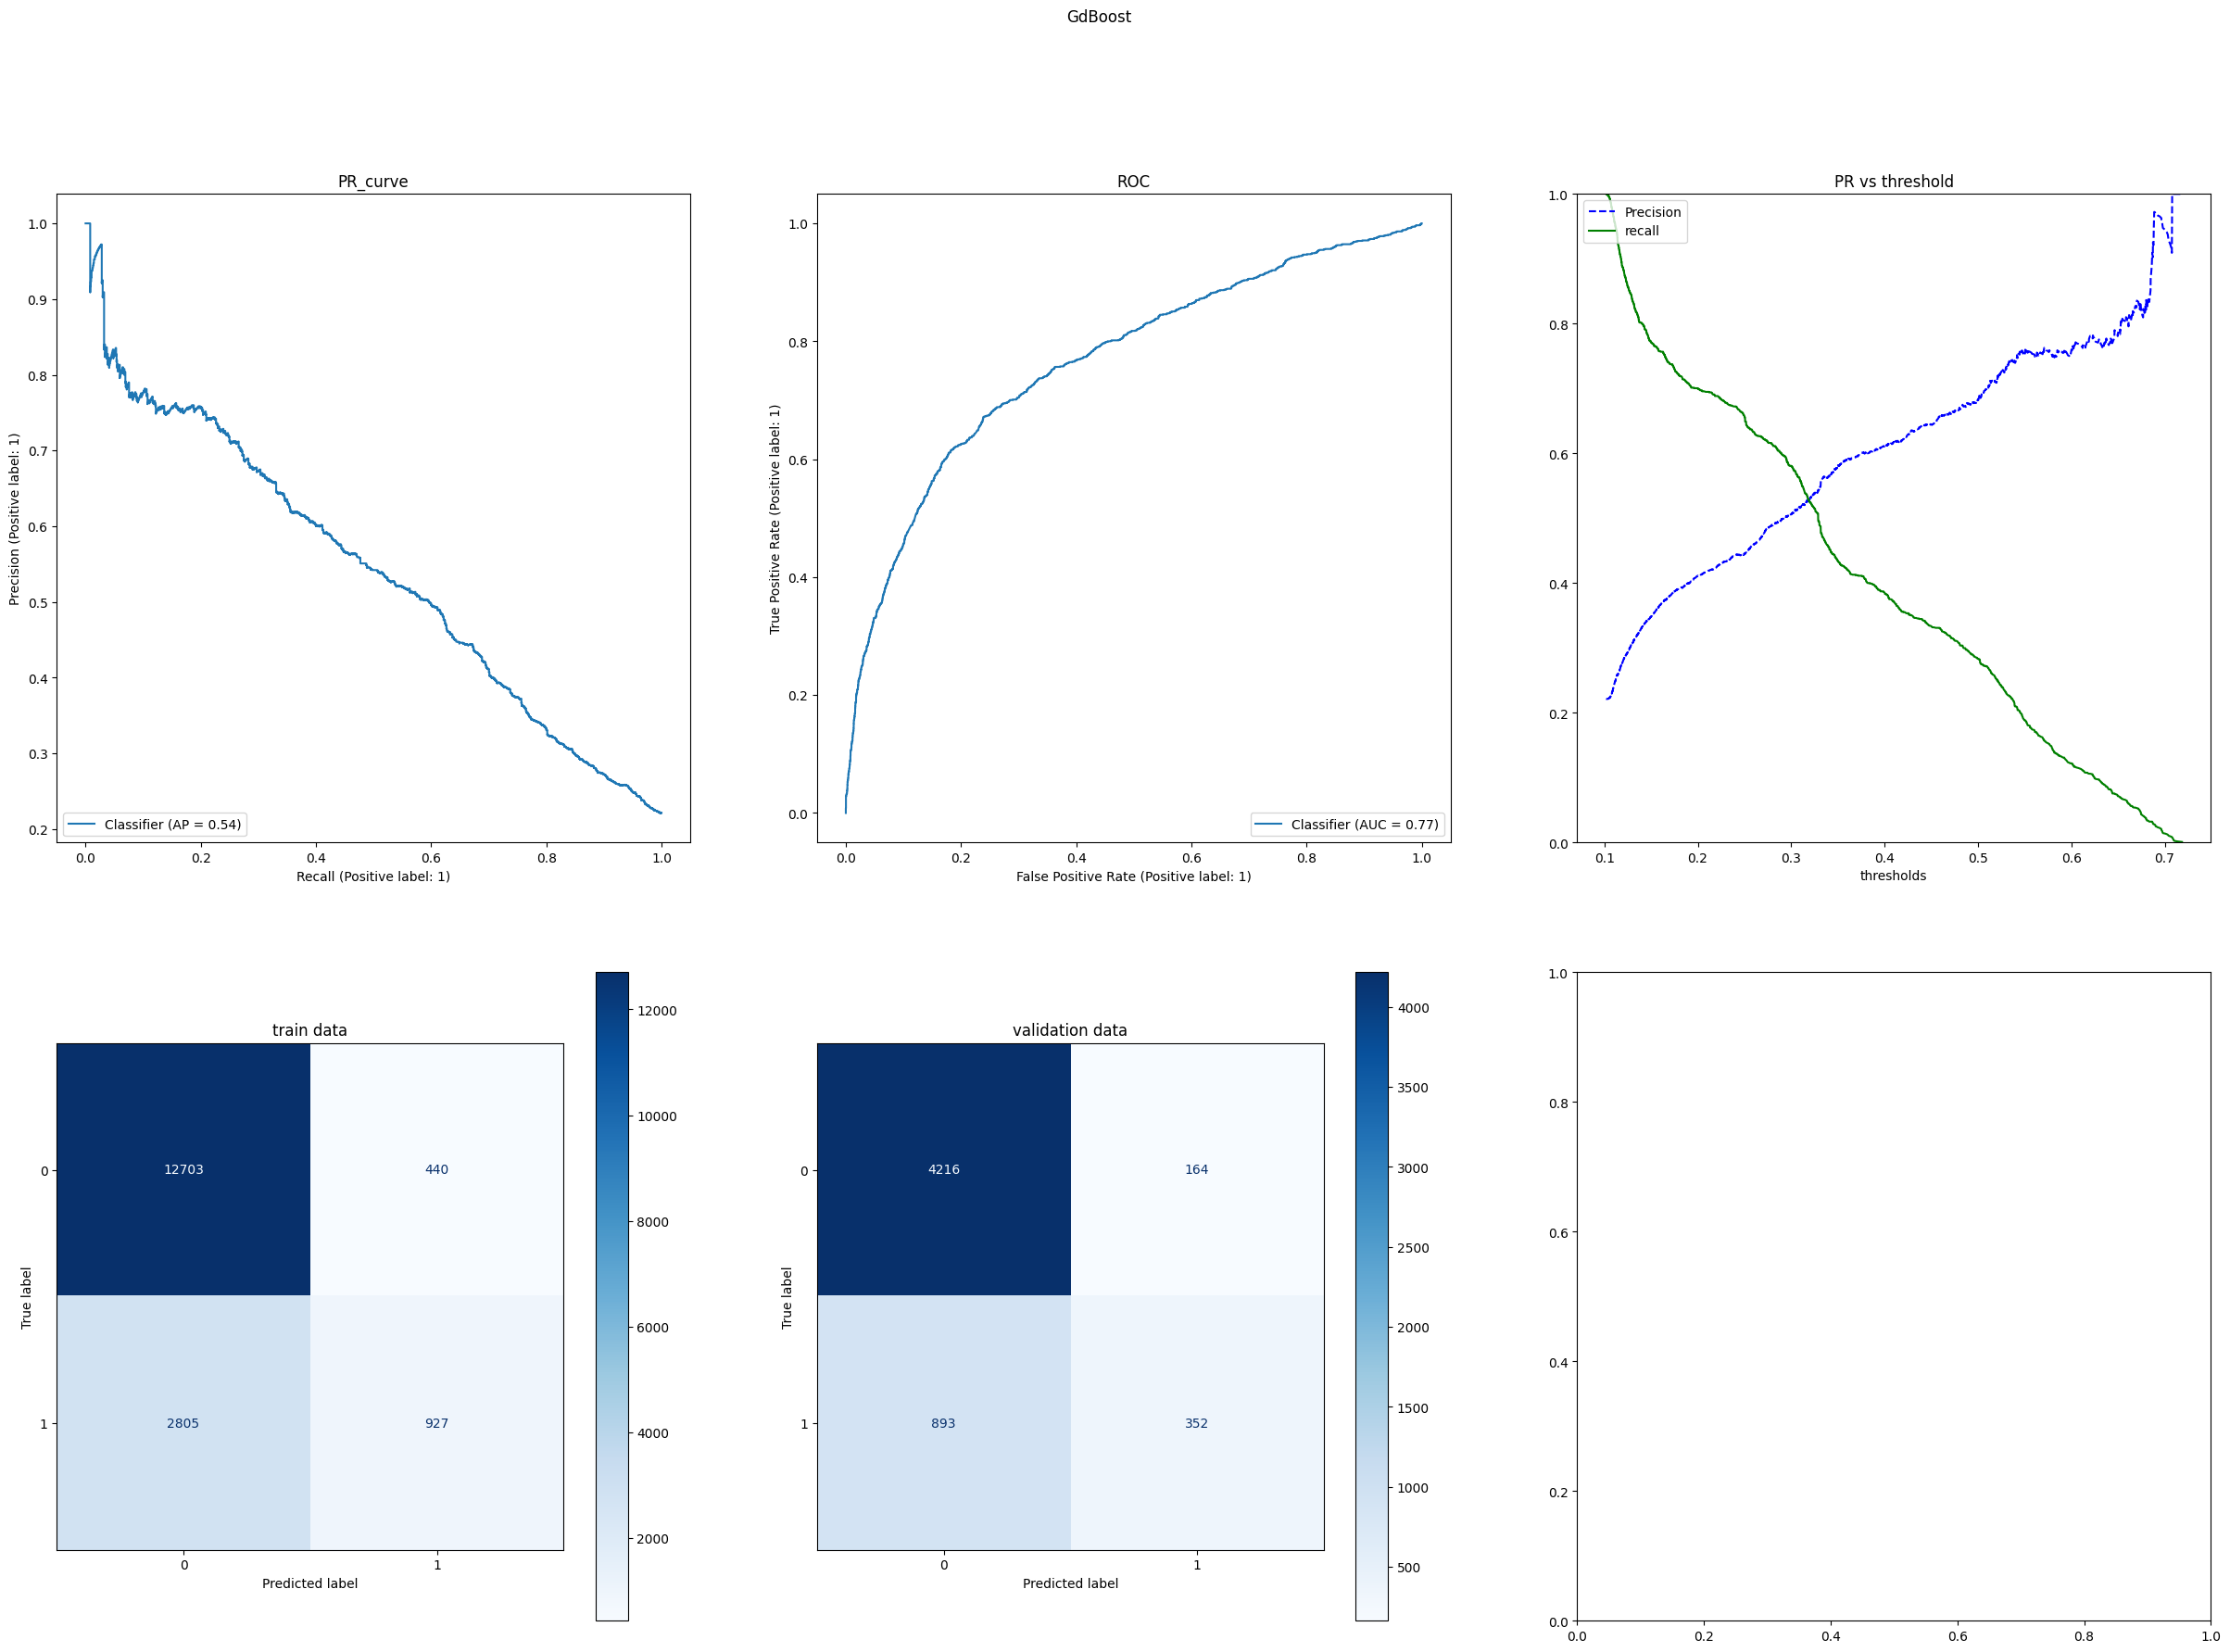

In [16]:

my_base_transform = BasicTransformer()
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [17]:
case_name ='raw,reg'

print(case_name)

raw,reg


Tree
[[4118  262]
 [ 753  492]]

train scores
accuracy : 0.8287407407407408
precision : 0.6954503249767874
recall : 0.40139335476956056
f1_score: 0.5090044172612981

Val scores
accuracy : 0.8195555555555556
precision : 0.6525198938992043
recall : 0.39518072289156625
f1_score: 0.49224612306153076


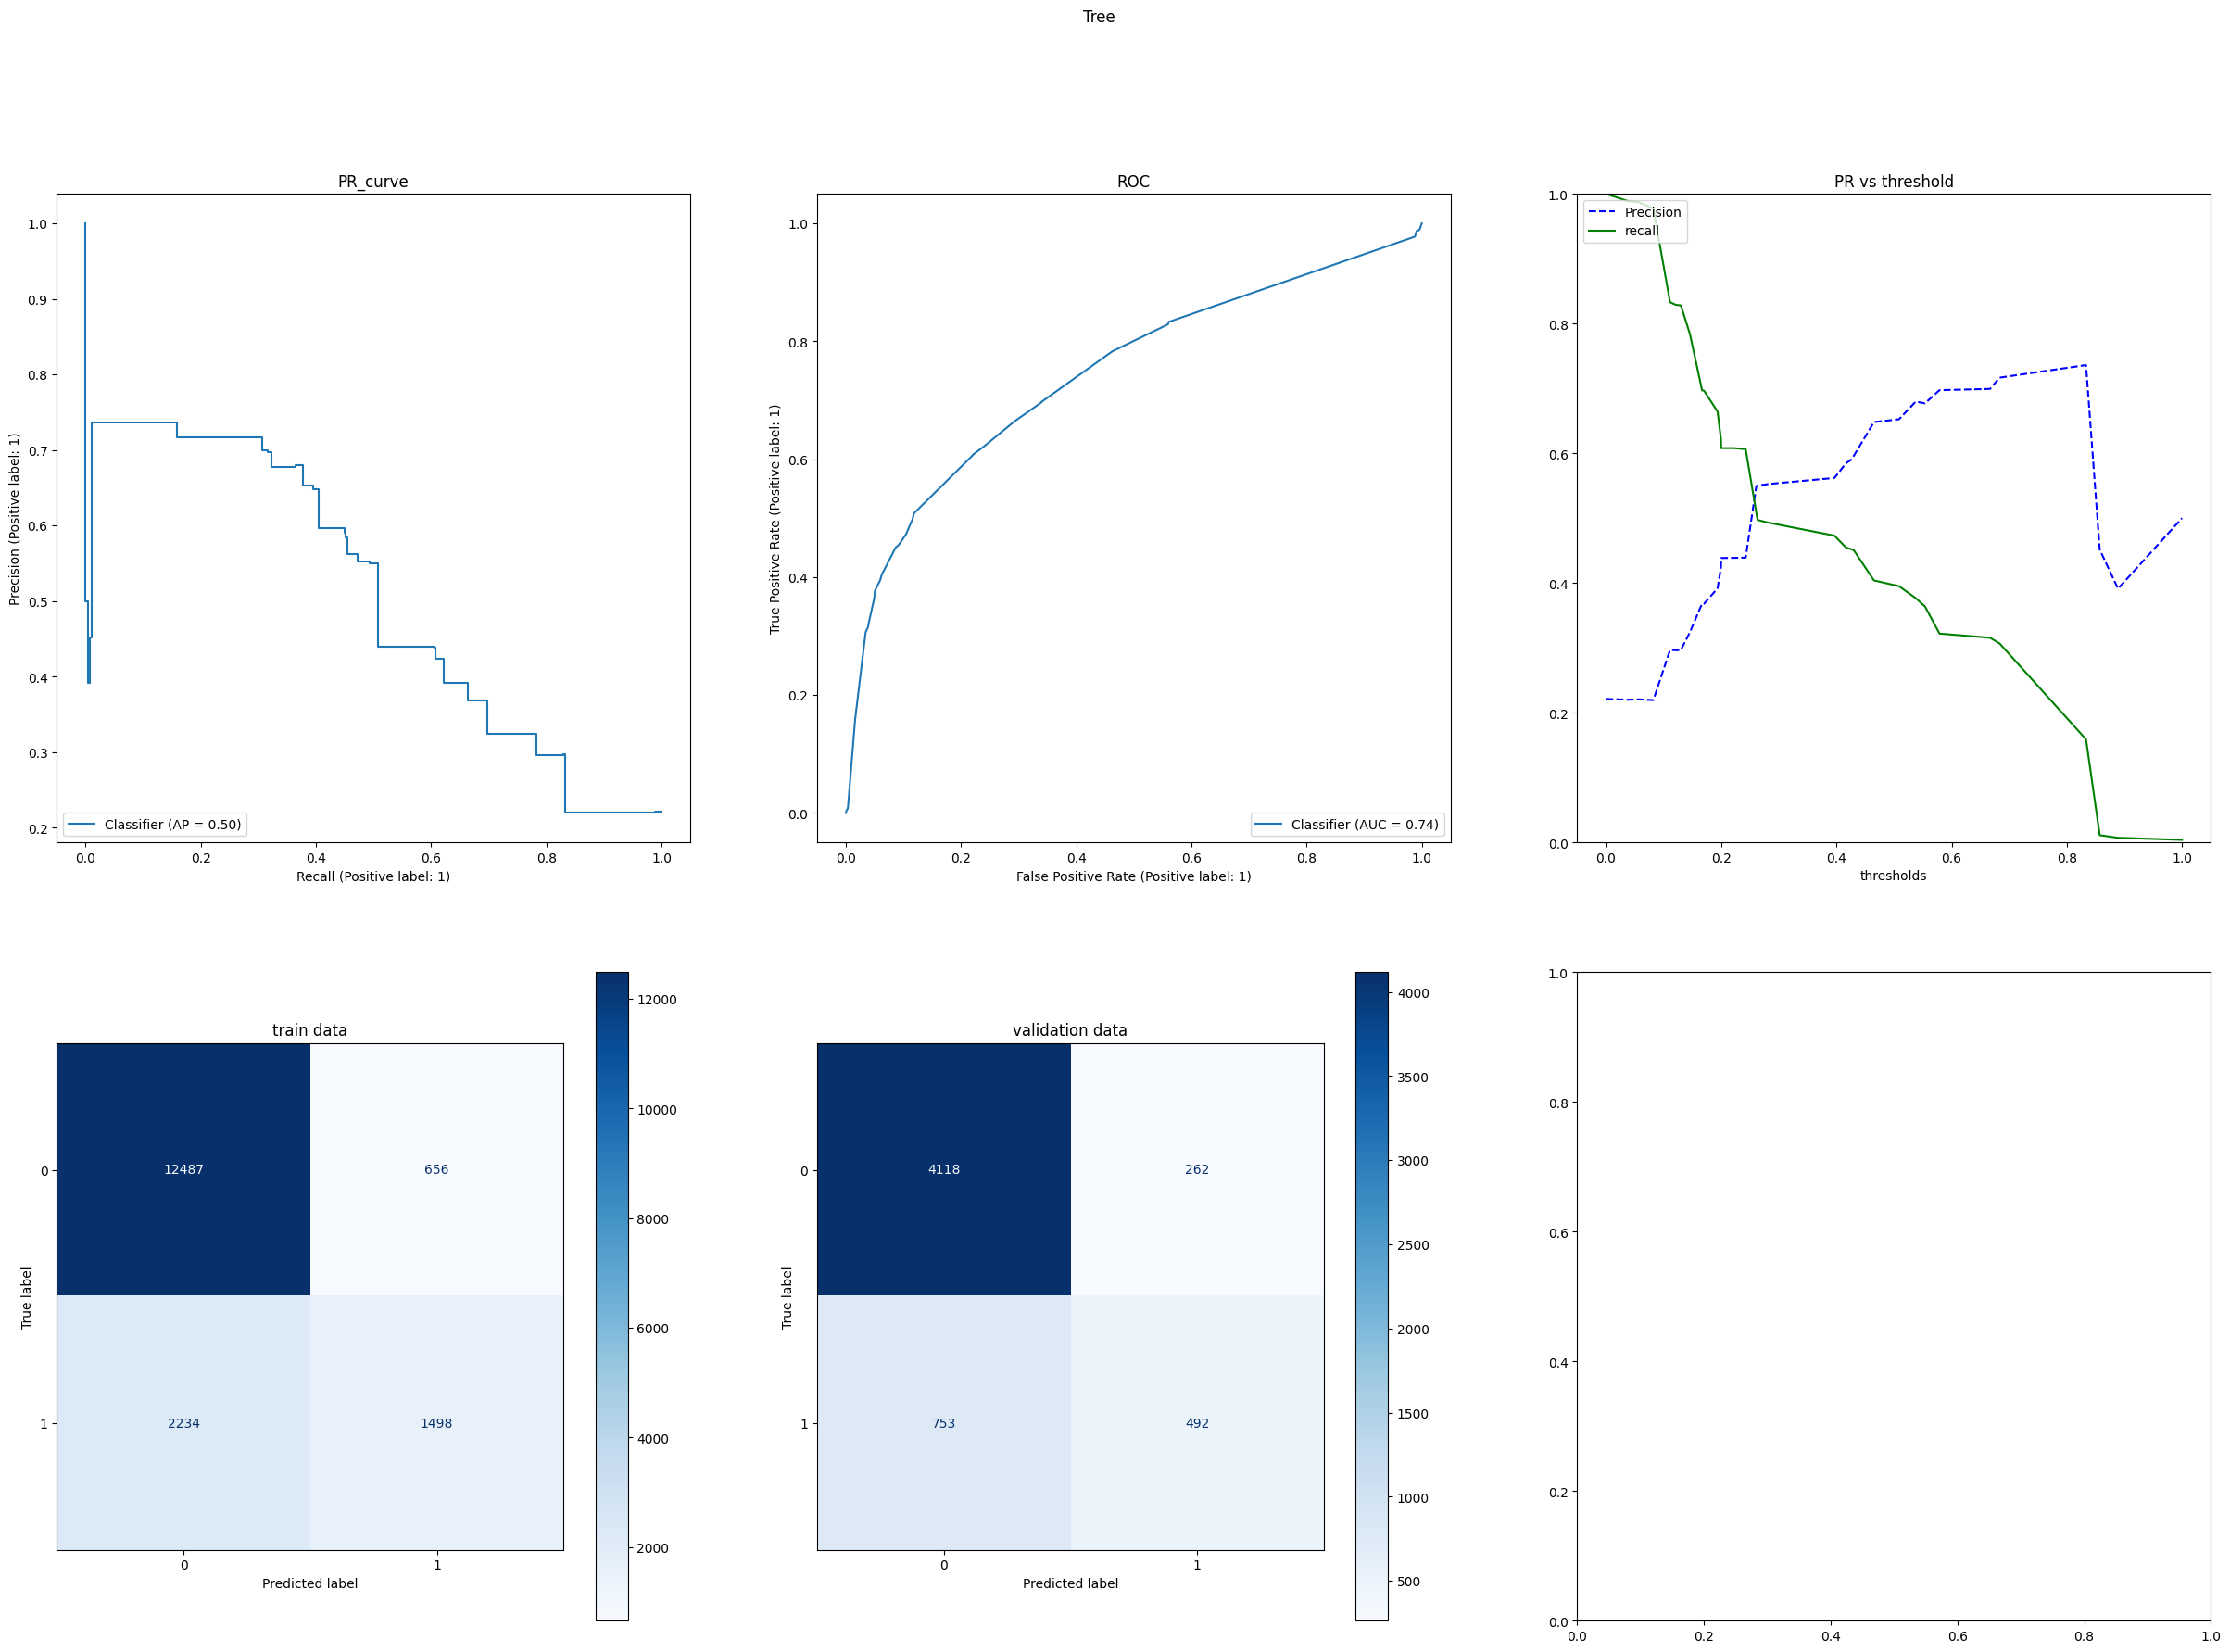

Forest
[[4206  174]
 [ 844  401]]

train scores
accuracy : 0.8253037037037037
precision : 0.7431761786600496
recall : 0.3210075026795284
f1_score: 0.4483532934131736

Val scores
accuracy : 0.8190222222222222
precision : 0.697391304347826
recall : 0.3220883534136546
f1_score: 0.44065934065934065


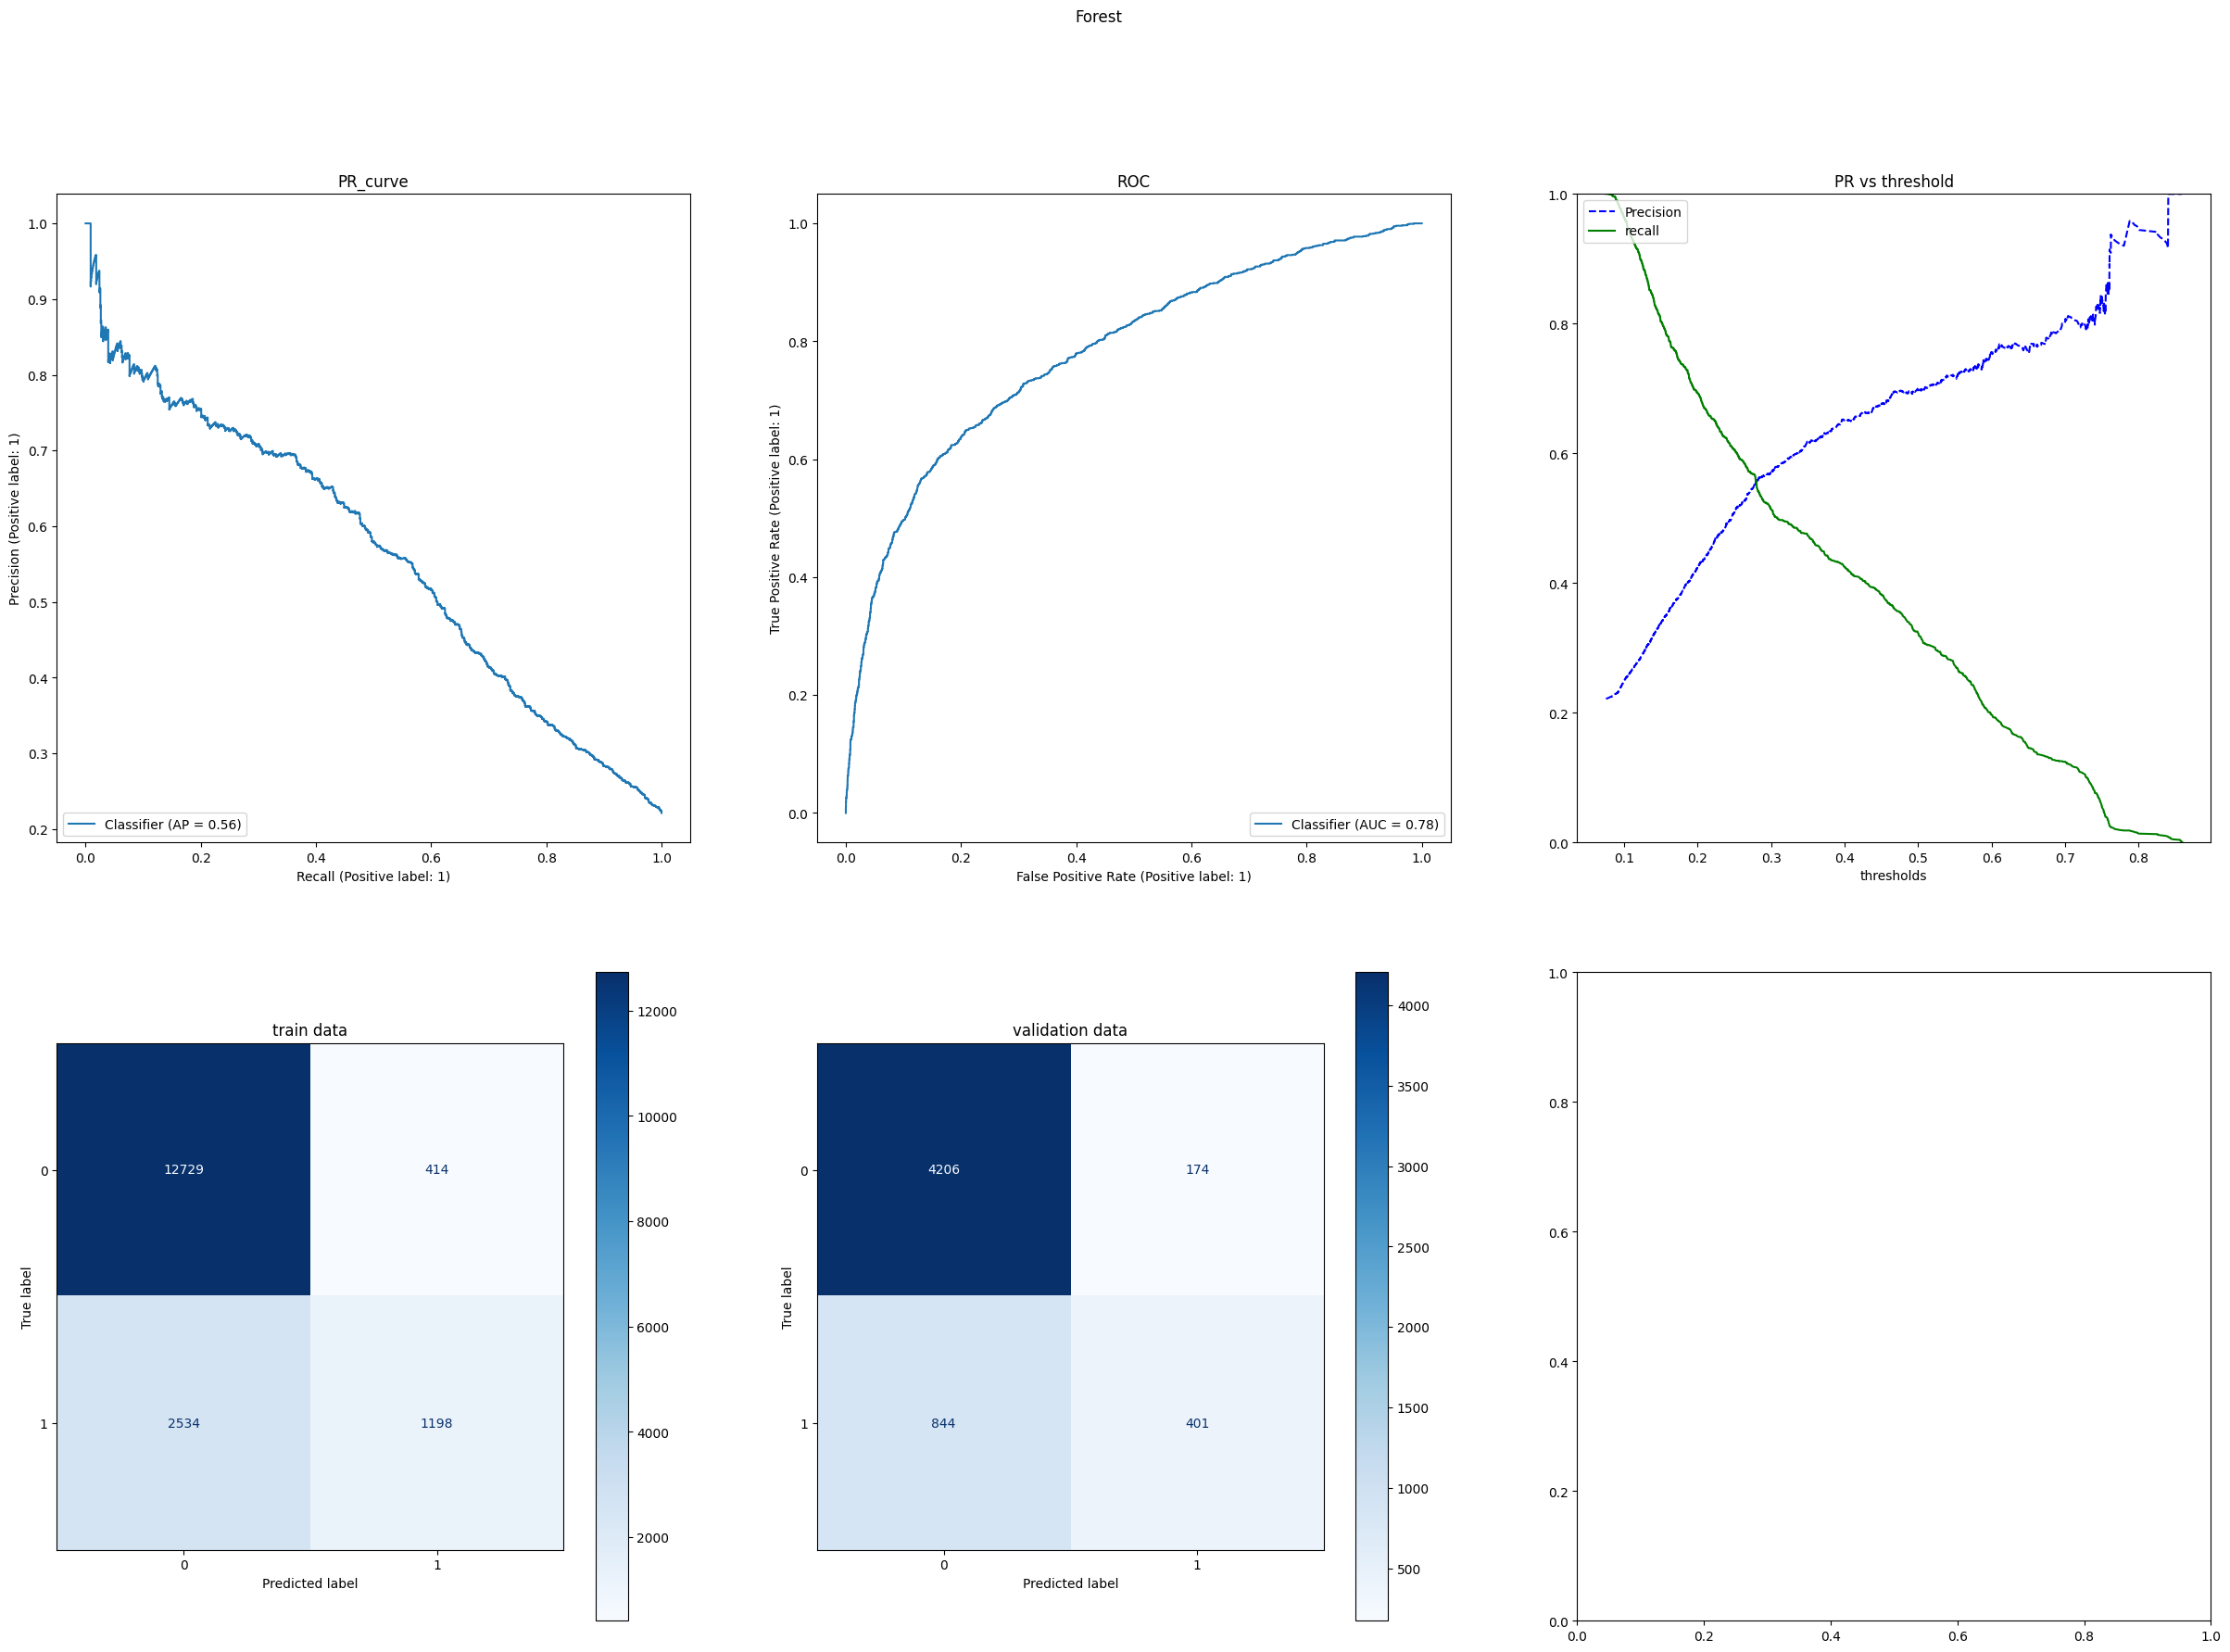

Ada
[[4187  193]
 [ 826  419]]

train scores
accuracy : 0.8199703703703703
precision : 0.696045197740113
recall : 0.33011789924973206
f1_score: 0.4478371501272265

Val scores
accuracy : 0.8188444444444445
precision : 0.684640522875817
recall : 0.3365461847389558
f1_score: 0.4512654819601508


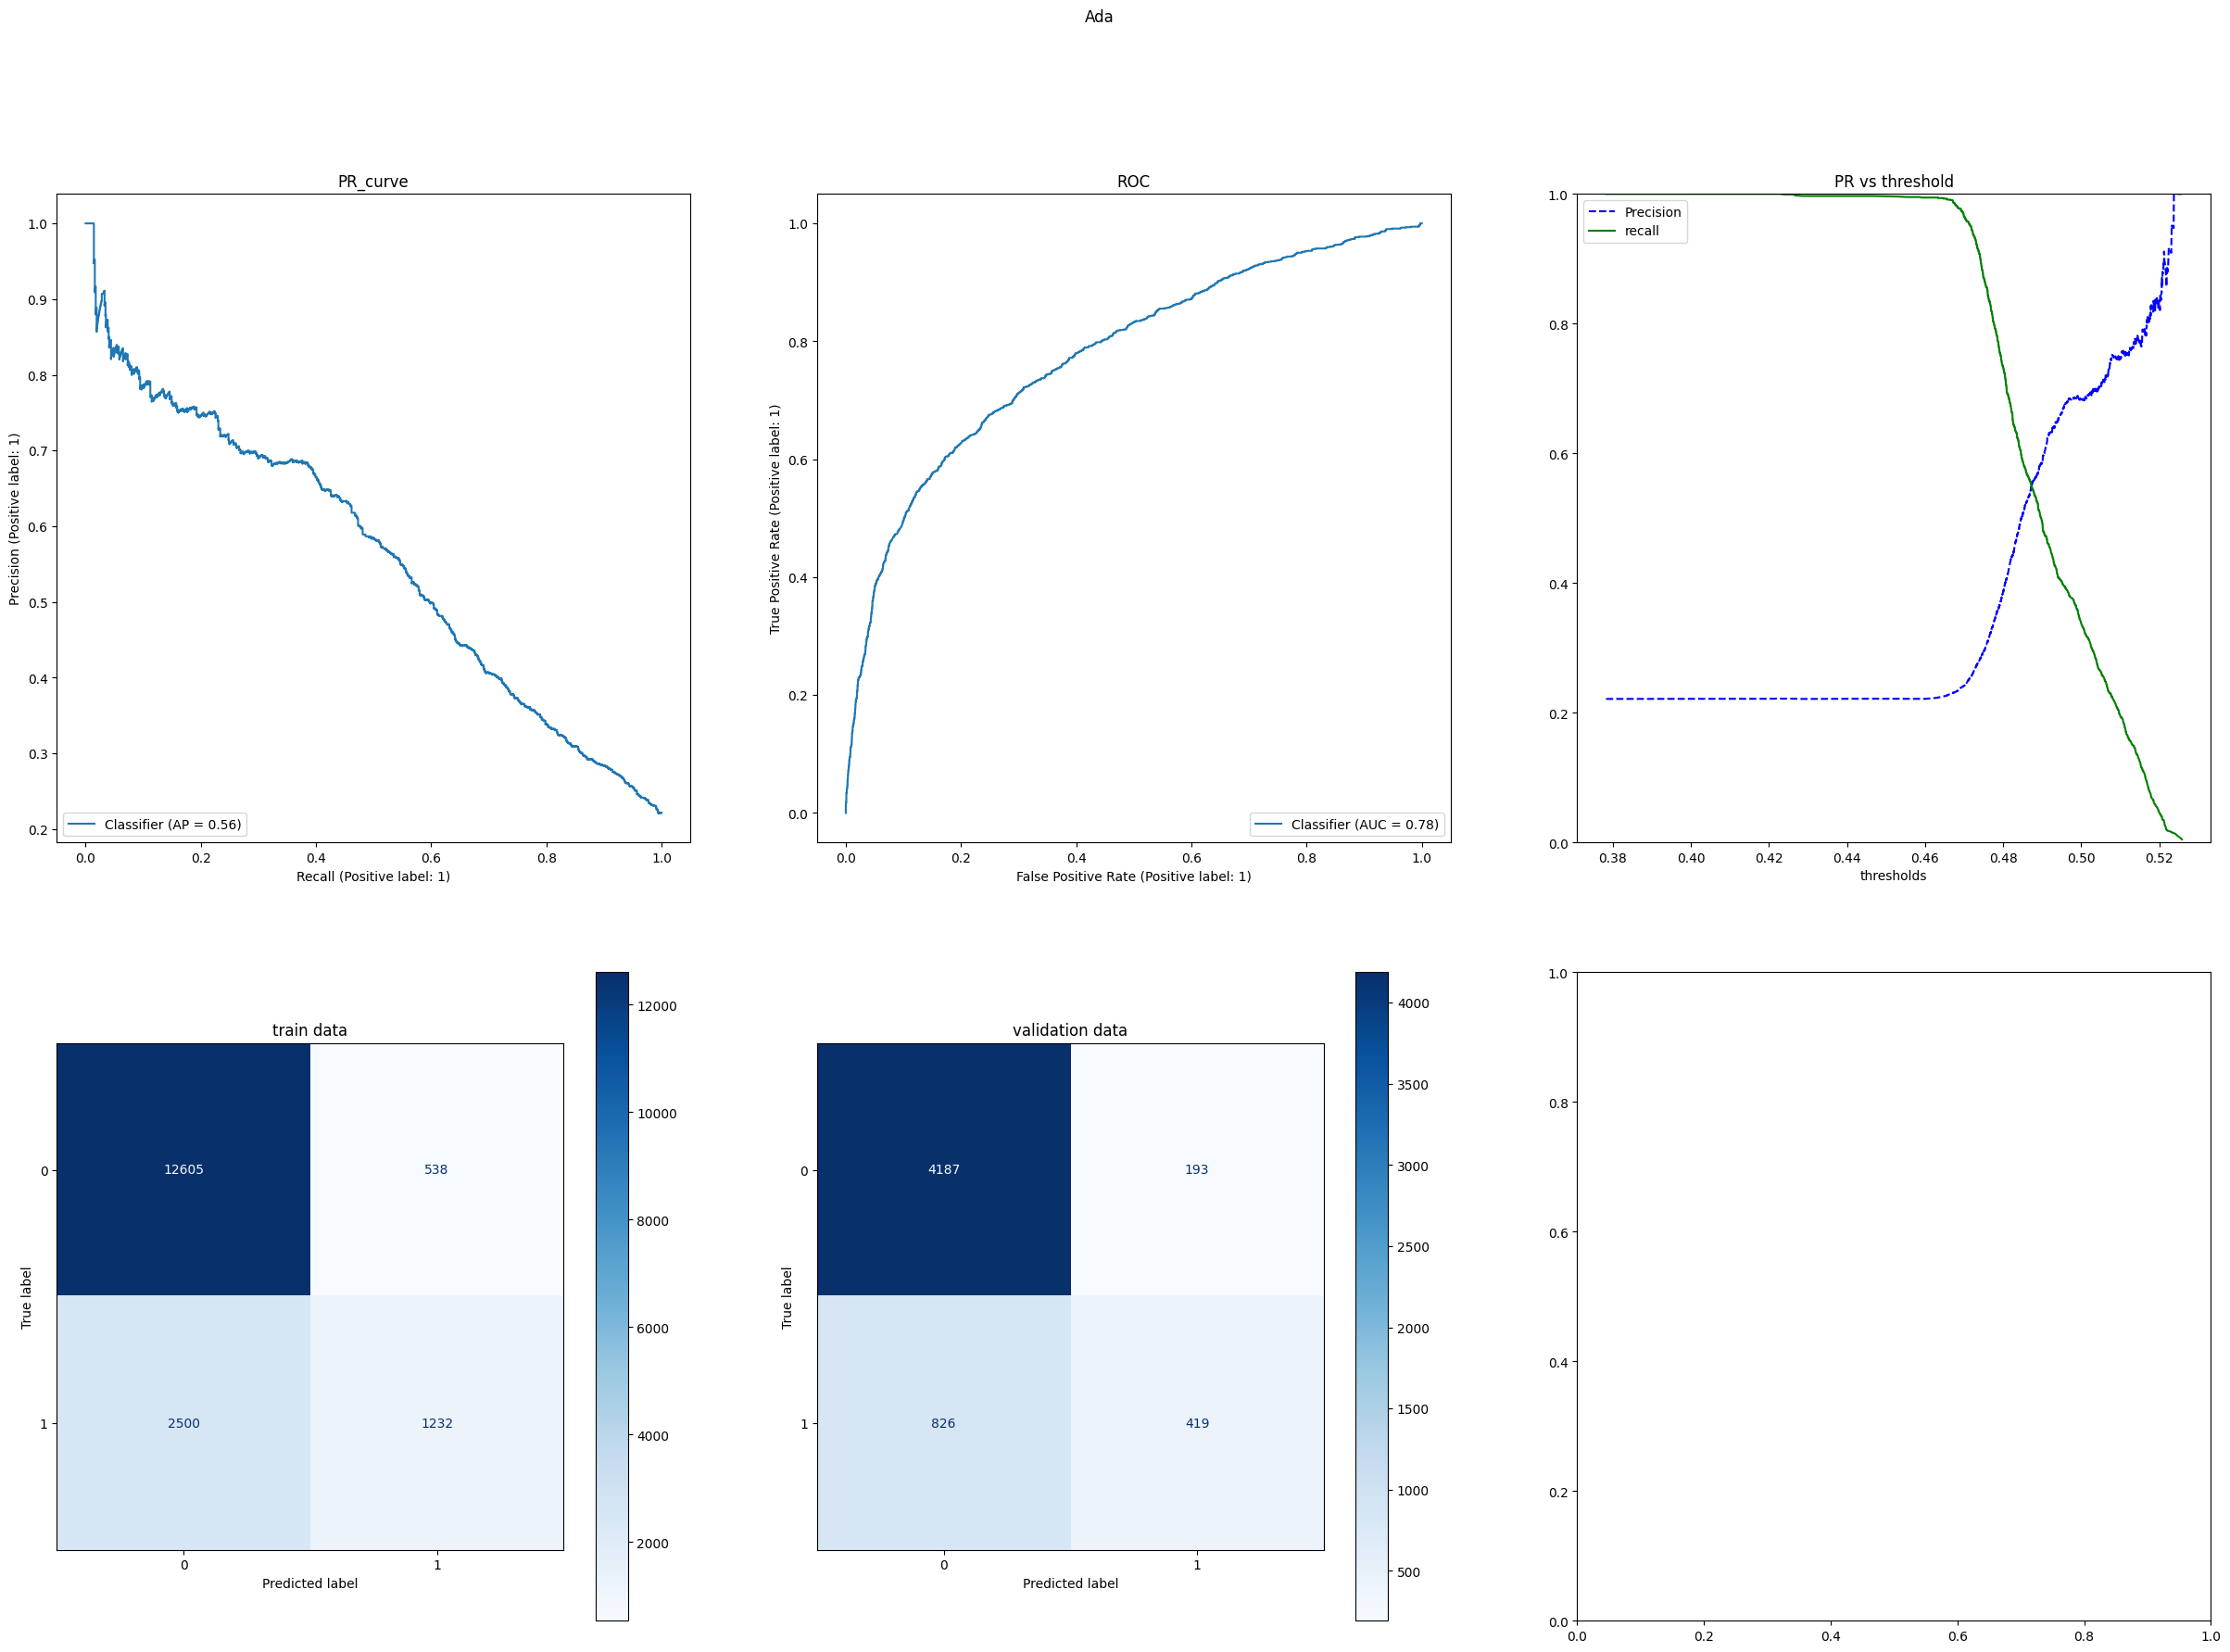

GdBoost
[[4222  158]
 [ 879  366]]

train scores
accuracy : 0.8140444444444445
precision : 0.7115384615384616
recall : 0.26768488745980706
f1_score: 0.389018691588785

Val scores
accuracy : 0.8156444444444444
precision : 0.6984732824427481
recall : 0.29397590361445786
f1_score: 0.41379310344827586


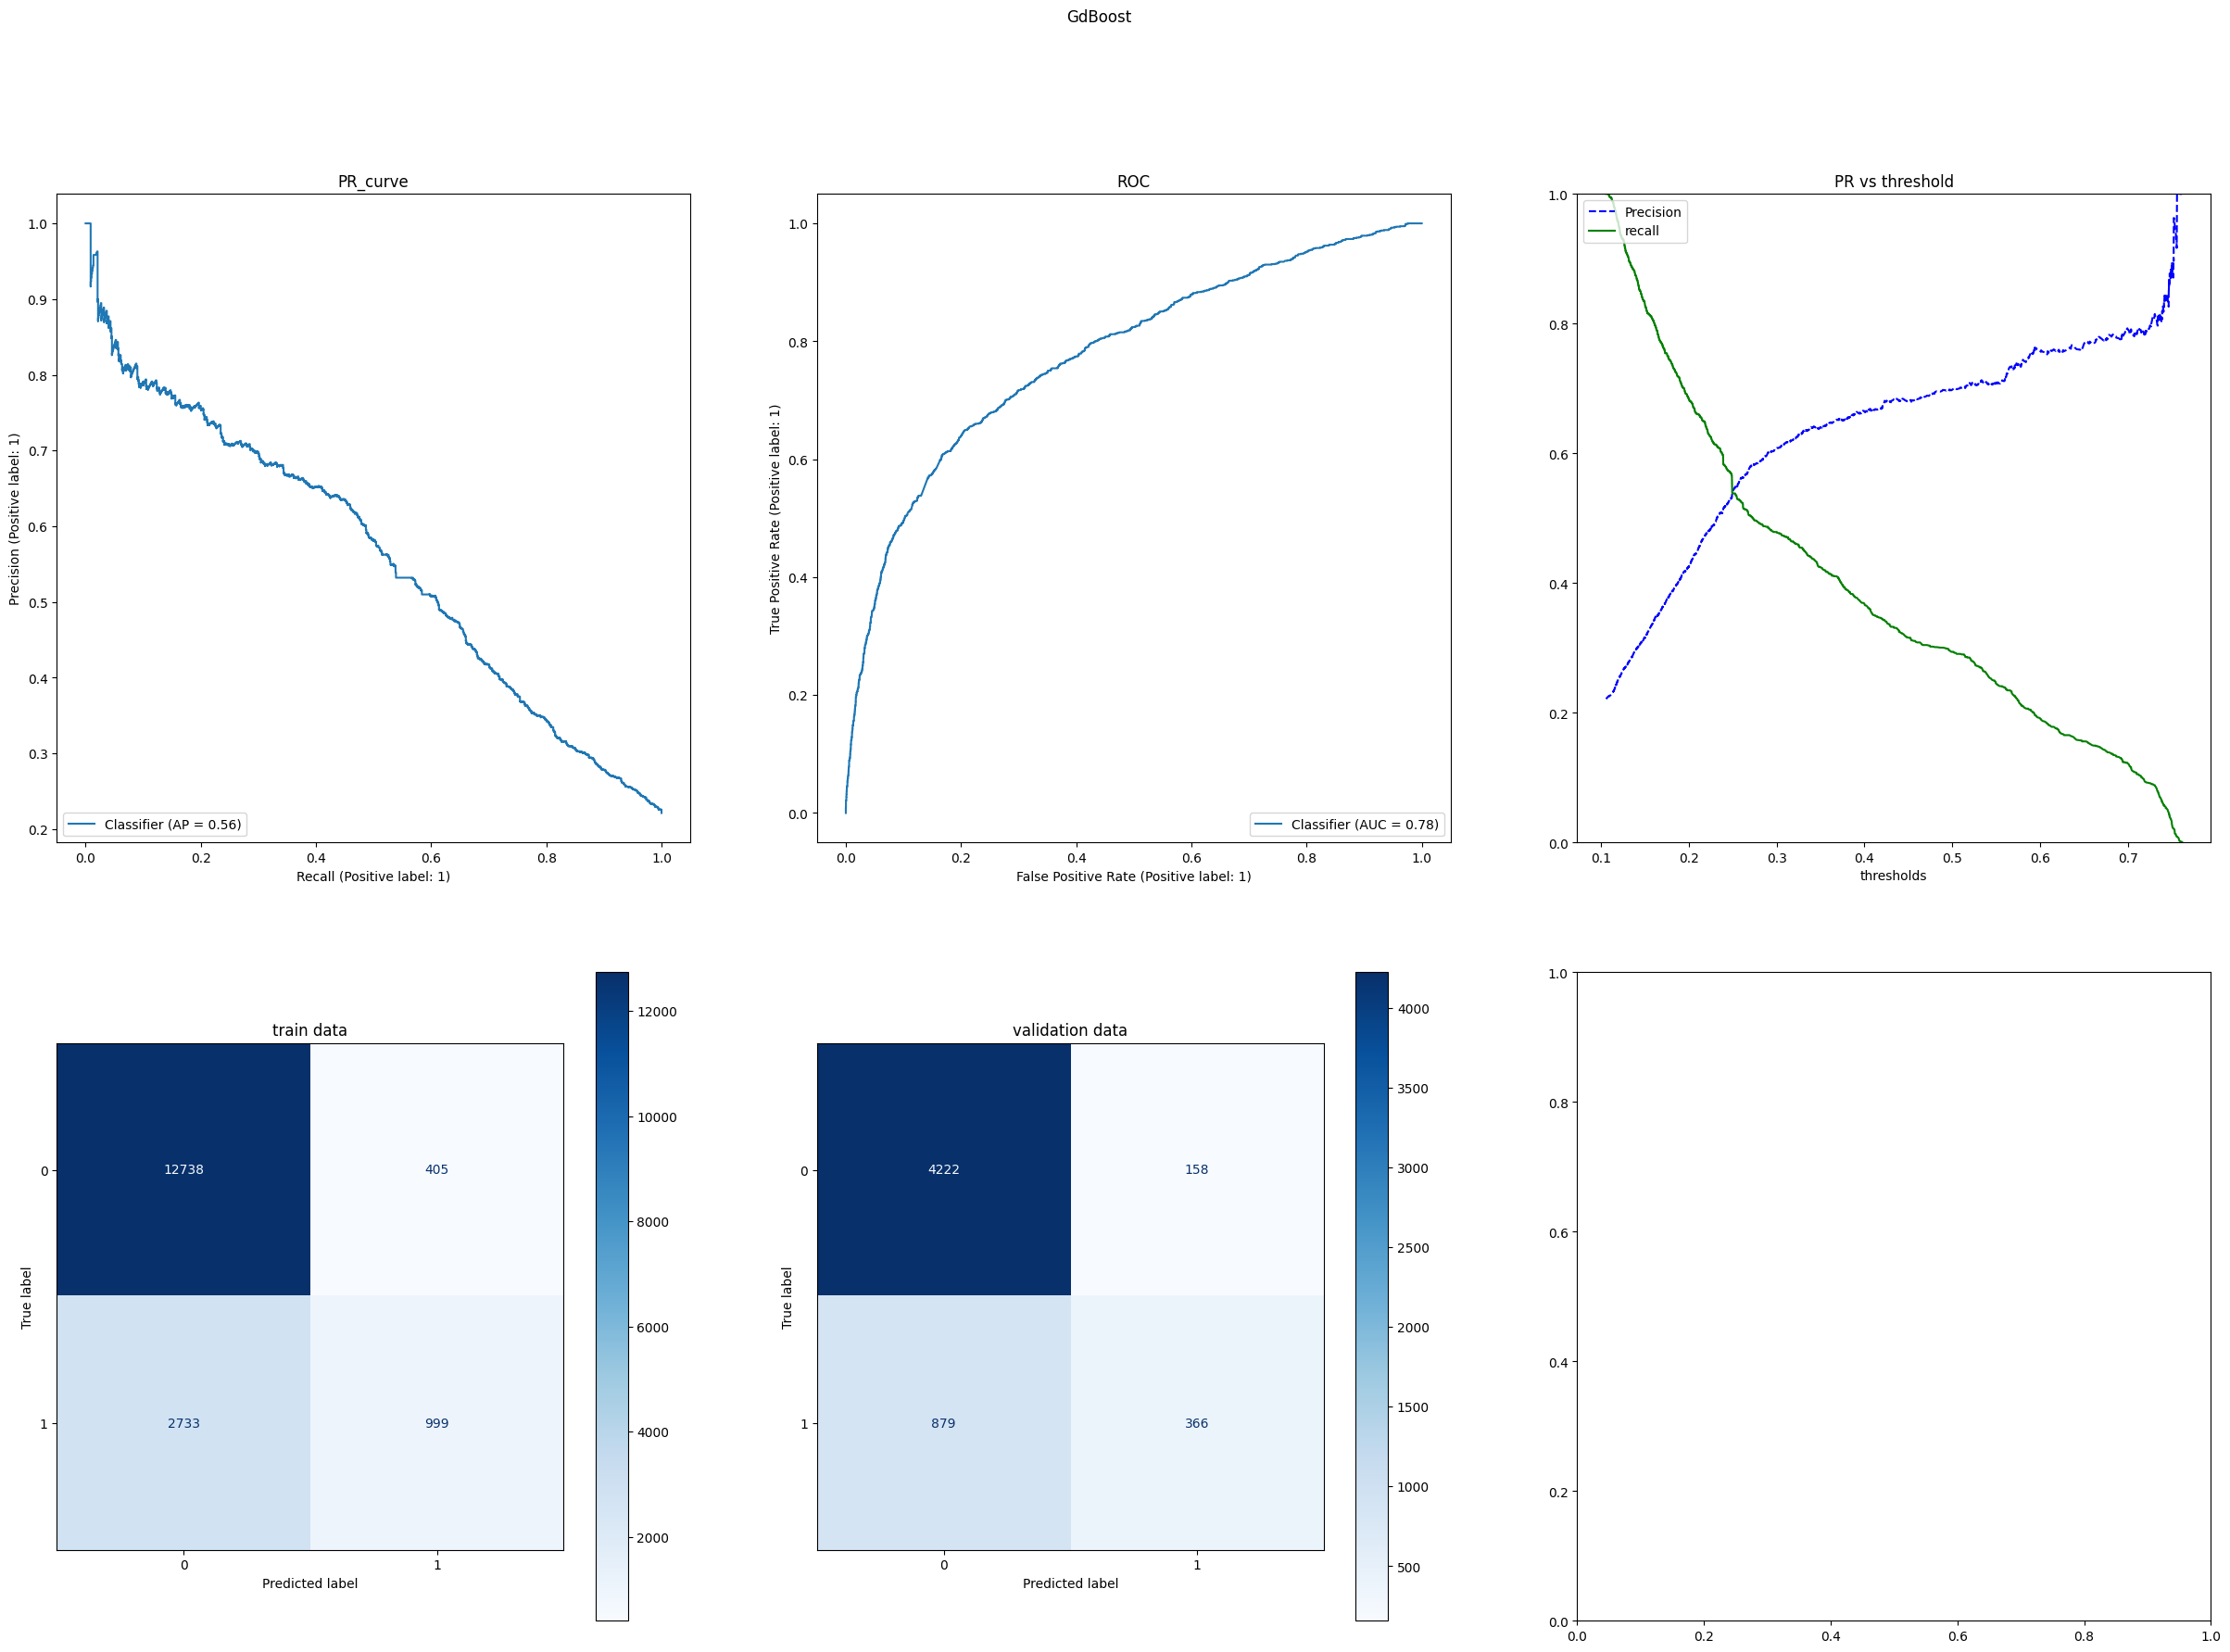

In [18]:

my_base_transform = BasicTransformer(manuel=manuel_ch)
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [19]:
length_5_bop =MyMulPyts(estimator=BOP(window_size=3,
                                    word_size=3,
                                    n_bins=3,
                                    sparse=False,
                                    strategy='uniform'),
                          channel_list=[USAGE,DIFF] )
length_6_bop =MyMulPyts( estimator=BOP(window_size=3,
                                        word_size=3,
                                        sparse=False,
                                        n_bins=3,
                                        strategy='uniform'),
                          channel_list=[D_PAY,])
my_elementary_trans_6 = ElementaryExtractor([D_PAY,])
my_elementary_trans_5 = ElementaryExtractor([USAGE,DIFF])


extractors = [NonTsPass(),
               length_5_bop,
                length_6_bop,
                my_elementary_trans_5,
                my_elementary_trans_6]
#extractors = [my_elementary_trans_5,my_elementary_trans_6]
extractor = make_union(*extractors)
extractor
A = my_base_transform.fit_transform(X_train)

In [20]:
manuel_ch =['LIMIT_BAL', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
     'USAGE_1',
       'USAGE_2', 'USAGE_3', 'USAGE_4', 'USAGE_5',
       'DIFF_0', 'DIFF_1', 'DIFF_2', 'DIFF_3', 'DIFF_4']

In [21]:
case_name = 'non_log,raw,reg'

print(case_name)

non_log,raw,reg


Tree
[[4118  262]
 [ 753  492]]

train scores
accuracy : 0.8287407407407408
precision : 0.6954503249767874
recall : 0.40139335476956056
f1_score: 0.5090044172612981

Val scores
accuracy : 0.8195555555555556
precision : 0.6525198938992043
recall : 0.39518072289156625
f1_score: 0.49224612306153076


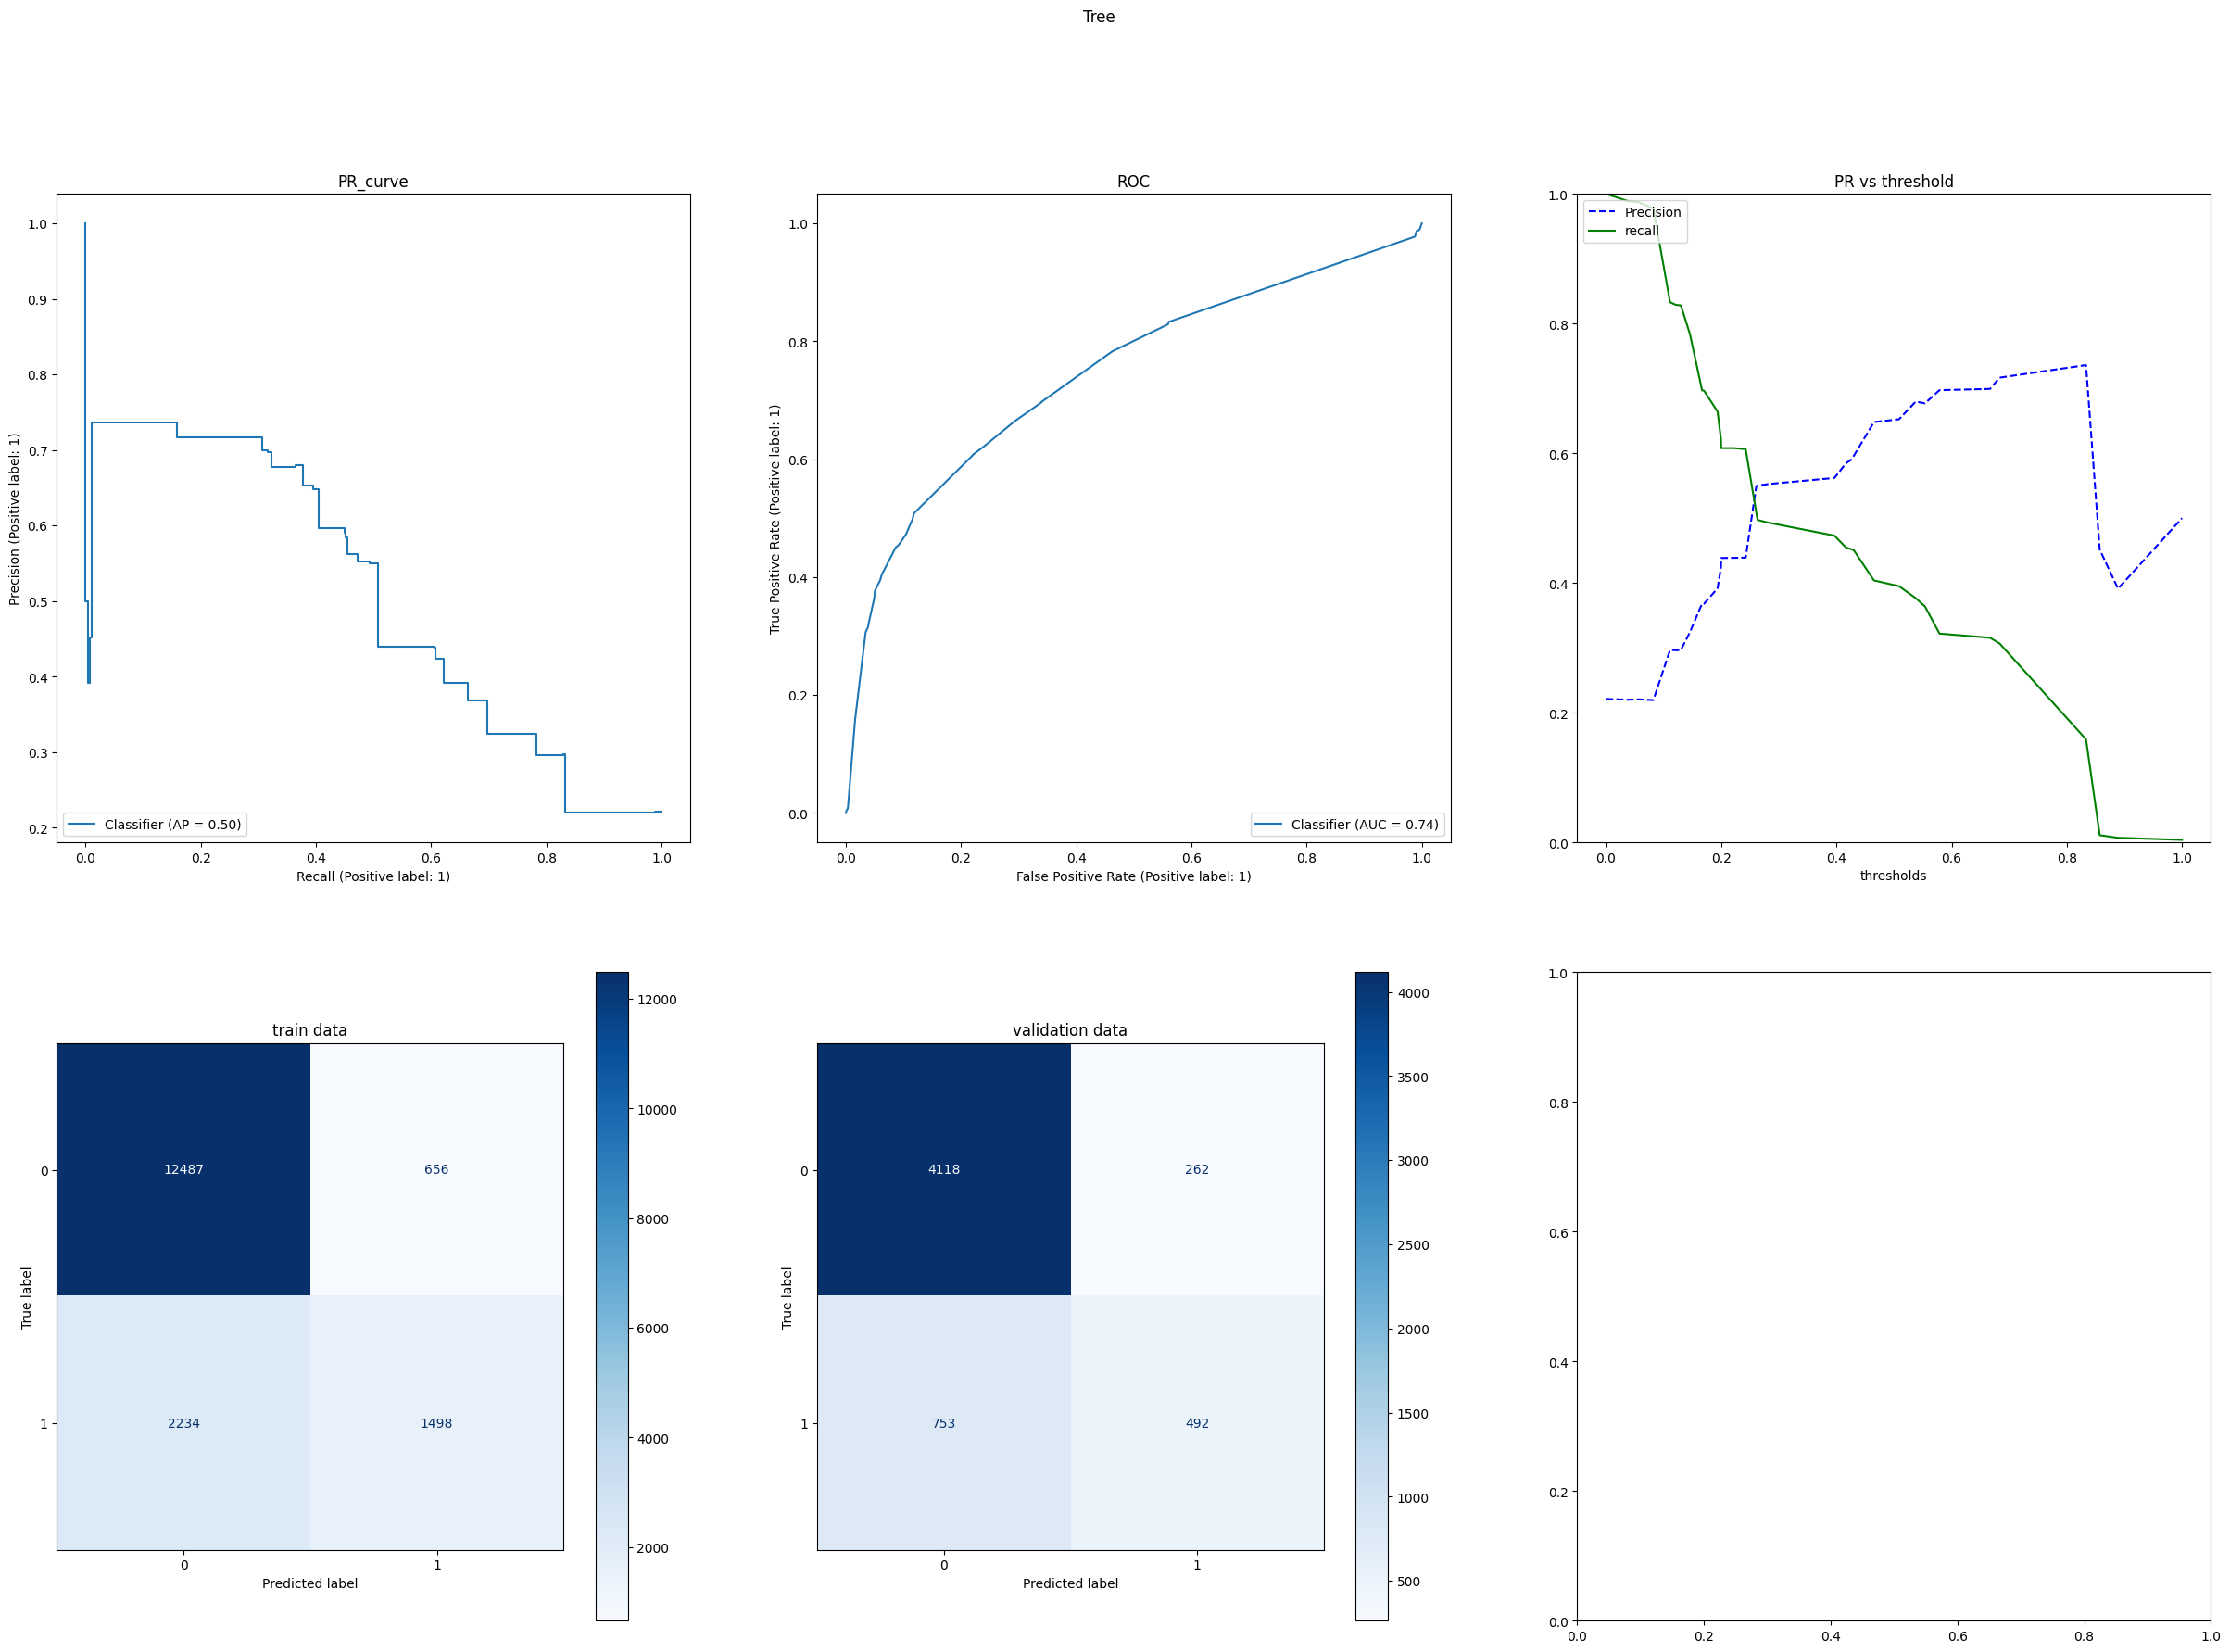

Forest
[[4206  174]
 [ 844  401]]

train scores
accuracy : 0.8253037037037037
precision : 0.7431761786600496
recall : 0.3210075026795284
f1_score: 0.4483532934131736

Val scores
accuracy : 0.8190222222222222
precision : 0.697391304347826
recall : 0.3220883534136546
f1_score: 0.44065934065934065


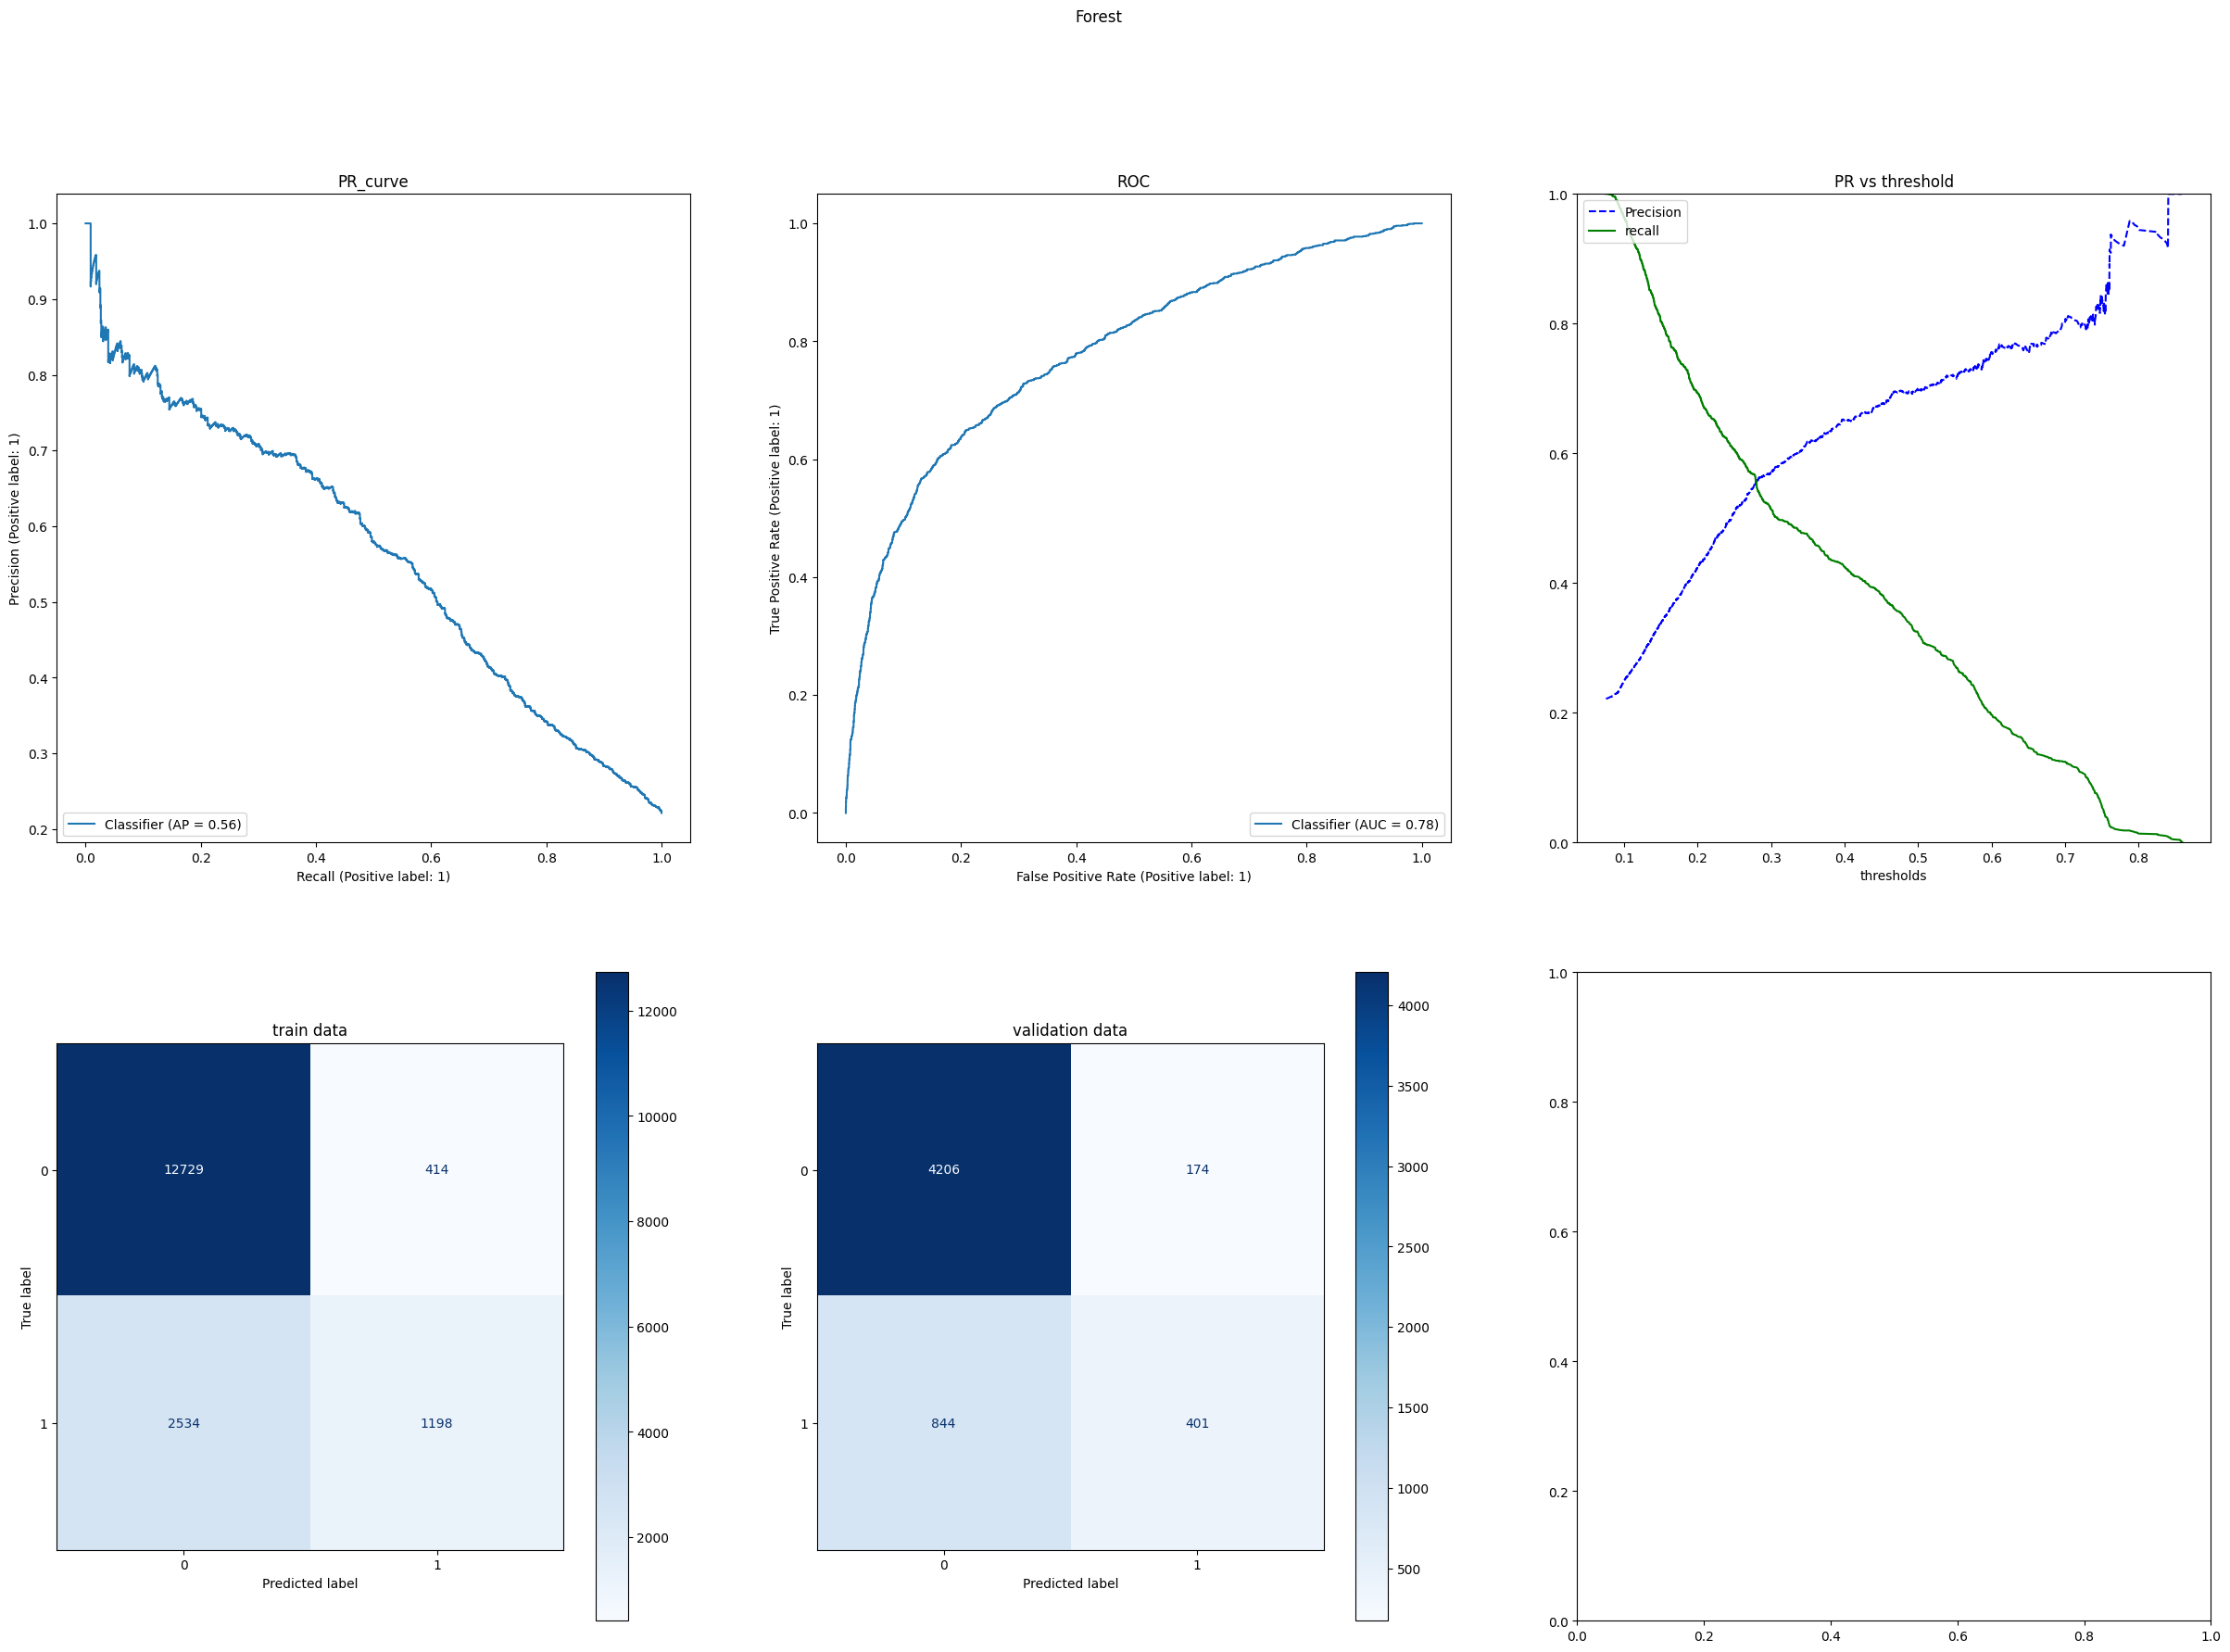

Ada
[[4187  193]
 [ 826  419]]

train scores
accuracy : 0.8199703703703703
precision : 0.696045197740113
recall : 0.33011789924973206
f1_score: 0.4478371501272265

Val scores
accuracy : 0.8188444444444445
precision : 0.684640522875817
recall : 0.3365461847389558
f1_score: 0.4512654819601508


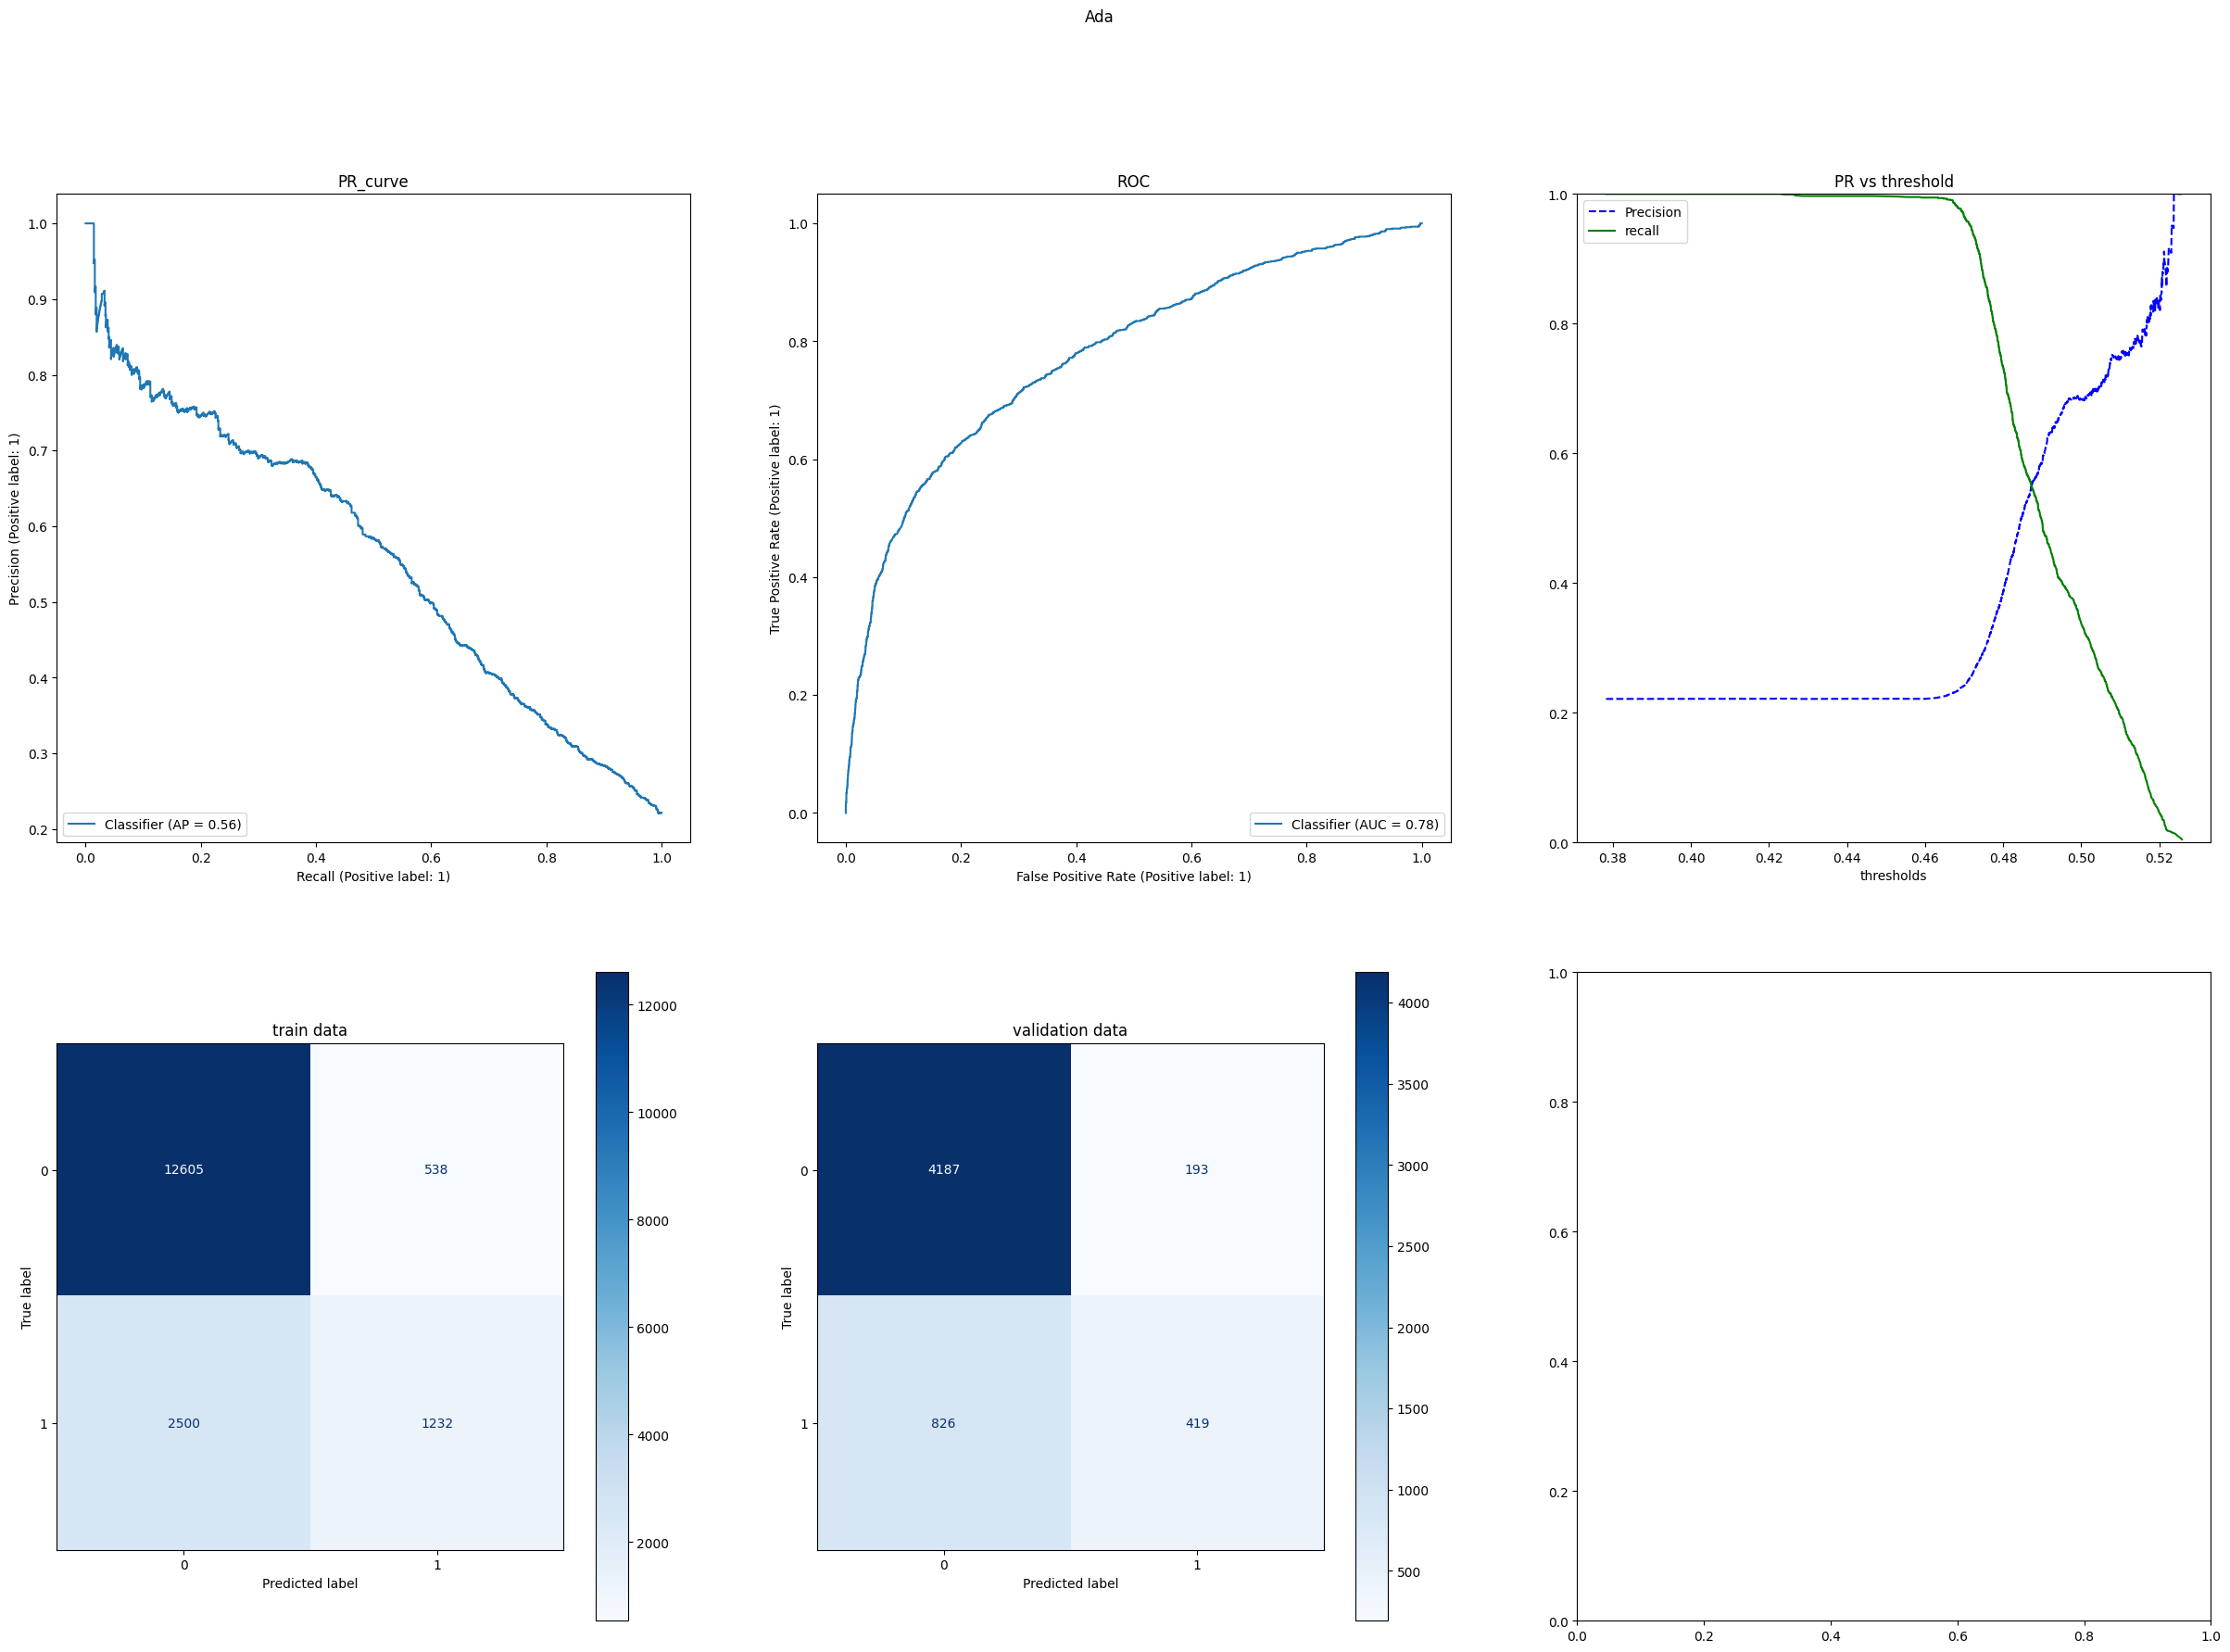

GdBoost
[[4222  158]
 [ 879  366]]

train scores
accuracy : 0.8140444444444445
precision : 0.7115384615384616
recall : 0.26768488745980706
f1_score: 0.389018691588785

Val scores
accuracy : 0.8156444444444444
precision : 0.6984732824427481
recall : 0.29397590361445786
f1_score: 0.41379310344827586


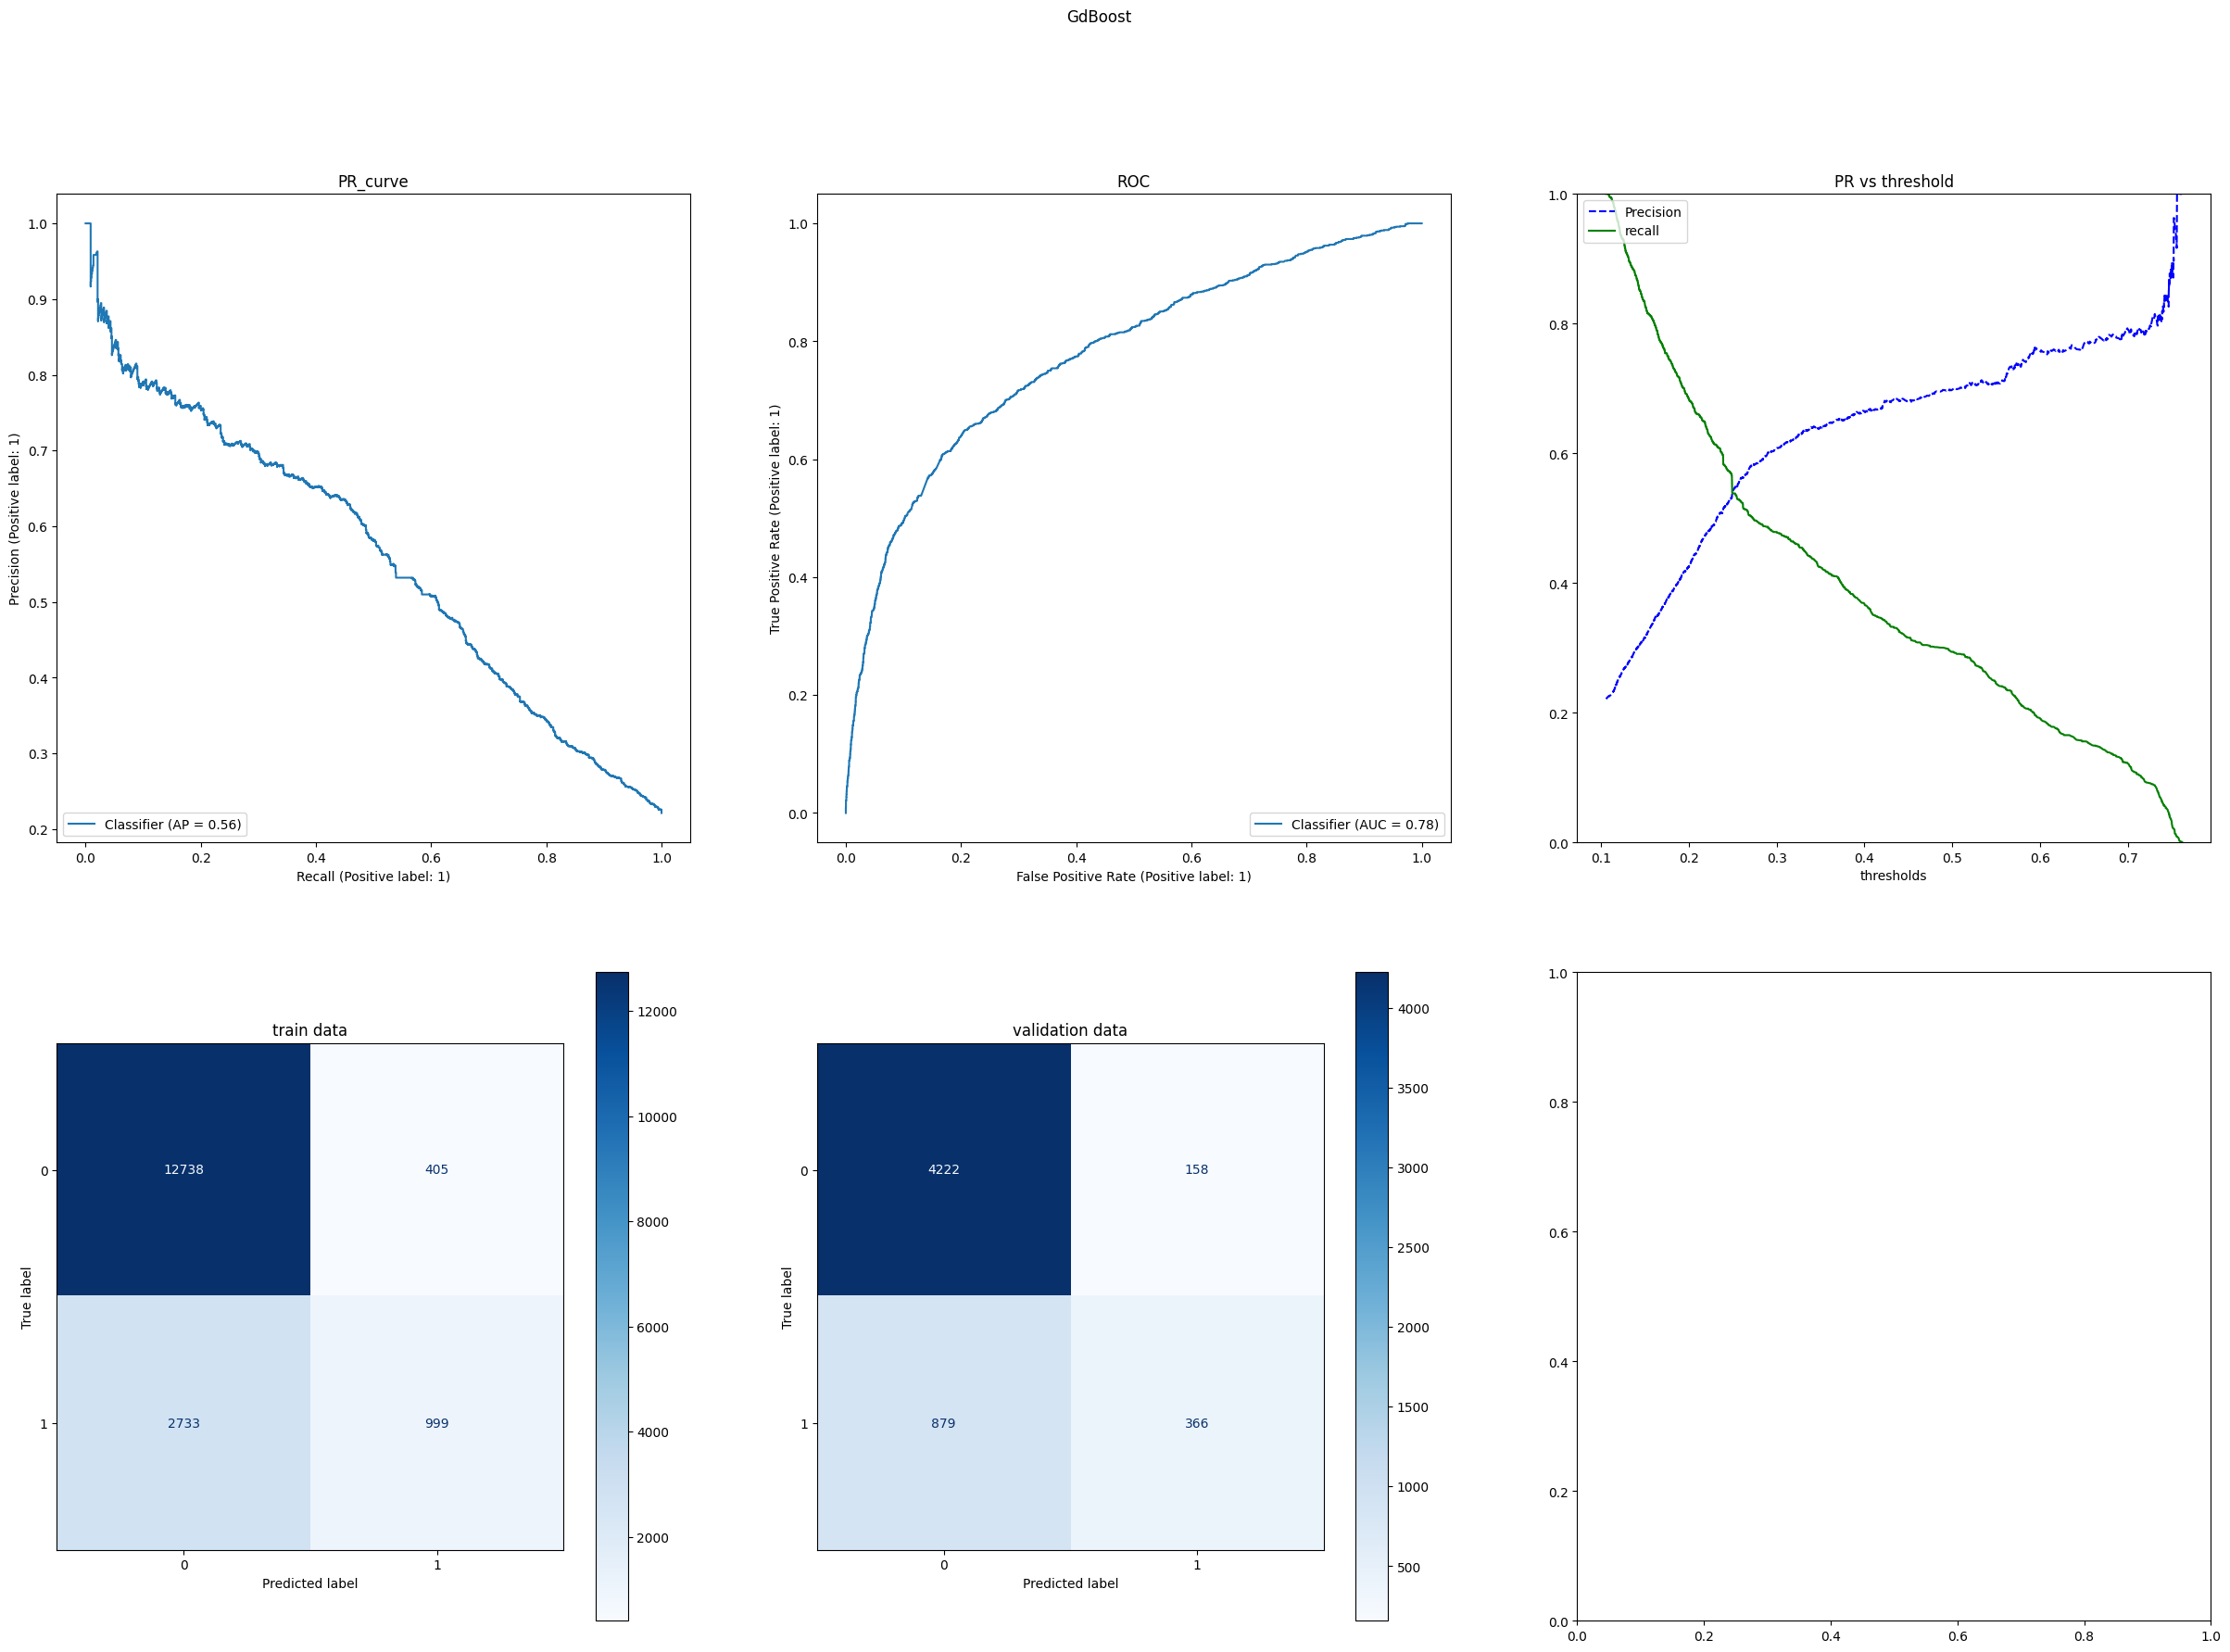

In [22]:

my_base_transform = BasicTransformer(manuel=manuel_ch)
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                # ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

In [23]:
case_name = 'non_log,t_series,reg'

print(case_name)

non_log,t_series,reg


Tree
[[4134  246]
 [ 800  445]]

train scores
accuracy : 0.8276148148148148
precision : 0.7104859335038363
recall : 0.3721864951768489
f1_score: 0.4884825039563917

Val scores
accuracy : 0.8140444444444445
precision : 0.6439942112879884
recall : 0.357429718875502
f1_score: 0.4597107438016529


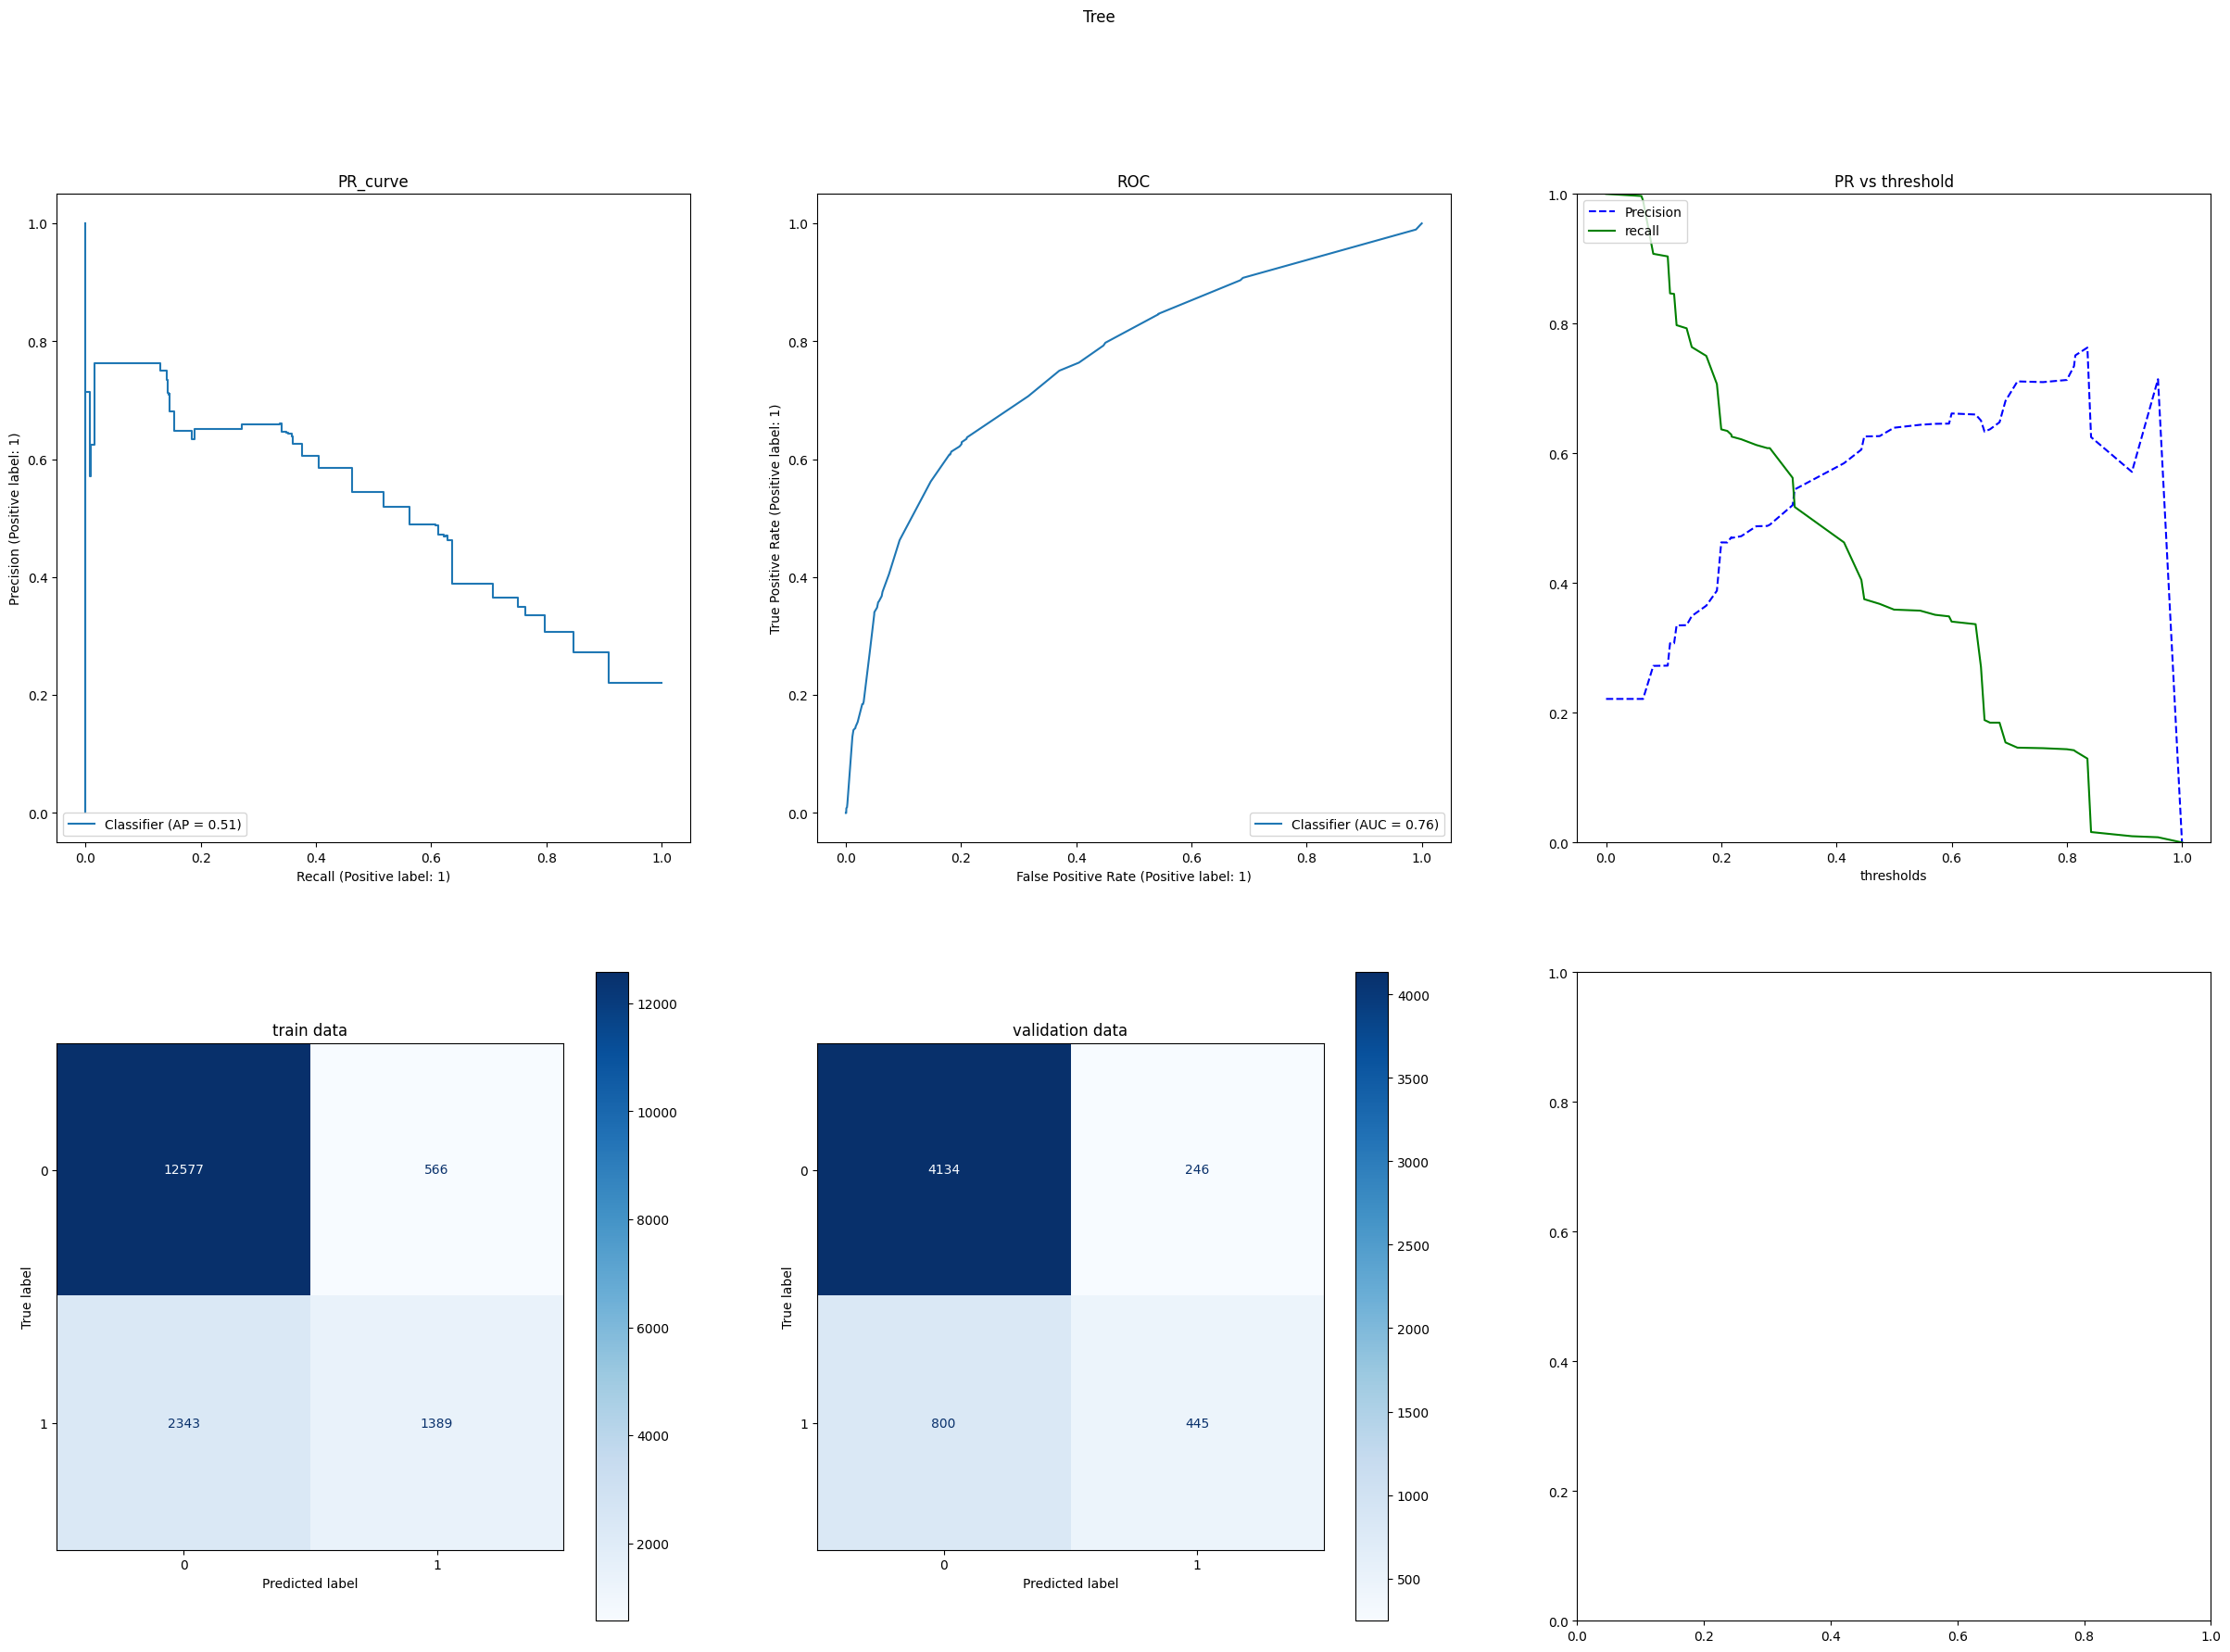

Forest
[[4198  182]
 [ 860  385]]

train scores
accuracy : 0.8190814814814815
precision : 0.7115264797507788
recall : 0.3060021436227224
f1_score: 0.42795578040097426

Val scores
accuracy : 0.8147555555555556
precision : 0.6790123456790124
recall : 0.3092369477911647
f1_score: 0.4249448123620309


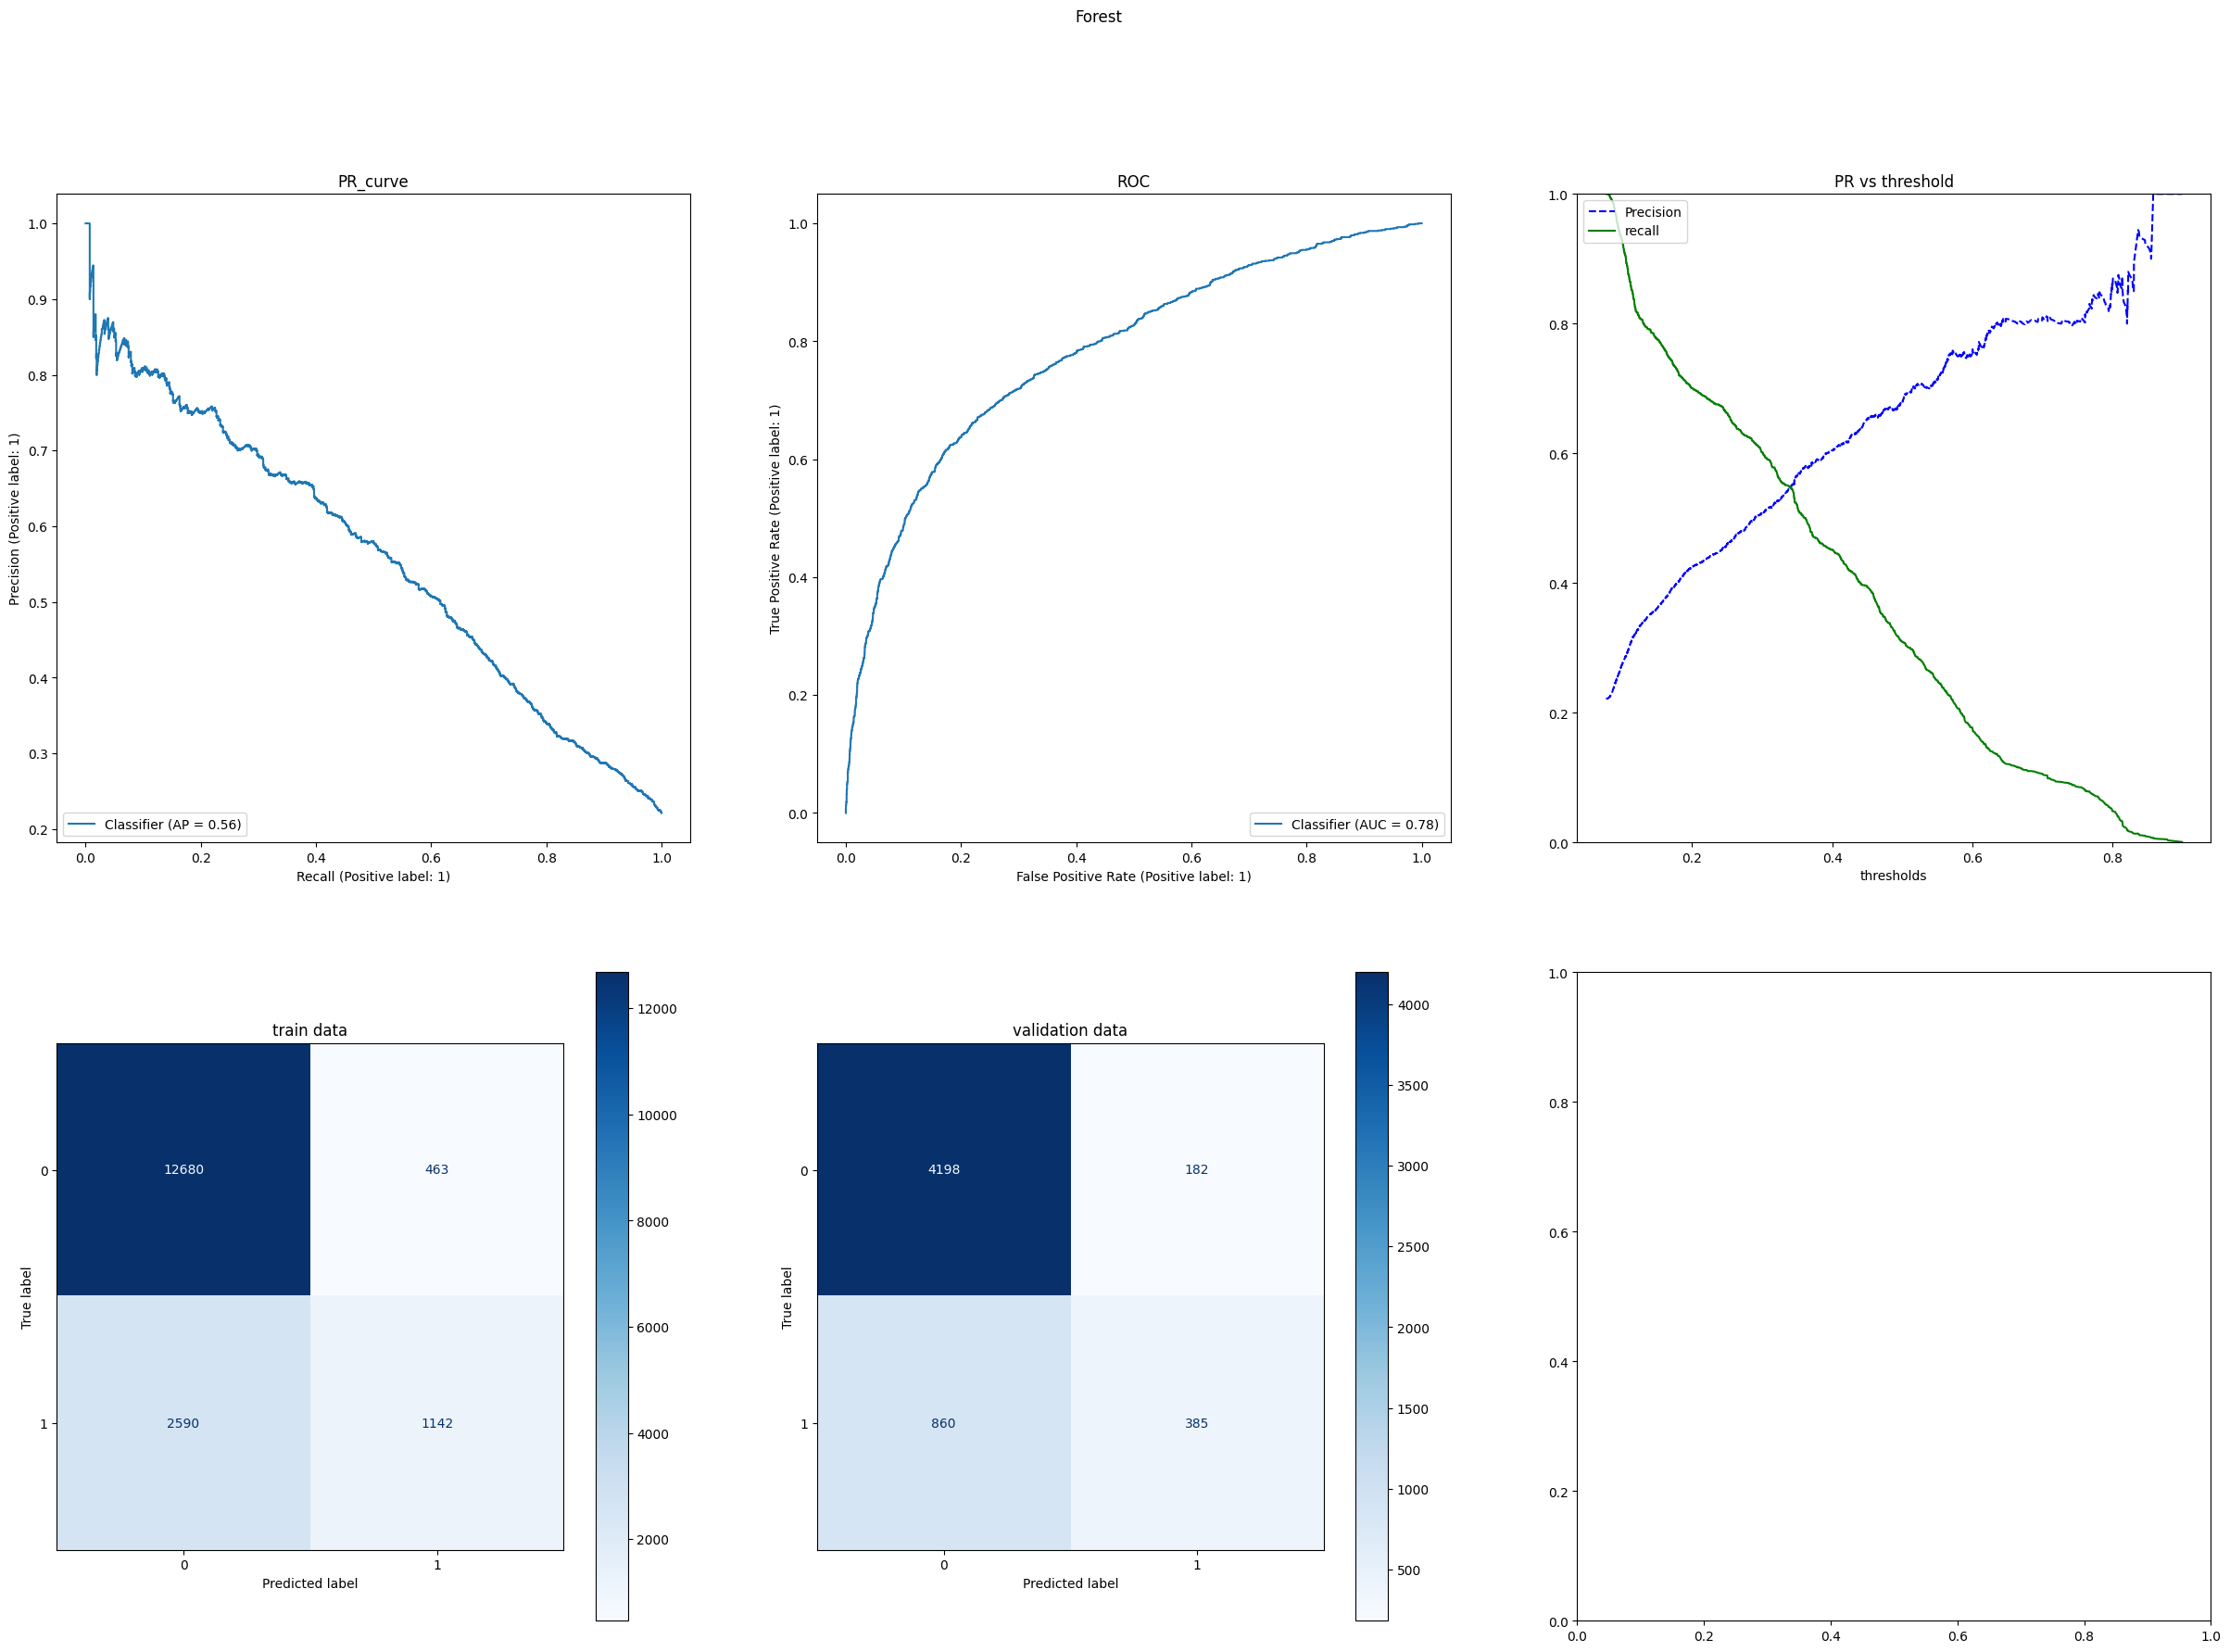

Ada
[[4193  187]
 [ 867  378]]

train scores
accuracy : 0.8099555555555555
precision : 0.6641651031894934
recall : 0.2845659163987138
f1_score: 0.39842431063590317

Val scores
accuracy : 0.8126222222222222
precision : 0.6690265486725664
recall : 0.3036144578313253
f1_score: 0.4176795580110497


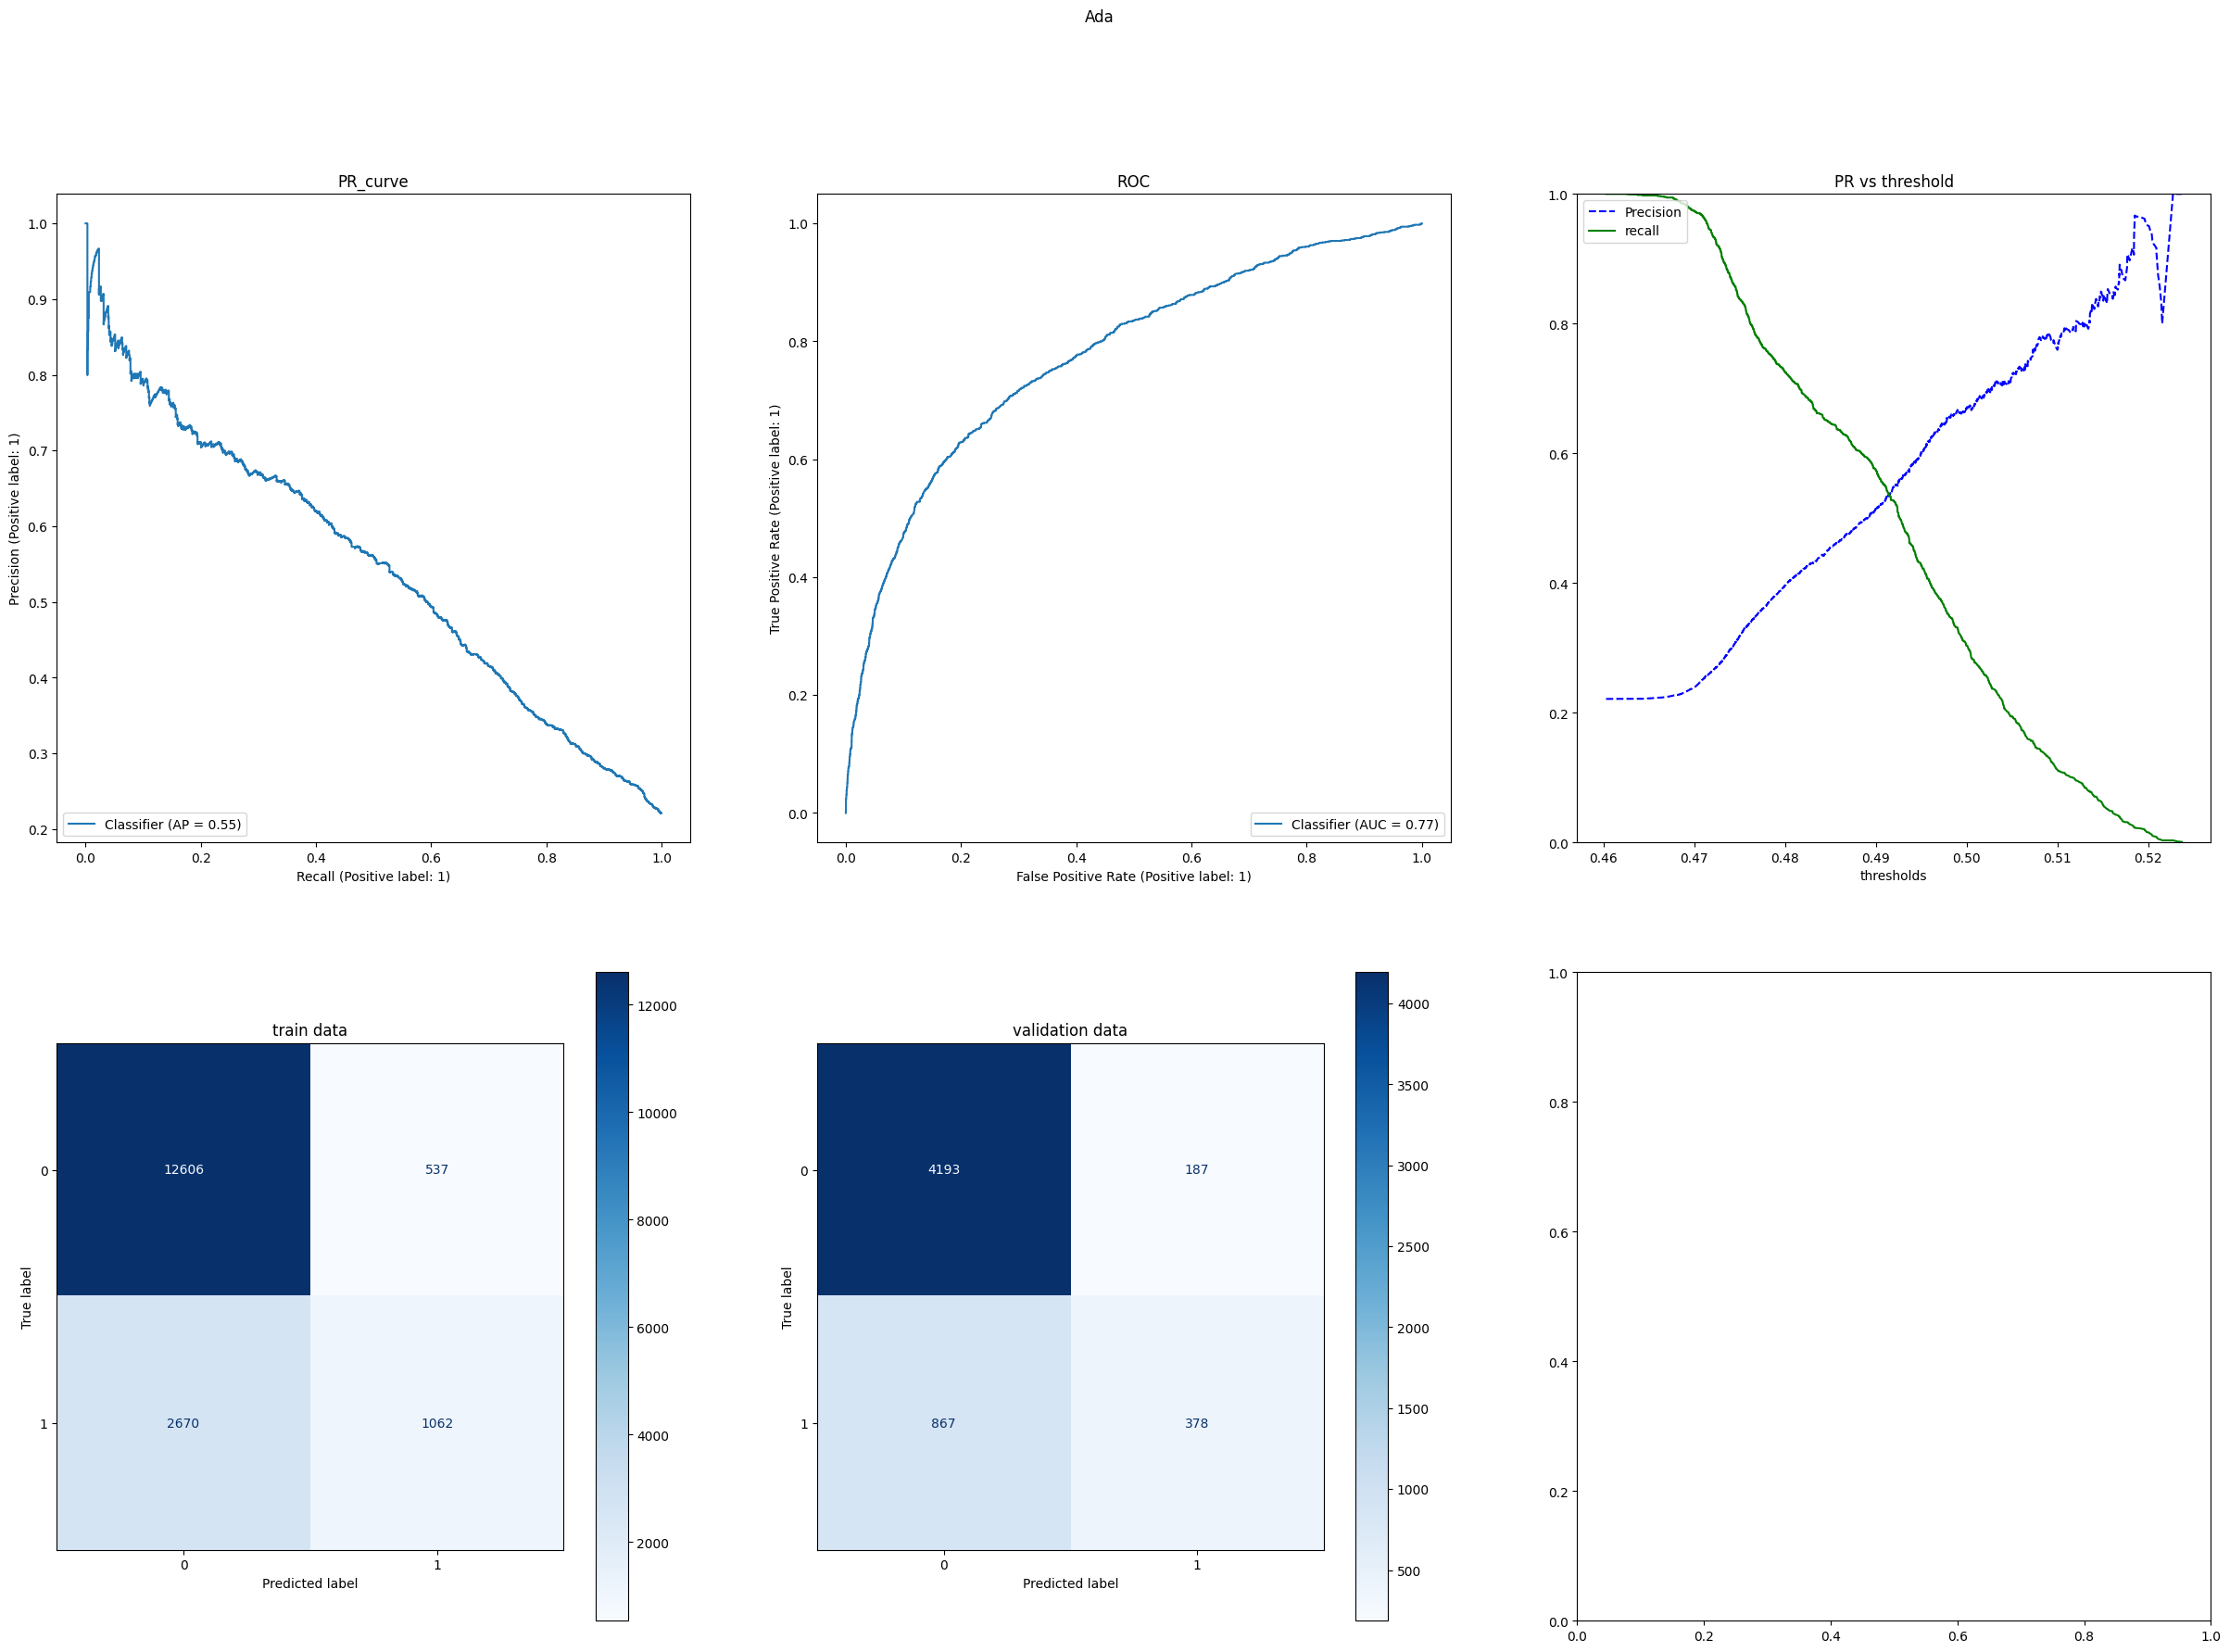

GdBoost
[[4222  158]
 [ 897  348]]

train scores
accuracy : 0.8069925925925926
precision : 0.6722262509064539
recall : 0.24839228295819935
f1_score: 0.36274701623948347

Val scores
accuracy : 0.8124444444444444
precision : 0.6877470355731226
recall : 0.27951807228915665
f1_score: 0.39748715019988584


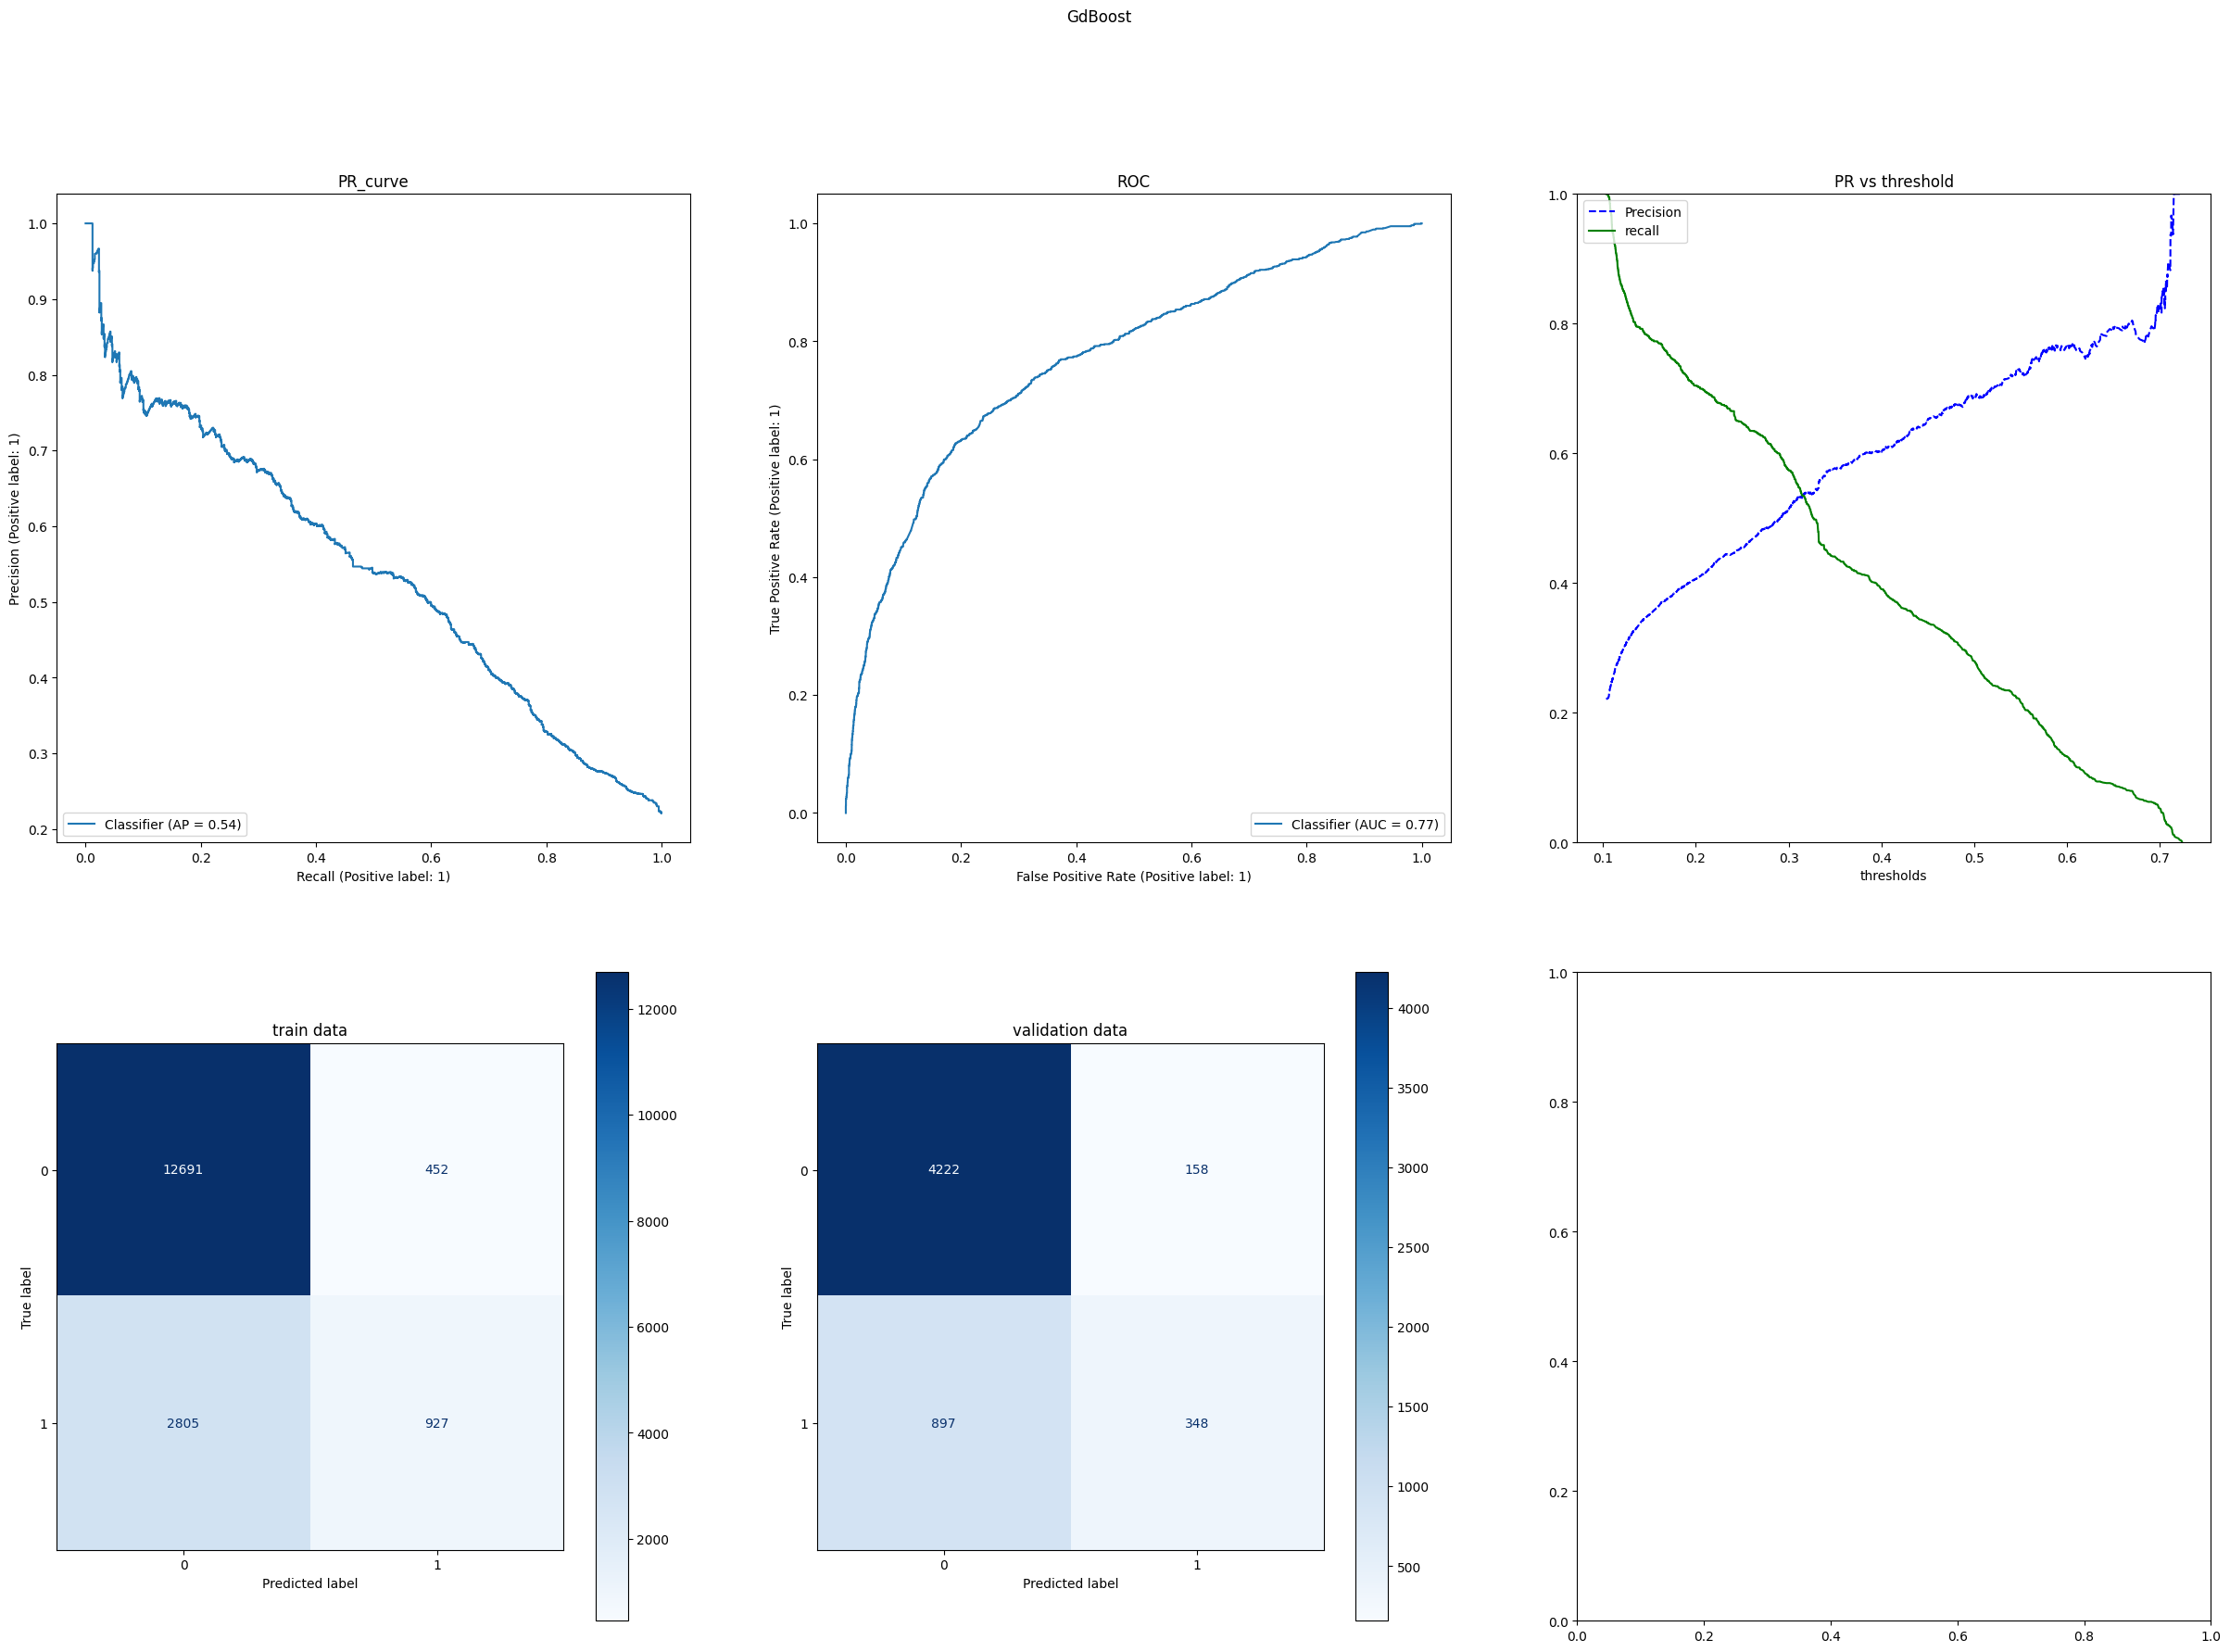

In [24]:

my_base_transform = BasicTransformer(scale="")
clfs = [
    DecisionTreeClassifier(max_depth=6,
                            random_state=42),
    RandomForestClassifier(n_estimators=200,
                            max_depth=6,
                            n_jobs=-1,
                            random_state=42),
    AdaBoostClassifier(n_estimators=200,
                        learning_rate=0.1,
                        random_state=42),
    GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.01,
                                max_depth =2,
                                max_features='sqrt',
                                random_state=42)
]
clf_names = ['Tree',
            'Forest',
            'Ada',
            'GdBoost'
]

pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})

#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals

Total 4 classifying was executed
Following are analysis of consistently wrong samples


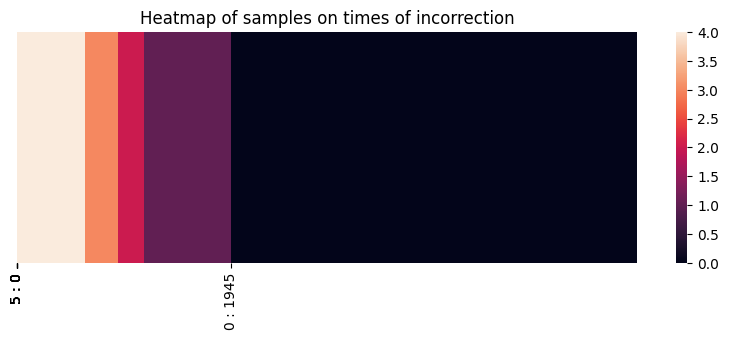

mean of consistently wrong samples = nan
mean of every incorrenct samples = 0.5110539845758355


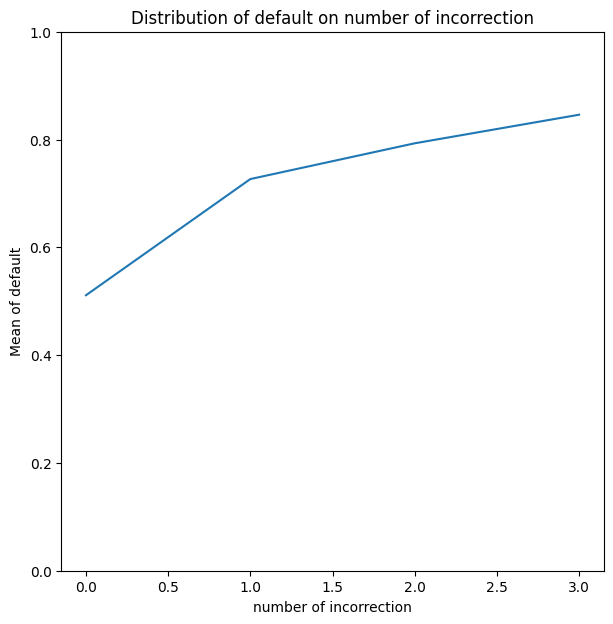

In [25]:
predictions = np.array(y_val_preds).transpose()
pred_df = pd.concat([y_val ,pd.DataFrame(predictions,index=y_val.index)],axis=1)
try:
    pred_df.to_csv(output_path+'val_results_less_features.csv')
except:
   try:
        pred_df.to_csv(output_path+'val_results_less_features.csv')
   except:
        print('err')
    
wrong =pred_df.apply(lambda x :abs(x-pred_df.default), axis=0)
wrong_sum =wrong.sum(axis=1)
n = wrong.shape[1]-1
print(f'Total {n} classifying was executed\nFollowing are analysis of consistently wrong samples')

import seaborn as sns
fig, ax = plt.subplots(figsize=(10,3))
freq_for_heat =wrong_sum.sort_values(ascending=False).to_numpy().reshape(1,-1)
sns.heatmap(freq_for_heat,vmax=n)
x_ticks =[wrong_sum[wrong_sum>j].shape[0] for j in [27,25,20,14,10,5,0]]
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'{freq} : {count}' for count,freq in zip(x_ticks,[27,25,20,14,10,5,0])])
ax.set_yticks([])
ax.set_title('Heatmap of samples on times of incorrection')
for n in [50,100,200]:
    plt.savefig(output_path+f'consis_wrong_heat_dpi{n}.png',dpi=n)
plt.show()
plt.close()
cons_wrong_idc =wrong_sum[wrong_sum>14].index

cons_wrong =df_original.loc[cons_wrong_idc]

print(f'mean of consistently wrong samples = {round(cons_wrong.default.mean(),4)}')

print(f'mean of every incorrenct samples = {df_original.loc[wrong_sum[wrong_sum>0].index].default.mean()}')

incorrect_means = [df_original.loc[wrong_sum[wrong_sum>i].index].default.mean() for i in np.arange(0,28)]
fig ,ax = plt.subplots(figsize=(7,7))
ax.plot(np.arange(0,28),incorrect_means)
ax.set_ylim(0,1)
ax.set_ylabel('Mean of default')
ax.set_xlabel('number of incorrection')
ax.set_title('Distribution of default on number of incorrection')
plt.savefig(output_path+'dist_def_number_incorr.png',dpi=100)
plt.show()
plt.close()

In [26]:
V=pd.DataFrame(evals_df_columns, columns=['name','accuracy','precision','recall','f1'])

In [27]:
V

name  accuracy  precision  recall      f1
0          raw,non_regul    0.7269     0.3897  0.4129  0.4009
1          raw,non_regul    0.8149     0.6401  0.3743  0.4724
2          raw,non_regul    0.8197     0.6830  0.3462  0.4595
3          raw,non_regul    0.8244     0.6904  0.3743  0.4854
4           t_series,reg    0.8185     0.6577  0.3751  0.4777
5           t_series,reg    0.8149     0.6809  0.3084  0.4245
6           t_series,reg    0.8114     0.6614  0.3028  0.4154
7           t_series,reg    0.8121     0.6822  0.2827  0.3998
8                raw,reg    0.8196     0.6525  0.3952  0.4922
9                raw,reg    0.8190     0.6974  0.3221  0.4407
10               raw,reg    0.8188     0.6846  0.3365  0.4513
11               raw,reg    0.8156     0.6985  0.2940  0.4138
12       non_log,raw,reg    0.8196     0.6525  0.3952  0.4922
13       non_log,raw,reg    0.8190     0.6974  0.3221  0.4407
14       non_log,raw,reg    0.8188     0.6846  0.3365  0.4513
15       non_log,raw,reg    0.8156     0.6985  0.2940  0.4138
16  non_log,t_series,reg    0.8140     0.6440  0.3574  0.4597
17  non_log,t_series,reg    0.8148     0.6790  0.3092  0.4249
18  non_log,t_series,reg    0.8126     0.6690  0.3036  0.4177
19  non_log,t_series,reg    0.8124     0.6877  0.2795  0.3975

a
[[4167  213]
 [ 798  447]]

train scores
accuracy : 0.8289185185185185
precision : 0.7239003709591945
recall : 0.36602357984994643
f1_score: 0.4862075102331375

Val scores
accuracy : 0.8202666666666667
precision : 0.6772727272727272
recall : 0.35903614457831323
f1_score: 0.46929133858267713


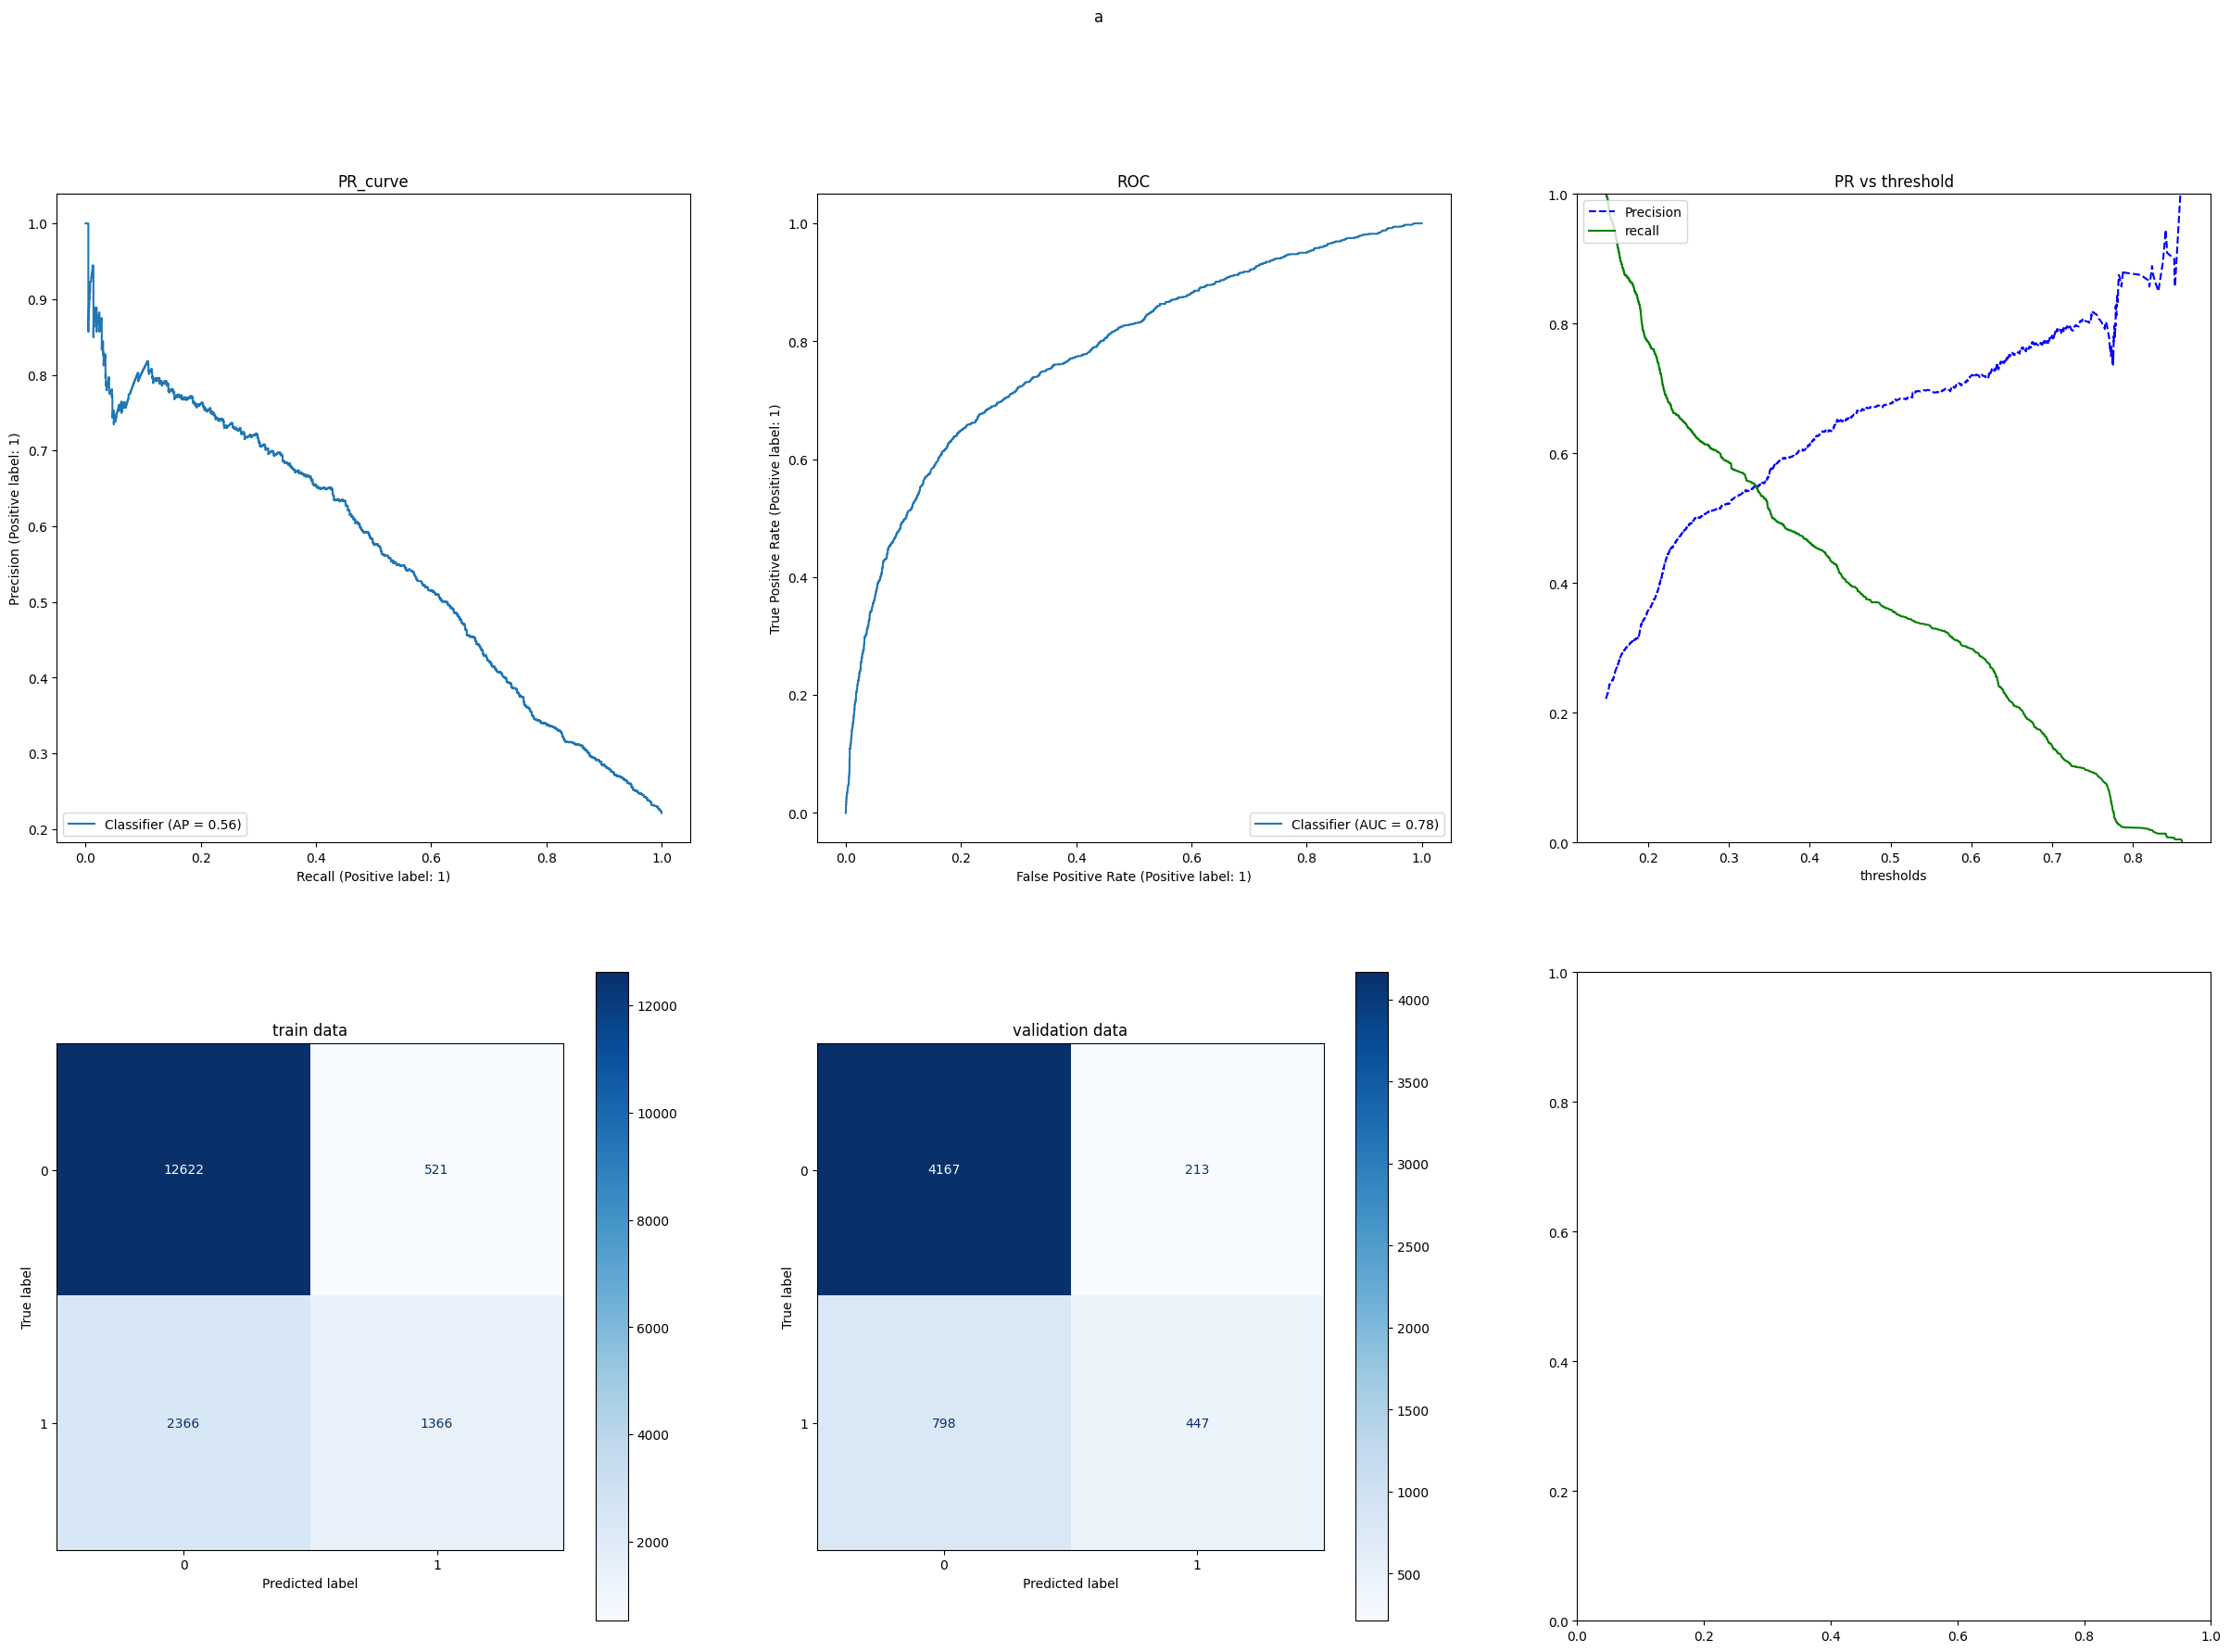

b
[[4138  242]
 [ 775  470]]

train scores
accuracy : 0.8583703703703703
precision : 0.8269980506822612
recall : 0.4547159699892819
f1_score: 0.5867911479944674

Val scores
accuracy : 0.8192
precision : 0.6601123595505618
recall : 0.37751004016064255
f1_score: 0.48032703117015835


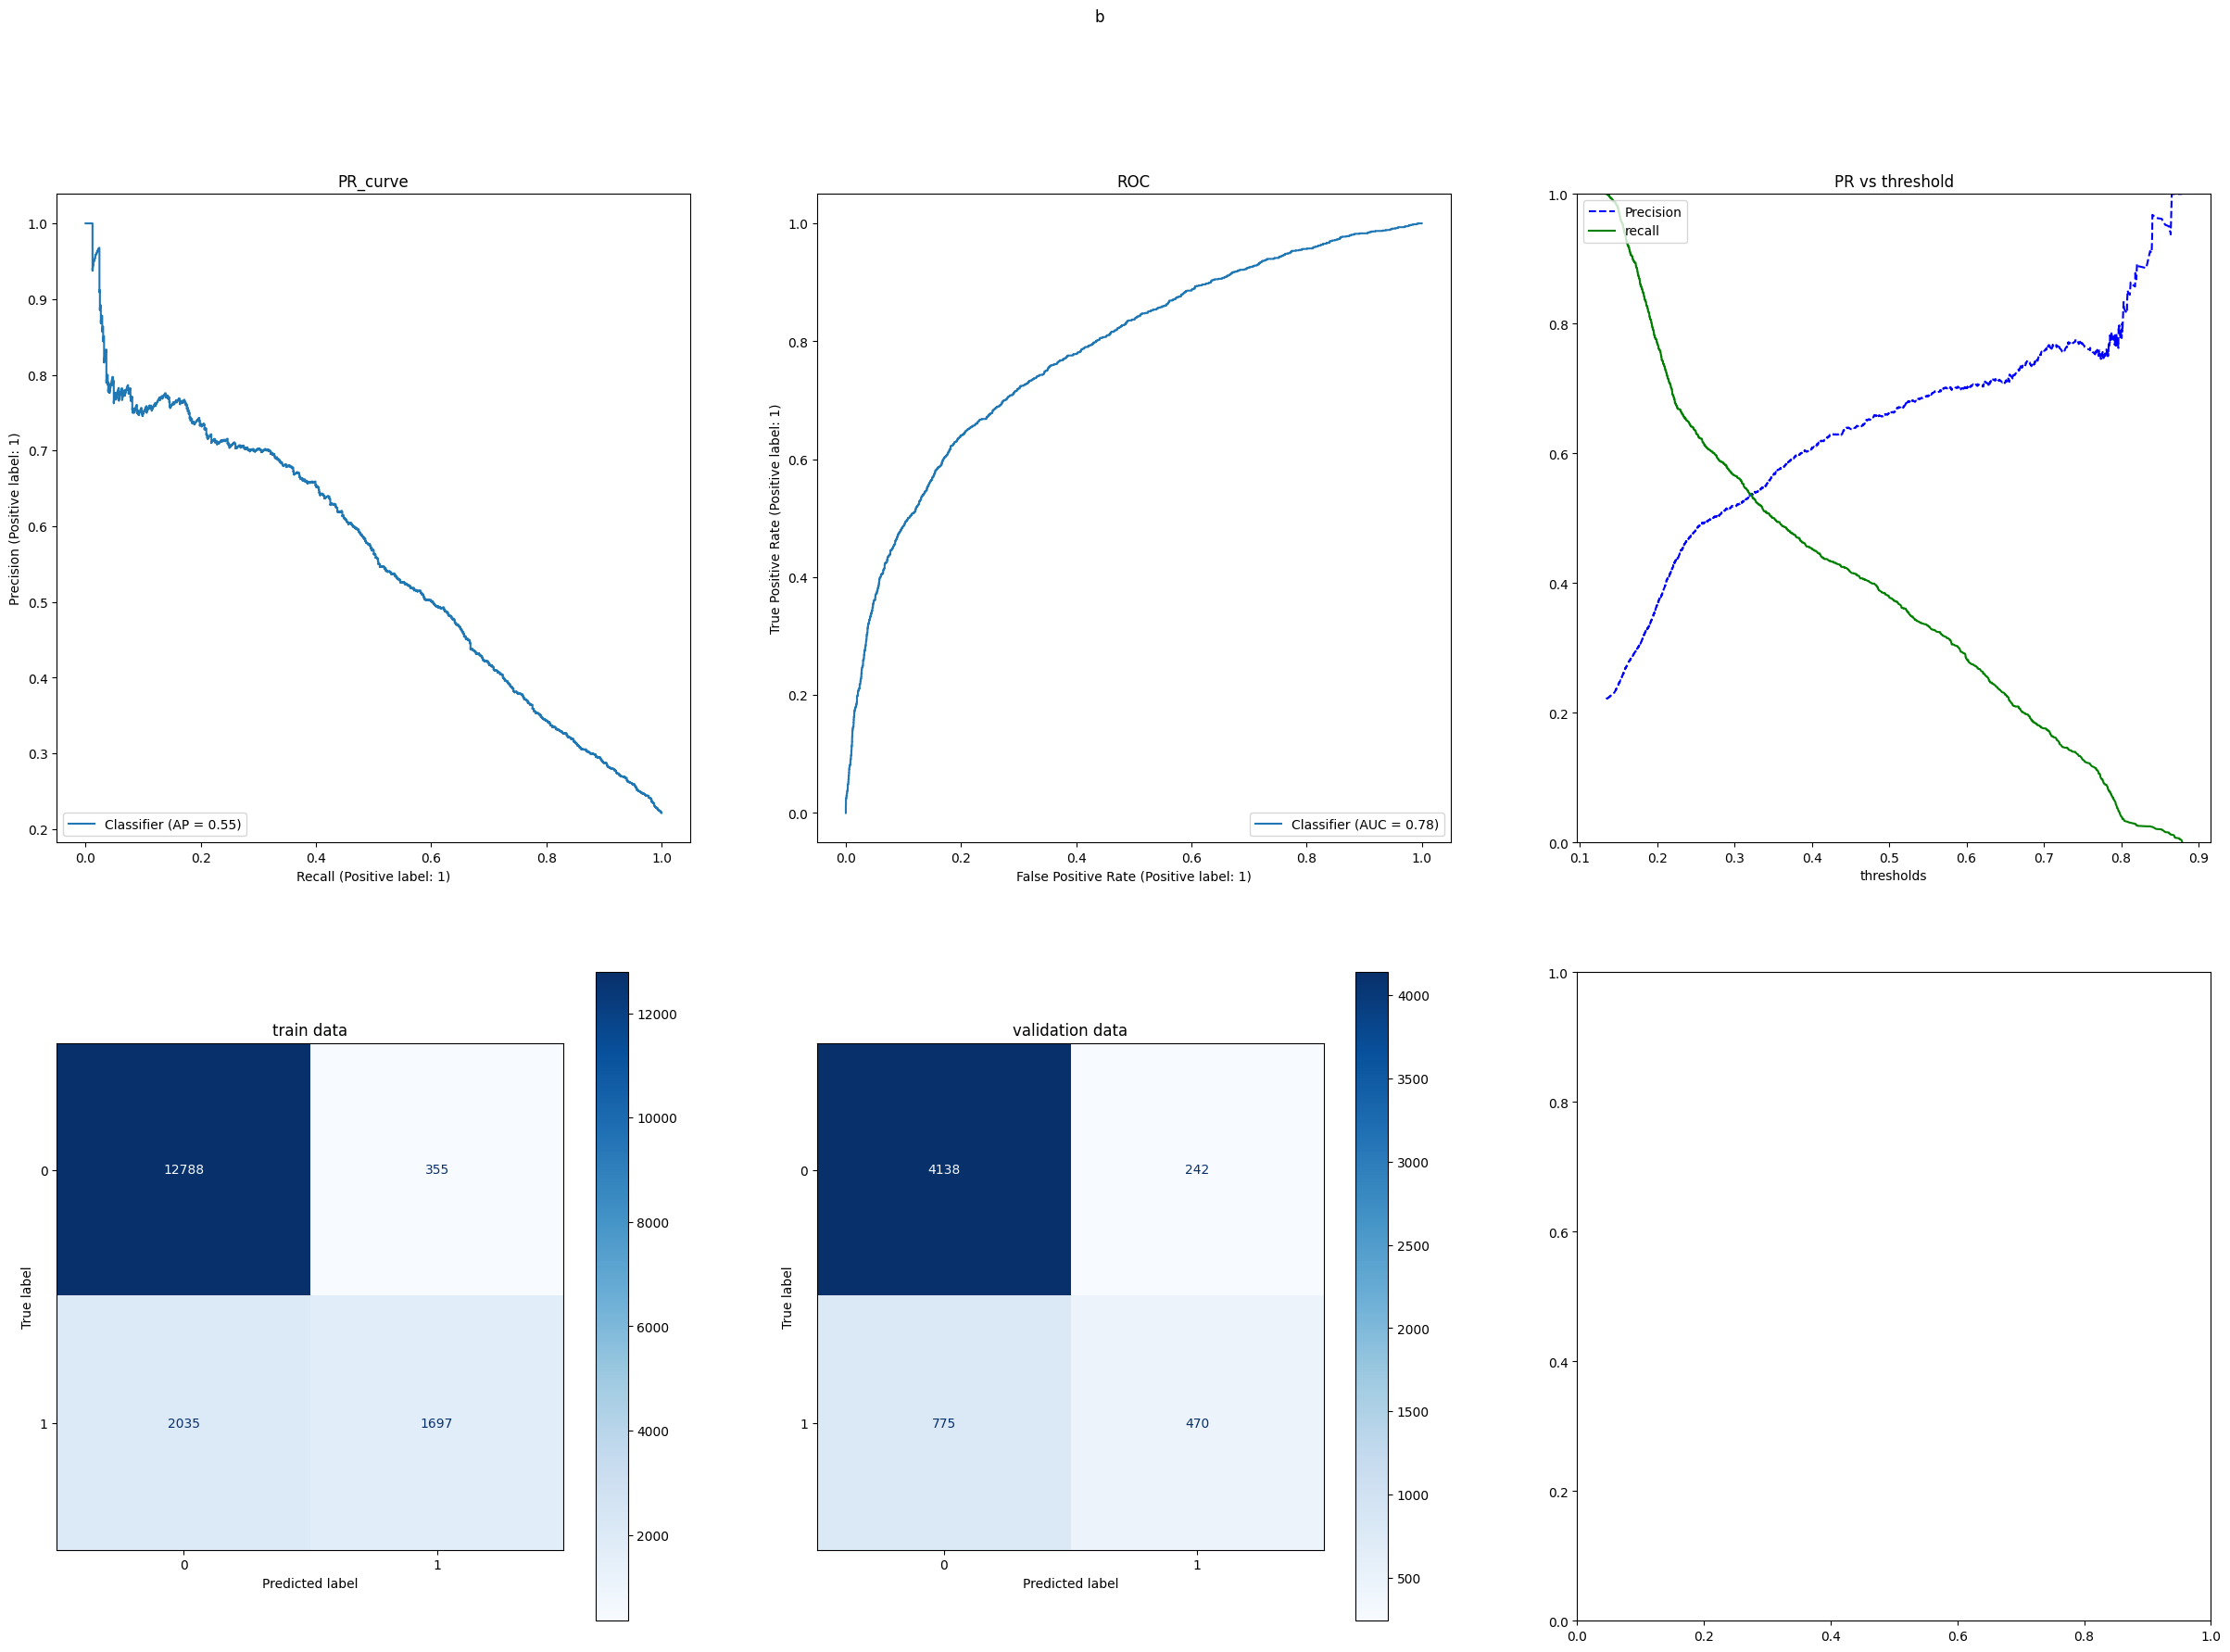

c
[[4117  263]
 [ 781  464]]

train scores
accuracy : 0.8913777777777778
precision : 0.9225634178905207
recall : 0.5554662379421221
f1_score: 0.6934269944806825

Val scores
accuracy : 0.8144
precision : 0.6382393397524071
recall : 0.37269076305220883
f1_score: 0.4705882352941176


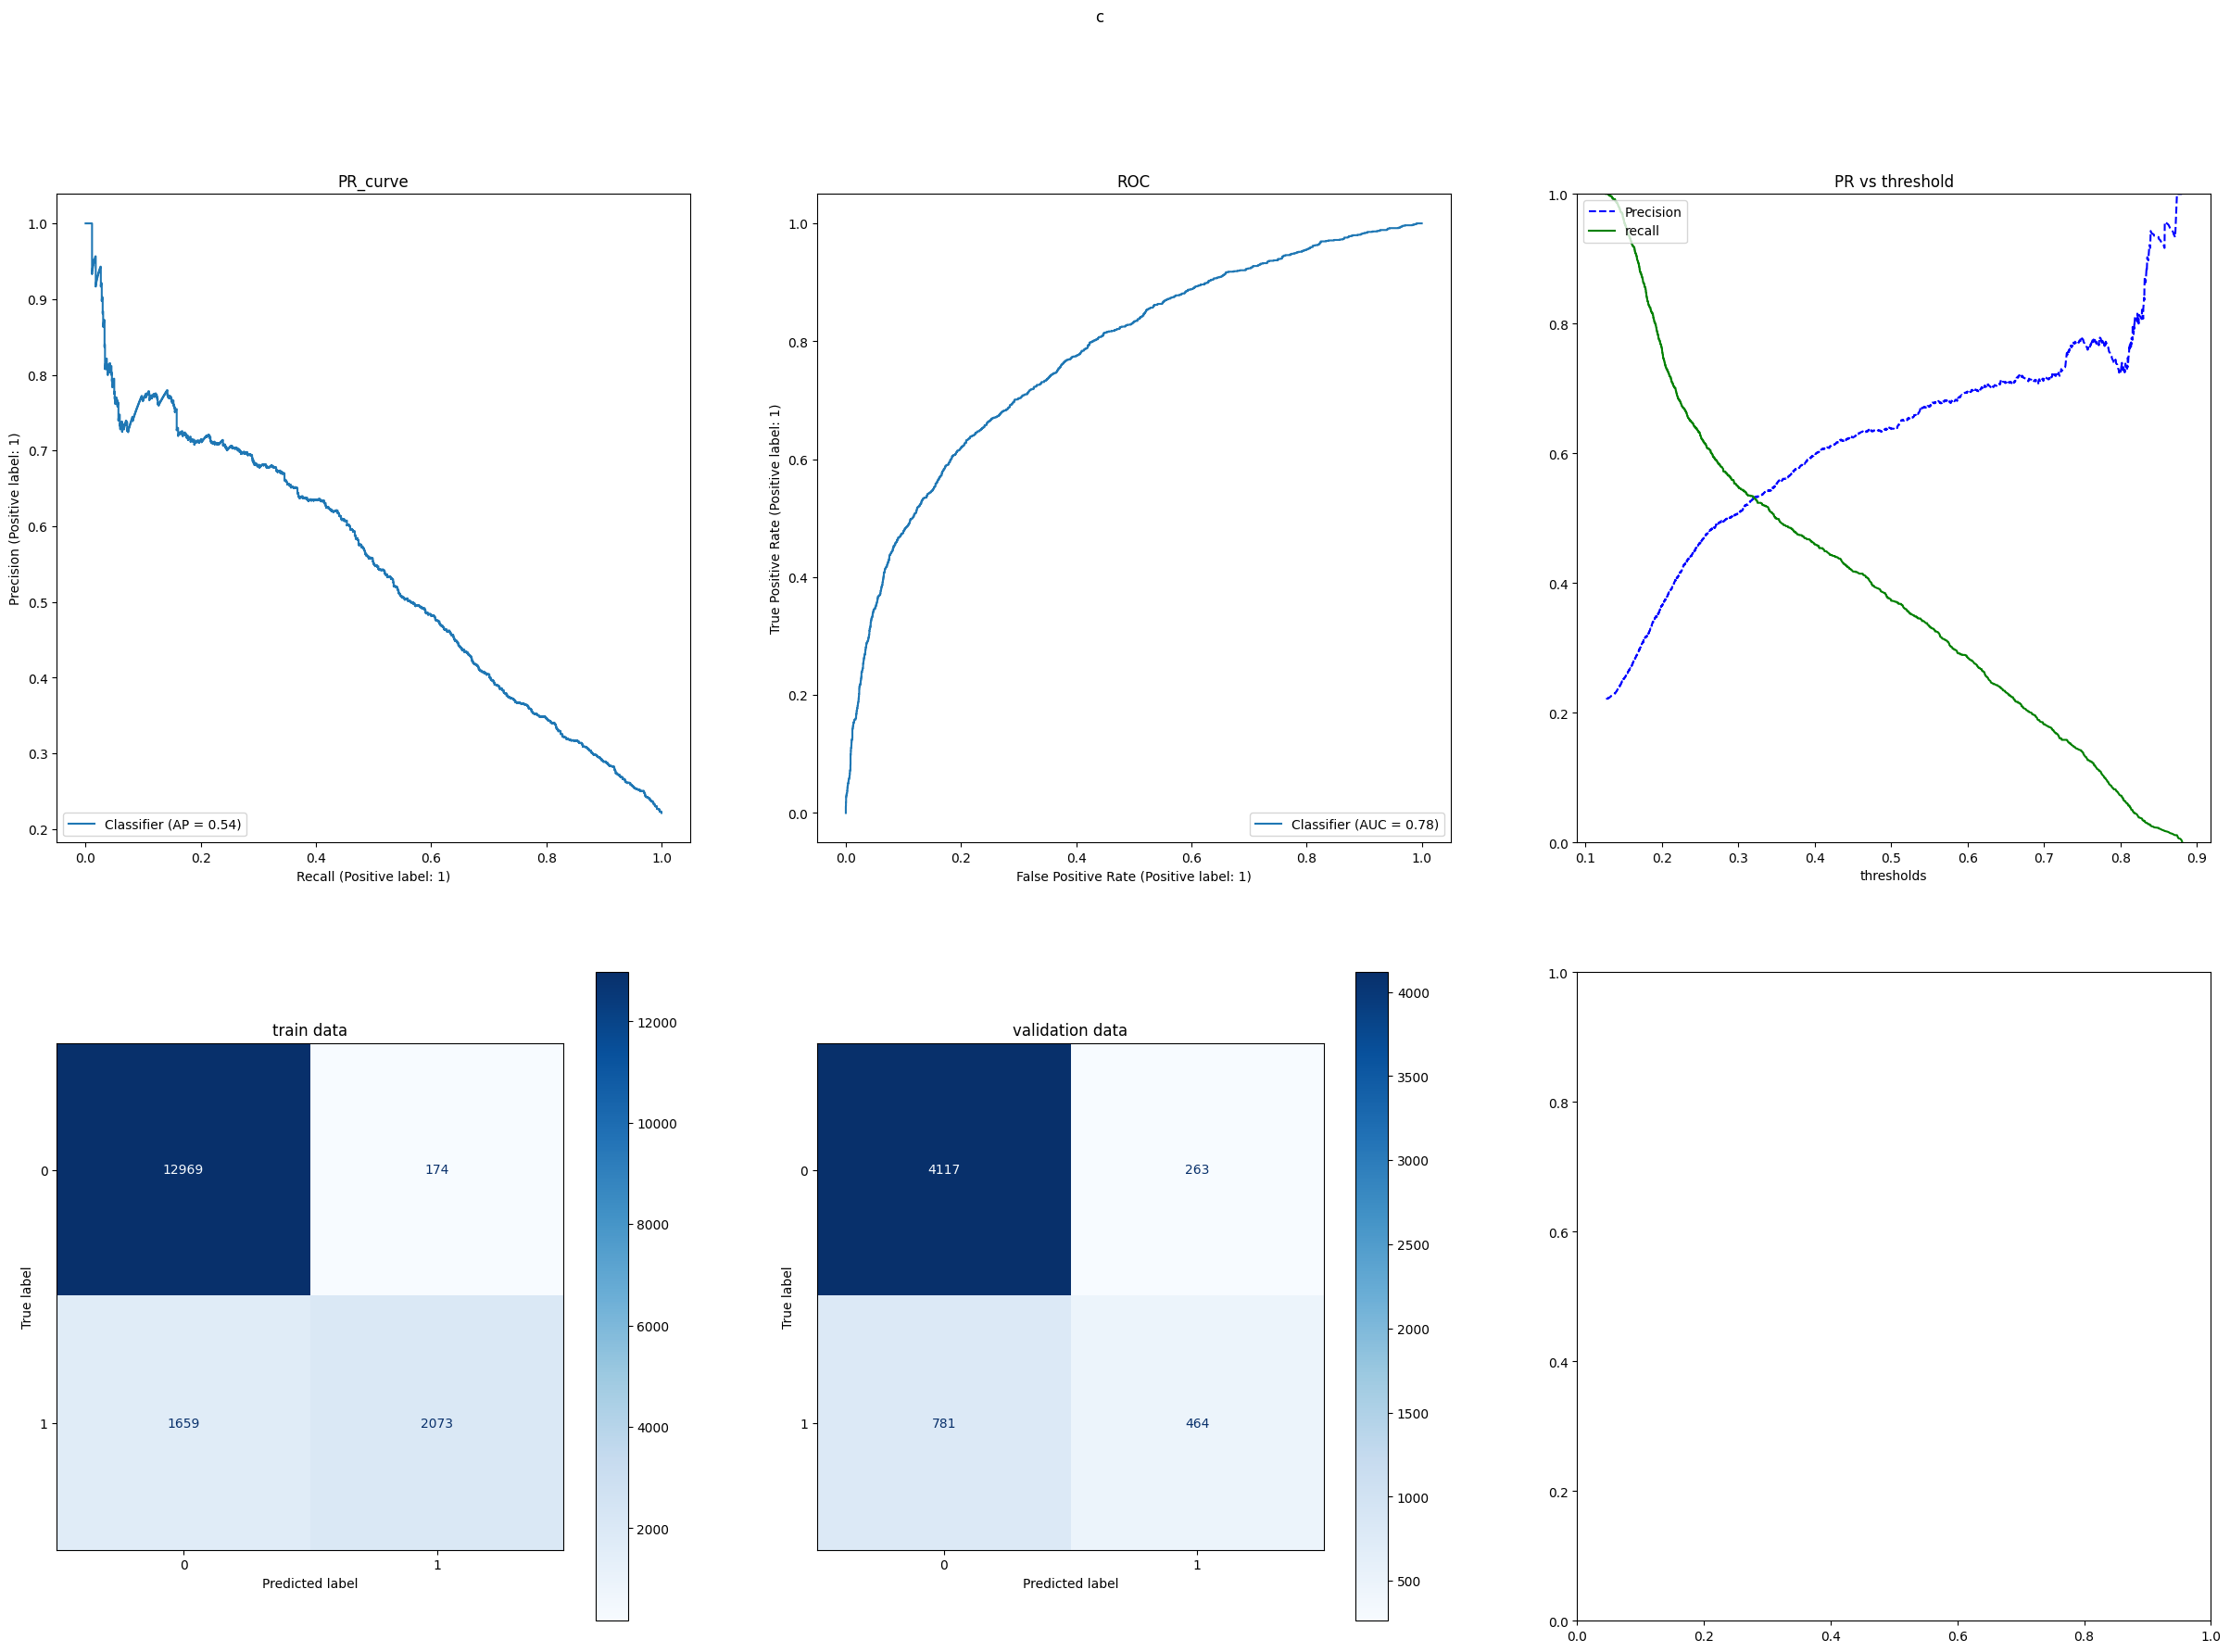

In [28]:
from xgboost import XGBRFClassifier
length_5_bop =MyMulPyts(estimator=BOP(window_size=3,
                                    word_size=3,
                                    n_bins=3,
                                    sparse=False,
                                    strategy='uniform'),
                          channel_list=[L_USAGE,L_DIFF] )
length_6_bop =MyMulPyts( estimator=BOP(window_size=3,
                                        word_size=3,
                                        sparse=False,
                                        n_bins=3,
                                        strategy='uniform'),
                          channel_list=[D_PAY,])
my_elementary_trans_6 = ElementaryExtractor([D_PAY,])
my_elementary_trans_5 = ElementaryExtractor([L_USAGE,L_DIFF])


extractors = [NonTsPass(),length_5_bop,length_6_bop,my_elementary_trans_5,my_elementary_trans_6]
#extractors = [my_elementary_trans_5,my_elementary_trans_6]
extractor = make_union(*extractors)
extractor


my_base_transform = BasicTransformer()
clfs = [ 
    XGBRFClassifier(random_state=42),
    XGBRFClassifier(max_depth=9,random_state=42),
    XGBRFClassifier(max_depth=12,random_state=42),
]
clf_names = ['a','b','c']


pipe_transform = Pipeline([('base',my_base_transform),
                 ('extractor',extractor),
                ],memory=cache_dir)
                
#  'extractor__mymulpyts-1__estimator__alphabet': None,

#Computation
results = []
for clf in clfs:
    pipe = Pipeline([('transform',pipe_transform),
                    ('clf',clf)])
    pipe.fit(X_train,y_train)
    train_pred = pipe.predict(X_train)
    val_pred = pipe.predict(X_val)
    score_val = pipe.predict_proba(X_val)[:,1]
    results.append({'train':train_pred,'val':val_pred,'score':score_val})


#evaluation
evals = []
for clf_name,result in zip(clf_names , results):
    print(clf_name)
    cf_matrix_t = confusion_matrix(y_train,result['train'])
    cf_matrix_v = confusion_matrix(y_val,result['val'])
    print(cf_matrix_v)
    print('\n'+'train scores')
    my_score(y_train,result['train'])
    print('\n'+'Val scores')
    evals.append([case_name]+my_score(y_val,result['val']))
    fig, axes = plt.subplots(2,3,figsize=(30,20))
    RocCurveDisplay.from_predictions(y_val,result['score'],ax=axes[0,1])
    display = PrecisionRecallDisplay.from_predictions(y_val,result['score'],ax=axes[0,0])
    # display.plot(cmap=plt.cm.Blues,cmap=plt.cm.Blues,ax=axes[0,0])
    display = ConfusionMatrixDisplay(cf_matrix_t)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,0])
    display = ConfusionMatrixDisplay(cf_matrix_v)
    display.plot(cmap=plt.cm.Blues,ax=axes[1,1])
    axes[0,1].set_title('ROC')
    axes[0,0].set_title('PR_curve')
    axes[1,0].set_title('train data')
    axes[1,1].set_title('validation data')
    precisions , recalls , thresholds = precision_recall_curve(y_val, result['score'])
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds,ax=axes[0,2])
    axes[0,2].set_title('PR vs threshold')
    fig.suptitle(f'{clf_name}')
    plt.show()
    plt.close()
results_df_columns.append([case_name]+ results)
evals_df_columns +=evals